In [60]:
from commonfunctions import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from skimage.metrics import structural_similarity as ssim
import os
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
def video_to_frames(video_path, output_folder, start_frame=0, end_frame=None):
    """
    Segment a video into frames and save them as images without altering resolution,
    processing frames only within a specified range.

    Args:
        video_path (str): Path to the input video file.
        output_folder (str): Directory where extracted frames will be saved.
        start_frame (int): Frame index to start processing from (default is 0).
        end_frame (int): Frame index to stop processing at (default is None, which means process until the end).
    """
    # Check if the output folder exists, create if not
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video: {total_frames}")
    
    # Validate the end frame
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Ensure the start frame is valid
    if start_frame >= total_frames:
        print(f"Error: Start frame {start_frame} exceeds total frames {total_frames}.")
        return
    
    # Ensure the start frame is before the end frame
    if start_frame >= end_frame:
        print(f"Error: Start frame {start_frame} is not less than end frame {end_frame}.")
        return
    
    # Set the starting frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Frame counter
    frame_count = start_frame
    
    while frame_count < end_frame:
        # Read a frame from the video
        ret, frame = cap.read()
        
        # Break the loop if there are no more frames
        if not ret:
            break
        
        # Construct the output file path
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.png")
        
        # Save the frame as an image (PNG format preserves resolution)
        cv2.imwrite(frame_filename, frame)
        
        # Print progress
        print(f"Saved: {frame_filename}")
        
        # Increment the frame counter
        frame_count += 1
    
    # Release the video capture object
    cap.release()
    print("Video segmentation complete!")

# Example usage
video_path = "input_video.mp4"  # Replace with your video file path
output_folder = "output_frames"  # Replace with desired output folder path
start_frame = 6000  # Start processing after the first 732 frames
end_frame = 6400  # Stop processing after frame 1500

#video_to_frames(video_path, output_folder, start_frame, end_frame)


Total frames in video: 11440
Saved: output_frames\frame_6000.png
Saved: output_frames\frame_6001.png
Saved: output_frames\frame_6002.png
Saved: output_frames\frame_6003.png
Saved: output_frames\frame_6004.png
Saved: output_frames\frame_6005.png
Saved: output_frames\frame_6006.png
Saved: output_frames\frame_6007.png
Saved: output_frames\frame_6008.png
Saved: output_frames\frame_6009.png
Saved: output_frames\frame_6010.png
Saved: output_frames\frame_6011.png
Saved: output_frames\frame_6012.png
Saved: output_frames\frame_6013.png
Saved: output_frames\frame_6014.png
Saved: output_frames\frame_6015.png
Saved: output_frames\frame_6016.png
Saved: output_frames\frame_6017.png
Saved: output_frames\frame_6018.png
Saved: output_frames\frame_6019.png
Saved: output_frames\frame_6020.png
Saved: output_frames\frame_6021.png
Saved: output_frames\frame_6022.png
Saved: output_frames\frame_6023.png
Saved: output_frames\frame_6024.png
Saved: output_frames\frame_6025.png
Saved: output_frames\frame_6026.png

In [5]:
def adaptiveThreshold(frame):
    # only works on grayscale images represented from 0 to 1 as float, works best with sudden changes such as text
    height, width = np.shape(frame)
    threshold = 15
    window_size = width // 8
    mask = frame.copy()
    integral = frame.copy()
    # calculate the integral of the input image
    for i in range(width):
        sum = 0
        for j in range(height):
            sum += frame[j, i]
            if i == 0:
                integral[j, i] = sum
            else:
                integral[j, i] = integral[j, i - 1] + sum
    i = 0
    j = 0
    for i in range(width):
        for j in range(height):
            x1 = max(0, i - window_size // 2)
            x2 = min (width - 1, i + window_size // 2)
            y1 = max(0, j - window_size // 2)
            y2 = min (height - 1, j + window_size // 2)
            count = (x2 - x1) * (y2 - y1)
            sum = integral[y2, x2]
            if y1 > 0:
                sum -= integral[y1 - 1, x2]
            if x1 > 0:
                sum -= integral[y2, x1 - 1]
            if x1 > 0 and y1 > 0:
                sum += integral[y1 - 1, x1 - 1]
            if (frame[j, i] * count) <= (sum * (100 - threshold) / 100):
                mask[j, i] = 255
            else:
                mask[j, i] = 0
    return mask

img = rgba2rgb(io.imread("./Tests/أهل٥٩٧٨.png"))

img_g = rgb2gray(img)

mask =  adaptiveThreshold(img_g)

img_it = iterativeThreshold(img_g)

import numpy as np

f1 = np.array([[0, 0, 1, 0, 0], 
               [0, 0, 1, 0, 0], 
               [0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0], 
               [0, 0, 0, 0, 0]])


img_canny = canny((img_g * 255), sigma=1, low_threshold=240, high_threshold=250)

mask_err = binary_erosion(mask, np.ones((3, 3)))

it_dil = binary_dilation(img_it, np.ones([3,1]))

it_closed = binary_erosion(it_dil, np.ones([3,1]))

mask2 = ((img_g > 0.4) & (img_g < 0.5)) 

mask2_closed = binary_erosion(mask2, np.ones([2,2]))

mask3 = binary_dilation(mask2_closed, np.ones([8,1]))

mask3 = np.logical_or(mask3,img_it)

show_images([img_g,mask,img_it,img_canny,mask_err,it_dil,it_closed,mask2,mask3],["Img","Mask","Iterative","Canny","Mask_err","It_dil","It_closed","mask2","mask3"])

FileNotFoundError: No such file: 'C:\Users\DELL\OneDrive\Desktop\LiscncePlate\Speed-Camera\Tests\4.png'

In [ ]:
img = rgba2rgb(io.imread("./4_2.png"))

img_g = rgb2gray(img)

def seg(img):
    img = (img).astype("uint8")
    imgHist = np.zeros(256)
    for x in range(np.shape(img)[0]):
        for y in range(np.shape(img)[1]):
            imgHist[img[x, y]] += 1

    sum = 0
    for x in range(256):
        sum += (imgHist[x] * x)

    mean = round(sum / (np.shape(img)[0] * np.shape(img)[1]))

    sat = False    
    while(not sat):
        sum1 = 1
        count1 = 1
        sum2 = 1
        count2 = 1
        for x in range(mean):
            sum1 += (imgHist[x] * x)
            count1 += imgHist[x]
        for x in range(mean,256):
            sum2 += (imgHist[x] * x)
            count2 += imgHist[x]
        mean1 = sum1/(count1)
        mean2 = sum2/(count2)
        if math.isnan(mean1):
            print("ERRROR mean1", mean1)
            mean1 = mean2
        if math.isnan(mean2):
            print("ERRROR mean2", mean2)
            mean2 = mean1
        mean3 = round((mean1+mean2)/2)
        if (mean3 == mean):
            sat = True
        mean = mean3

    for x in range(np.shape(img)[0]):
        for y in range(np.shape(img)[1]):
            if(img[x,y] <= mean):
                img[x,y] = 0
            else:
                img[x,y] = 1
    return img

def local_thres(img):
    img = np.copy((img).astype("uint8"))

    x = np.shape(img)[0]
    y = np.shape(img)[1]

    q1 = img[0:round(x/2),0:round(y/2)]
    q2 = img[0:round(x/2),round(y/2):y]
    q3 = img[round(x/2):x,0:round(y/2)]
    q4 = img[round(x/2):x,round(y/2):y]

    q1_s = seg(np.copy(q1))
    q2_s = seg(np.copy(q2))
    q3_s = seg(np.copy(q3))
    q4_s = seg(np.copy(q4))

    return q1_s, q2_s, q3_s, q4_s

def join_quads(quad, sub_quads):
    img = np.zeros(np.shape(quad))
    x = np.shape(img)[0]
    y = np.shape(img)[1]

    img[0:round(x/2),0:round(y/2)] = sub_quads[0]
    img[0:round(x/2),round(y/2):y] = sub_quads[1]
    img[round(x/2):x,0:round(y/2)] = sub_quads[2]
    img[round(x/2):x,round(y/2):y] = sub_quads[3]

    return img

quad = local_thres(img_g * 256)

final = join_quads(img_g,quad)

x = img_g > (0.65 * img.max())

x_err = binary_dilation(x,np.ones([3,1]))

#show_images([img_g,final,x,x_err],["original","Final","X","X_err"])


In [62]:
def getHistogram(img):
    # works for grayscale images represented from 0 to 255
    hist = np.zeros(256)
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            hist[img[i, j]] += 1
    return hist

def iterativeThreshold(image):
    # only works on grayscale images
    img = (image.copy()*255).astype('uint8') % 255
    hist = getHistogram(img)
    sum = 0
    weighted_sum = 0
    for i in range(256):
        sum += hist[i]
        weighted_sum += hist[i] * i
    Tinit = int(weighted_sum // sum)
    while(True):
        sum1 = 0
        weighted_sum1 = 0
        for j in range(Tinit):
            sum1 += hist[j]
            weighted_sum1 += hist[j] * j
        T1 = int(weighted_sum1 // sum1)

        sum2 = 0
        weighted_sum2 = 0
        for k in range(Tinit,256):
            sum2 += hist[k]
            weighted_sum2 += hist[k] * k
        T2 = int(weighted_sum2 // sum2)

        Told = Tinit
        Tinit = int((T1 + T2) // 2)

        if (Tinit == Told):
            break
    binary_mask = img <= Tinit
    return binary_mask

In [64]:
def refine_binary_half(image):
    binary_image = iterativeThreshold(image)

    #show_images([binary_image,image],["image given to refine binary","image"])
    freeze1 = False
    freeze2 = False
    strike1=False
    strike2=False
    index1 = 0
    index2 = 0
    index3 = 0
    index4 = 0

    #print(binary_image[:,0])
    #print(binary_image[:,1])
    #print(binary_image[:,2])
    # Correctly interpret dimensions
    height, width = np.shape(binary_image)
    
    for i in range(5):
        counter1 = 0
        counter2 = 0
        
        # Check the leftmost and rightmost columns at index `i`
        for j in range(5):
            # Top and bottom pixels of the left column
            if binary_image[j, i] == 1:
                counter1 += 1
            if binary_image[height - 1 - j, i] == 1:
                counter1 += 1
            
            # Top and bottom pixels of the right column
            if binary_image[j, width - 1 - i] == 1:
                counter2 += 1
            if binary_image[height - 1 - j, width - 1 - i] == 1:
                counter2 += 1
        
        # Update `index1` for left side
        if counter1 > 4 and not freeze1:
            if strike1:       
                index1 += 2
                strike1=False
            else:
                index1 += 1
        elif strike1:
            freeze1 = True
        else:
            strike1=True

        # Update `index2` for right side
        if counter2 > 4 and not freeze2:
            if strike2:       
                index2 += 2
                strike2=False
            else:
                index2 += 1
        elif strike2:
            freeze2 = True
        else:
            strike2=True

    freeze1 = False
    freeze2 = False
    image = image[:, index1:width - index2]
    binary_image = binary_image[:, index1:width - index2]
    width -= (index1+index2)
        
    for i in range(2):
        counter1 = 0
        counter2 = 0
        
        # Check the leftmost and rightmost columns at index `i`
        for j in range(7):
            # Top and bottom pixels of the left column
            if binary_image[i, j] == 1:
                counter1 += 1
            if binary_image[height - 1 - i, j] == 1:
                counter1 += 1
            
            # Top and bottom pixels of the right column
            if binary_image[i, width - 1 - j] == 1:
                counter2 += 1
            if binary_image[height - 1 - i, width - 1 - j] == 1:
                counter2 += 1
        
        # Update `index1` for left side
        if counter1 > 4 and not freeze1:
            index3 += 1
        else:
            freeze1 = True

        # Update `index2` for right side
        if counter2 > 4 and not freeze2:
            index4 += 1
        else:
            freeze2 = True
            

    print("After")    
    #print(binary_image[:,index1])
    image = image[index3:height - index4:,:]
    binary_image=binary_image[index3:height - index4:,:]
    # Return the cropped image
    return binary_image,image


In [90]:
def extract_half(img_it_dil,image_n):
    # # Find contours
    contours = find_contours(img_it_dil, 0.)
    bounding_boxes = []
    for contour in contours:
        Ymin = np.min(contour[:,0])
        Ymax = np.max(contour[:,0])
        Xmin = np.min(contour[:,1])
        Xmax = np.max(contour[:,1])
        aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)
        if 1 <= aspect_ratio <= 3 and (Xmax-Xmin) > 40 and (Ymax-Ymin) > 25:
            print(Xmin, Xmax, Ymin, Ymax)
            bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
    
    
    # #When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
    img_with_boxes = np.zeros_like(img_it_dil)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_it_dil.shape)
        img_with_boxes[rr, cc] = 1 #set color white
        return image_n[int(Ymin+2):int(Ymax-2),int(Xmin):int(Xmax)]
    return image_n[2:int(np.shape(image_n)[0]-4),:]

import numpy as np

def refine_half(image):
    freeze1 = False
    freeze2 = False
    index1 = 0
    index2 = 0
    index3 = 0
    index4 = 0

    #print(image[:,0])
    #print(image[:,1])
    #print(image[:,2])
    # Correctly interpret dimensions
    height, width = np.shape(image)
    
    
    for i in range(4):
        counter1 = 0
        counter2 = 0
        
        # Check the leftmost and rightmost columns at index `i`
        for j in range(5):
            # Top and bottom pixels of the left column
            if image[i, j] < 0.2:
                counter1 += 1
            if image[height - 1 - i, j] < 0.2:
                counter1 += 1
            
            # Top and bottom pixels of the right column
            if image[i, width - 1 - j] < 0.2:
                counter2 += 1
            if image[height - 1 - i, width - 1 - j] < 0.2:
                counter2 += 1
        
        # Update `index1` for left side
        if counter1 > 3 and not freeze1:
            index3 += 1
        else:
            freeze1 = True

        # Update `index2` for right side
        if counter2 > 3 and not freeze2:
            index4 += 1
        else:
            freeze2 = True
            
            
    freeze1 = False
    freeze2 = False
    image=image[index3:height - index4:,:]
    height -= (index3+index4)
    
    for i in range(15):
        counter1 = 0
        counter2 = 0
        
        # Check the leftmost and rightmost columns at index `i`
        for j in range(5):
            # Top and bottom pixels of the left column
            if image[j, i] < 0.2:
                counter1 += 1
            if image[height - 1 - j, i] < 0.2:
                counter1 += 1
            
            # Top and bottom pixels of the right column
            if image[j, width - 1 - i] < 0.2:
                counter2 += 1
            if image[height - 1 - j, width - 1 - i] < 0.3:
                counter2 += 1
        
        # Update `index1` for left side
        if counter1 > 4 and not freeze1:
            index1 += 1
        else:
            freeze1 = True

        # Update `index2` for right side
        if counter2 > 4 and not freeze2:
            index2 += 1
        else:
            freeze2 = True


    print("After")
    #print(image[:,index1])
    # Return the cropped image
    return image[:, index1:width - index2]


def split_plate(img):

    img_g = rgb2gray(img)

    img_it = iterativeThreshold(img_g)

    img_it_dil = binary_dilation(img_it, np.ones([3,1]))

    c = extract_half(img_it_dil,img_g)
    
    # Crop 40% from the top
    height, width = img_g.shape
    cropped_img = img_g[int(height * 0.4):, :]
    
    # Split the cropped image into two parts vertically
    image1 = cropped_img[:, :int(width * 0.5)]  # Left half
    image2 = cropped_img[:, int(width * 0.5):]  # Right half

    img_it = iterativeThreshold(image1)
    
    img_it_dil = binary_dilation(img_it, np.ones([3,1]))
    
    image1 = extract_half(img_it_dil,image1)
    #show_images([image1],['1'])
    
    image1 = refine_half(image1)
    #show_images([image1],['11'])
    image1_it,image1 = refine_binary_half(image1)
    
    img_it = iterativeThreshold(image2)
    
    img_it_dil = binary_dilation(img_it, np.ones([3,1]))
    
    image2 = extract_half(img_it_dil,image2)
    #show_images([image2],['2'])
    
    image2 = refine_half(image2)
    #show_images([image2],['22'])
    image2_it,image2 = refine_binary_half(image2)
    print("to horizonatal")
    #show_images([image1_it,image2_it],['1','2'])

    return image1,image1_it,image2,image2_it

In [122]:
def fix_tilt(img):

    img_g = rgb2gray(img)
    
    # Use Canny edge detection
    edges = canny(img_g * 255, 1, 70, 110)
    
    show_images([img_g,edges],["Img","canny"])
    # Convert edges to uint8 (HoughLines requires this format)
    edges_uint8 = (edges * 255).astype(np.uint8)
    
    # Perform the Hough Line Transform
    lines = cv2.HoughLines(edges_uint8, 1, np.pi / 180, 40)
    
    # Extract angles of the detected lines
    angles = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angle = np.rad2deg(theta) - 90  # Convert from radians to degrees
            angles.append(angle)
    else:
        print("No lines detected")
        return img
    # Calculate the median angle to reduce noise
    tilt_angle = np.median(angles)
    print(f"Tilt angle: {tilt_angle:.2f} degrees")
    
    # Get the center of the image
    (h, w) = img_g.shape[:2]
    center = (w // 2, h // 2)
    
    # Create the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, tilt_angle, 1.0)
    
    # Apply the rotation
    corrected_image = cv2.warpAffine(img, rotation_matrix, (w, h))
    
    show_images([img,corrected_image],["Img","corrected"])

    return corrected_image


In [68]:
def horizontal_segmentation(image, min_width=1, max_width=20, min_height=4):
    """
    Segment digits horizontally
    
    Args:
        binary_image (numpy.ndarray): Binary image of the license plate
        min_width (int): Minimum width of a valid digit region
        max_width (int): Maximum width of a valid digit region
        min_height (int): Minimum height of a valid digit region
    
    Returns:
        list: List of segmented digit images
    """
    print("welcome to horizontal seg")
    binary_image = iterativeThreshold(image)

    #show_images([image,binary_image],["image","binary"])
    
    # Find horizontal projection
    horizontal_projection = np.sum(binary_image, axis=0)
    
    # Find potential digit regions
    digit_regions = []
    in_digit = False
    start = 0
    
    for x in range(len(horizontal_projection)):
        # Check if we're in a potential digit region
        if not in_digit and horizontal_projection[x] > 0:
            start = x
            in_digit = True
        
        # Check if we've exited a digit region
        elif in_digit and (horizontal_projection[x] == 0 or x == len(horizontal_projection)-1):
            end = x
            print(start,end)

            #filtering
            if (end - start >= min_width and end - start <= max_width and np.sum(binary_image[:,start:end]) > min_height * (end - start)):
        
                # Extract potential digit
                digit_region = image[:, start:end]
                digit_region = iterativeThreshold(digit_region)
                
                digit_regions.append((start, end, digit_region))
            
            in_digit = False
    
    return digit_regions

def refine_segmentation(digit_regions, max_digits=4, min_separation=1):
    """
    Refine segmentation by merging or filtering regions
    
    Args:
        digit_regions (list): List of detected digit regions
        max_digits (int): Maximum number of expected digits
        min_separation (int): Minimum separation between digits
    
    Returns:
        list: Refined list of digit regions
    """
    # Sort regions from left to right
    sorted_regions = sorted(digit_regions, key=lambda x: x[0])
    
    # Merge closely connected regions
    refined_regions = []
    i = 0
    while i < len(sorted_regions):
        current = sorted_regions[i]
        
        # Look ahead to see if next region is close
        if i + 1 < len(sorted_regions):
            next_region = sorted_regions[i + 1]
            
            # If regions are close, merge them
            if next_region[0] - current[1] < min_separation:
                # Merge the two regions
                merged_region = (
                    current[0], 
                    next_region[1], 
                    np.hstack((current[2], next_region[2]))
                )
                refined_regions.append(merged_region)
                i += 2
                continue
        
        refined_regions.append(current)
        i += 1

    # Limit to max expected digits
    return refined_regions[:max_digits]

def pad_and_center_digit(digit, target_size=40, pad_value=0):
    """
    Pad and center a digit image to a target size
    
    Args:
        digit (numpy.ndarray): Input digit image
        target_size (int): Desired size of the padded image
        pad_value (int): Value to use for padding (0 for black)
    
    Returns:
        numpy.ndarray: Padded and centered digit image
    """
    # Ensure the input is a numpy array of uint8
    if not isinstance(digit, np.ndarray):
        digit = np.array(digit)
    
    # Convert to grayscale if it's a color image
    if len(digit.shape) > 2:
        digit = digit.mean(axis=2).astype(np.uint8)
    
    # Get current digit dimensions
    h, w = digit.shape
    
    # Determine scaling factor if larger than target size
    if h > target_size or w > target_size:
        # Calculate scale factor to fit within target size while maintaining aspect ratio
        scale_h = target_size / h
        scale_w = target_size / w
        scale = min(scale_h, scale_w)
        
        # Calculate new dimensions
        new_h = int(h * scale)
        new_w = int(w * scale)
        
        # Resize the digit
        from skimage.transform import resize
        digit = resize(digit, (new_h, new_w), mode='constant', cval=pad_value)
        digit = (digit * 255).astype(np.uint8)
        h, w = digit.shape
    
    # Create a blank image with pad_value
    padded = np.full((target_size, target_size), pad_value, dtype=np.uint8)
    
    # Calculate centering offsets
    start_y = (target_size - h) // 2
    start_x = (target_size - w) // 2
    
    # Place the resized (or original) digit in the center
    padded[start_y:start_y+h, start_x:start_x+w] = digit
    
    return padded

def visualize_segmentation(original, digit_regions, padded_digits):
    """
    Visualize the segmentation process
    
    Args:
        original (numpy.ndarray): Original grayscale image
        binary (numpy.ndarray): Binary image
        digit_regions (list): List of detected digit regions
        padded_digits (list): List of padded digit images
    """
    # Visualization of original and binary images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 1, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    '''
    plt.subplot(1, 2, 2)
    plt.title('Binary Image')
    plt.imshow(binary, cmap='gray')
    plt.axis('off')
    '''
    
    plt.tight_layout()
    plt.show()
    
    # Visualize original and padded digits
    plt.figure(figsize=(15, 3))
    
    # Original digits
    plt.subplot(2, len(digit_regions), 1)
    plt.title('Original Digits')
    for i, (start, end, digit) in enumerate(digit_regions, 1):
        plt.subplot(2, len(digit_regions), i)
        plt.imshow(digit, cmap='gray')
        plt.axis('off')
    
    # Padded digits
    plt.subplot(2, len(padded_digits), len(digit_regions) + 1)
    plt.title('Padded Digits')
    for i, digit in enumerate(padded_digits, 1):
        plt.subplot(2, len(padded_digits), len(digit_regions) + i)
        plt.imshow(digit, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def resize(img):
    
    # Step 0: Ensure the image is binary and of the correct type
    img = (img > 0).astype(np.uint8)  # Ensure binary mask of type uint8
    
    # Step 1: Check if the input image has non-zero pixels
    if np.count_nonzero(img) == 0:
        # If empty, return a blank 40x40 binary image
        return np.zeros((40, 40), dtype=np.uint8)

    max_dimension = 30  # Limit the maximum dimension of the image
    scale = max_dimension / max(img.shape[:2])
    if scale < 1:  # Only shrink large images
        img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    
    # Step 1: Find the bounding box of the digit
    x, y, w, h = cv2.boundingRect(img)

    # Step 2: Crop the digit using the bounding box
    cropped_digit = img[y:y+h, x:x+w]
    
    # Step 3: Compute the scaling factor
    target_size = 32
    scale = min(target_size / w, target_size / h)
    
    # Step 4: Resize the cropped digit while maintaining the aspect ratio
    new_width = int(w * scale)
    new_height = int(h * scale)
    resized_digit = cv2.resize(cropped_digit, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Step 5: Create a 40x40 canvas and center the resized digit
    padded_digit = np.zeros((target_size, target_size), dtype=np.uint8)
    
    # Compute padding offsets
    pad_top = (target_size - new_height) // 2
    pad_bottom = target_size - new_height - pad_top
    pad_left = (target_size - new_width) // 2
    pad_right = target_size - new_width - pad_left
    
    # Place the resized digit in the center
    padded_digit[pad_top:pad_top+new_height, pad_left:pad_left+new_width] = resized_digit
    
    return pad_and_center_digit(padded_digit) * 255

#img = rgba2rgb(io.imread("./Tests/5_1.png"))

#img_g = rgb2gray(img)

#img_it = iterativeThreshold(img_g)

def prepare_half(image_n):  
    
    #img_it = iterativeThreshold(image_n)
    
    #img_it = binary_dilation(img_it, np.ones([2,1]))
        
    digit_regions = horizontal_segmentation(image_n,2,20,3)
        
    # Refine segmentation
    refined_regions = refine_segmentation(digit_regions)
    
    # Pad and center digits
    padded_digits = [
        resize(region[2]) 
        for region in refined_regions
    ]
    # Visualize segmentation
    visualize_segmentation(image_n, refined_regions,padded_digits)
    return padded_digits

In [70]:
def compare_images(image1,image2,hith_thresh,hitv_thresh,ratio):

    linesh = 0
    linesv = 0
    linesh_max = 0
    linesv_max = 0
    for i in range(40):
        hitsh = 0
        hitsv = 0
        counth1 = 0
        countv1 = 0
        counth2 = 0
        countv2 = 0
        for j in range(40):
            if (image1[i][j] == image2[i][j] and image1[i][j] == 255):
                hitsh += 1
            if (image1[j][i] == image2[j][i] and image1[j][i] == 255):
                hitsv += 1
            if image1[i][j] == 255:
                counth1 += 1
            if image1[j][i] == 255:
                countv1 += 1
            if image2[i][j] == 255:
                counth2 += 1
            if image2[j][i] == 255:
                countv2 += 1
        if hitsh>(max(counth2,counth1)*hith_thresh):
            linesh += 1
        if hitsv>(max(countv2,countv1)*hitv_thresh):
            linesv += 1
        if counth1 + counth2 > 0:
            linesh_max += 1
        if countv1 + countv2 > 0:
            linesv_max += 1


    return (ratio * linesh/linesh_max) + (linesv/linesv_max)
        

In [72]:
def compare_binary_images(image1, image2, current_half):
    """
    Multiple methods to compare binary images
    
    Args:
        image1 (numpy.ndarray): First binary image
        image2 (numpy.ndarray): Second binary image
    
    Returns:
        dict: Comparison metrics
    """
    # Ensure images are binary and same size
    assert image1.shape == image2.shape, "Images must be the same size"

    #old = np.copy(image1)
    #intersection = np.logical_and(image1, image2)
    #dil = binary_dilation(image1,np.ones([3,3]))
    #image1 = (np.logical_and(dil, image2)*255).astype('uint8')
    #image1 = (np.logical_and(intersection2, image1) * 255).astype('uint8')
    
    #intersection = np.logical_and(intersection3, image2)
    #dil = binary_dilation(intersection,np.ones([4,4]))
    #intersection2 = np.logical_and(dil, image2)
    #image1 = ((np.logical_and(intersection2, image1)) * 255).astype('uint8')
    #new = np.copy(image1)

    image3 = np.copy(image1)
    for i in range(40):
        for j in range(40):
            if image2[i][j] == 255:
                image3[i][j] = 100
    #show_images([image3],['image3'])
    
    # 1. Pixel-wise Accuracy (Accuracy Score)
    pixel_accuracy = np.mean(image1 == image2)
    
    # 2. Euclidean Distance
    euclidean_distance = euclidean(image1.ravel(), image2.ravel())
    
    # 3. Structural Similarity Index (SSIM)
    ssim_score = ssim(image1, image2)
    
    # 4. Normalized Cross-Correlation
    norm_cross_corr = np.corrcoef(image1.ravel(), image2.ravel())[0, 1]
    
    # 5. Hamming Distance
    hamming_distance = np.sum(image1 != image2) / image1.size

    # 6. Countour matching
    # Find contours for both images
    contours1, _ = cv2.findContours(image1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(image2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Compare shapes using cv2.matchShapes (Hu Moments)
    similarity = cv2.matchShapes(contours1[0], contours2[0], cv2.CONTOURS_MATCH_I1, 0.0)

    # 7. IoU
    intersection = np.logical_and(image1, image2).sum()
    union = np.logical_or(image1, image2).sum()
    iou = intersection / union

    # 8. Template matching
    result = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # 9. Fourier difference
    fft1 = np.fft.fft2(image1)
    fft2 = np.fft.fft2(image2)
    similarity_fourier = np.sum(np.abs(fft1 - fft2)) / np.sum(np.abs(fft1 + fft2))

    # 10. Dice
    dice = 2 * intersection / (image1.sum() + image2.sum())
    
    #11. HU
    # Compute Hu Moments
    moments1 = cv2.moments(image1)
    moments2 = cv2.moments(image2)
    
    hu1 = cv2.HuMoments(moments1).flatten()
    hu2 = cv2.HuMoments(moments2).flatten()
    
    # Compare using log-scale difference
    hu = np.sum(np.abs(np.log(np.abs(hu1) + 1e-10) - np.log(np.abs(hu2) + 1e-10)))

    #12. Custom
    if current_half == 1:
        custom = compare_images(image1,image2,0.65,0.45,1)
    else:
        custom = compare_images(image1,image2,0.65,0.45,1)
        #0.65,0.65,2
    
    
    return {
        'pixel_accuracy': pixel_accuracy,
        'euclidean_distance': euclidean_distance,
        'ssim_score': ssim_score,
        'normalized_cross_correlation': norm_cross_corr,
        'hamming_distance': hamming_distance,
        'countour_matching' : similarity,
        'IoU' : iou,
        'template_matching' : max_val,
        'fourier_difference' : similarity_fourier,
        'dice' : dice,
        'hu' : hu,
        'custom' : custom
    }

def recommend_best_match(reference_images, test_image, current_half):
    """
    Compare test image against multiple reference images
    
    Args:
        reference_images (dict): Dictionary of reference images
        test_image (numpy.ndarray): Image to match
    
    Returns:
        str: Best matching digit
    """
    # Store comparison results
    comparison_results = {}
    
    for digit, ref_images in reference_images.items():
        # Perform comparison
        weighted_score = 0
        for ref in ref_images:
            
            metrics = compare_binary_images(test_image, ref, current_half)
            
            # Use a weighted score (you can adjust weights)
            weighted_score += (
                0 * metrics['pixel_accuracy'] + 
                0 * (1 - metrics['euclidean_distance']) + 
                0 * metrics['ssim_score'] +
                0 * metrics['normalized_cross_correlation'] +
                0 * (1 - metrics['hamming_distance']) + 
                -0 * metrics['countour_matching'] + 
                0 * metrics['IoU'] + 
                0 * metrics['template_matching'] + 
                -0 * metrics['fourier_difference'] + 
                0 * metrics['dice'] + 
                -0 * metrics['hu'] +
                1 * metrics['custom']
            )
            
        comparison_results[digit] = weighted_score
    
    # Find the best match
    best_match = max(comparison_results, key=comparison_results.get)
    
    return best_match, comparison_results

def visualize_comparison(images, titles):
    """
    Visualize a set of binary images
    
    Args:
        images (list): List of binary images
        titles (list): List of titles for each image
    """
    plt.figure(figsize=(12, 4))
    
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.title(title)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example of preparing reference images
def prepare_reference_images():
    """
    Helper function to prepare reference binary images
    
    Returns:
        dict: Dictionary of reference digit and letter images
    """
    reference_digits = {}
    reference_letters = {}
    
    # Load and preprocess reference images for each digit
    
    # Define the string of characters
    characters = '١٢٣٤٥٦٧٨٩'
    
    # Iterate through each character in the string
    for digit in characters:
        # Path to the folder corresponding to the character
        folder_path = f'./Reference_Numbers/{digit}'
        
        # Initialize a list to hold processed images for this character
        processed_images = []
        
        # Iterate through all .jpg files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg'):  # Check if the file is a .jpg image
                # Full path to the image
                file_path = os.path.join(folder_path, file_name)
                
                # Load and process the image
                img = io.imread(file_path)
                img_g = rgb2gray(img)           # Convert to grayscale
                img_it = iterativeThreshold(img_g)  # Apply iterative thresholding
                processed_images.append(resize(img_it))  # Resize and add to the list
        
        # Store the list of processed images in the dictionary
        reference_digits[digit] = processed_images


    # Load and preprocess reference images for each letter
    
    # Define the string of characters
    characters = 'أبجدرسصطعفقكلمنهوي'
    
    # Iterate through each character in the string
    for letter in characters:
        # Path to the folder corresponding to the character
        folder_path = f'./Reference_Letters/{letter}'
        
        # Initialize a list to hold processed images for this character
        processed_images = []
        
        # Iterate through all .jpg files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg'):  # Check if the file is a .jpg image
                # Full path to the image
                file_path = os.path.join(folder_path, file_name)
                
                # Load and process the image
                img = io.imread(file_path)
                img_g = rgb2gray(img)           # Convert to grayscale
                img_it = iterativeThreshold(img_g)  # Apply iterative thresholding
                processed_images.append(resize(img_it))  # Resize and add to the list
        
        # Store the list of processed images in the dictionary
        reference_letters[letter] = processed_images
    
    return reference_digits,reference_letters

def test_half(current_half,padded_digits):

    # Simulate reference images (replace with your actual reference images)
    reference_digits,reference_letters = prepare_reference_images()
    
    # Your test image

    answer = []
    
    for i  in range(len(padded_digits)):
        test_image = padded_digits[i]
        if current_half == 1:
            #show_images([test_image,reference_digits['١'],reference_digits['٢'],reference_digits['٣'],reference_digits['٤'],reference_digits['٥'],reference_digits['٦'],reference_digits['٧'],reference_digits['٨'],reference_digits['٩']],["Test_iamge","1","2","3","4","5","6","7","8","9"])
        
            # Find best match
            best_digit, results = recommend_best_match(reference_digits, test_image, current_half)
    
        else:
            #show_images([test_image,reference_letters['أ'],reference_letters['ب'],reference_letters['ج'],reference_letters['د'],reference_letters['ر'],reference_letters['س'],reference_letters['ص'],reference_letters['ط'],reference_letters['ع']],["Test_image","أ","ب","ج","د","ر","س","ص","ط","ع"])
            #show_images([reference_letters['ف'],reference_letters['ق'],reference_letters['ك'],reference_letters['ل'],reference_letters['م'],reference_letters['ن'],reference_letters['ه'],reference_letters['و'],reference_letters['ي']],["ف","ق","ك","ل","م","ن","ه","و","ي"])
            # Find best match
            best_digit, results = recommend_best_match(reference_letters, test_image, current_half)
            
        print(f"Best match: {best_digit}")
        print("Full comparison results:", results)
        
        sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    
        # Get the first two values
        first_two_values = [value for _, value in sorted_results[:2]]
    
        # Calculate and print the confidence difference
        if current_half == 1:
            print("Confidence : ", (first_two_values[0] - first_two_values[1]) / 2)
        else:
            print("Confidence : ", (first_two_values[0] - first_two_values[1]) / 2)

        answer.append(best_digit)

    return answer

# Visualize comparison
#visualize_comparison(test_image, reference_images['0'])

# Compare images
#comparison = compare_binary_images(test_image, reference_images['0'])

# Print comparison metrics
#for metric, value in comparison.items():
   # print(f"{metric}: {value}")




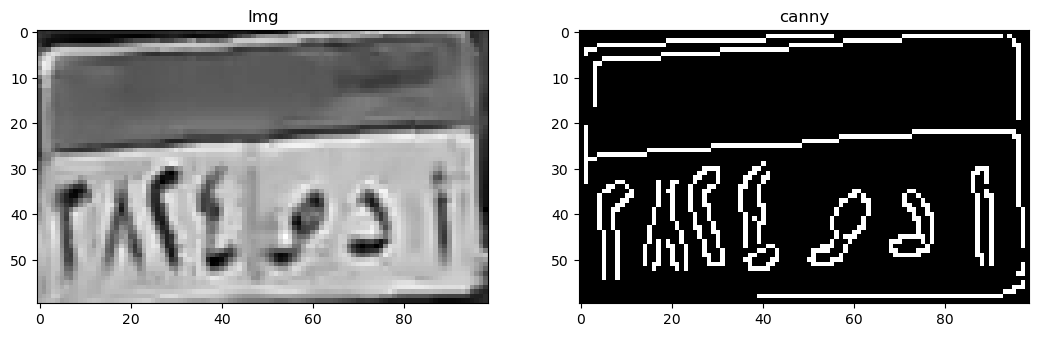

Tilt angle: -2.00 degrees


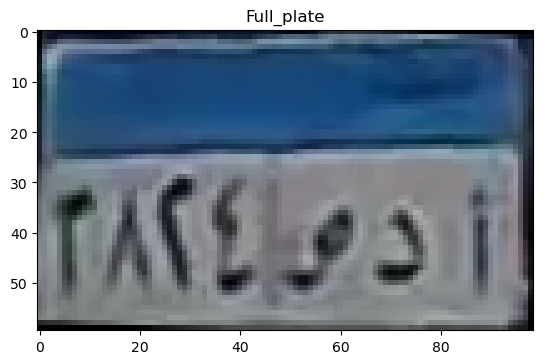

0.0 97.0 24.0 59.0
After
After
After
After
to horizonatal


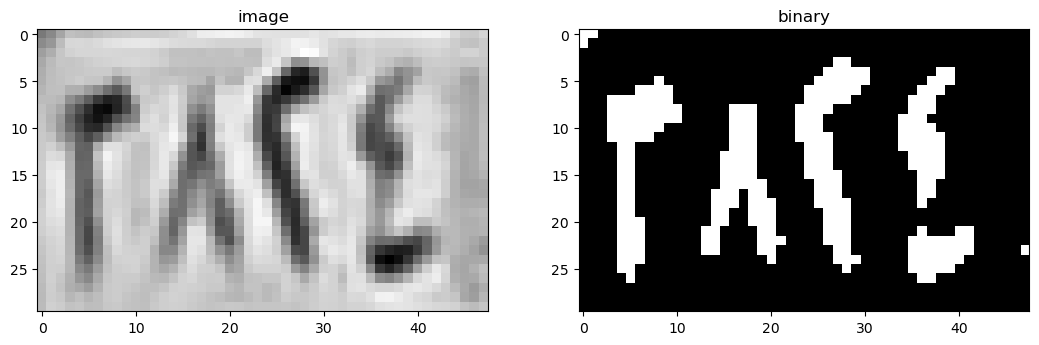

0 2
3 11
13 22
23 31
34 42


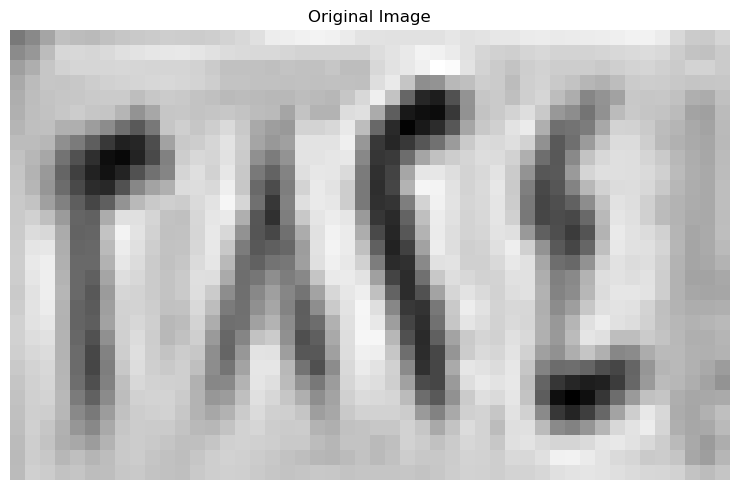

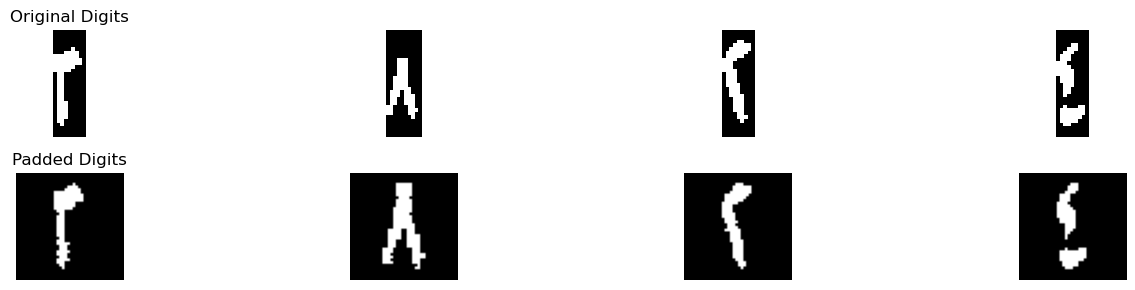

Best match: ٣
Full comparison results: {'١': 0.9119318181818183, '٢': 2.979749417249417, '٣': 3.690595975232198, '٤': 1.3593406593406594, '٥': 2.3534157083886185, '٦': 1.5041666666666664, '٧': 0.7477941176470588, '٨': 0.8479166666666667, '٩': 1.1950257667169433}
Confidence :  0.3554232789913905
Best match: ٨
Full comparison results: {'١': 3.34375, '٢': 1.5625, '٣': 1.0505998452012384, '٤': 2.21875, '٥': 1.5386351909184726, '٦': 0.725, '٧': 0.7691176470588236, '٨': 5.945138888888889, '٩': 3.3161764705882355}
Confidence :  1.3006944444444444
Best match: ٢
Full comparison results: {'١': 1.2272727272727273, '٢': 7.846226689976689, '٣': 4.045375386996904, '٤': 2.9724130036630036, '٥': 1.9500497567448032, '٦': 0.5767857142857142, '٧': 2.240808823529412, '٨': 0.6298611111111111, '٩': 1.5883295625942684}
Confidence :  1.9004256514898925
Best match: ٤
Full comparison results: {'١': 1.096590909090909, '٢': 3.2670454545454546, '٣': 2.123452012383901, '٤': 5.5025773957225566, '٥': 2.07514189886480

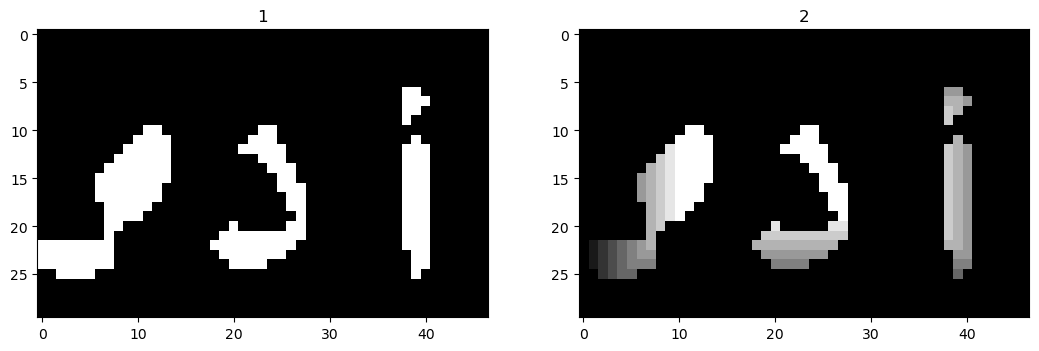

0 14
18 28
38 41


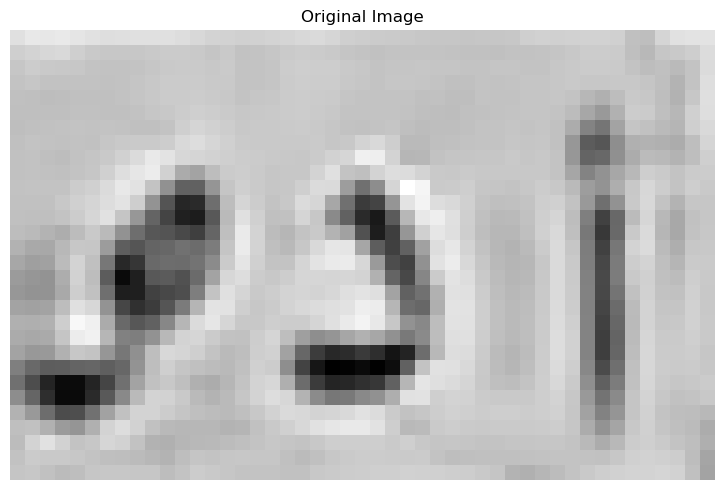

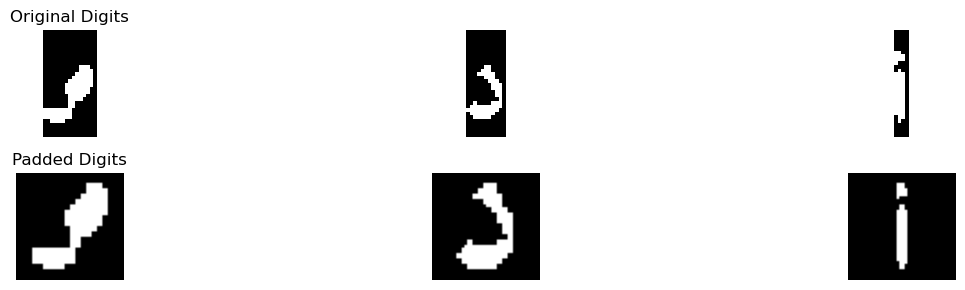

Best match: ص
Full comparison results: {'أ': 0.3526785714285714, 'ب': 0.812807881773399, 'ج': 0.5044642857142857, 'د': 2.763392857142857, 'ر': 2.2441502463054186, 'س': 4.25, 'ص': 5.0651785714285715, 'ط': 1.9017857142857142, 'ع': 0.53125, 'ف': 3.066964285714286, 'ق': 2.4330357142857144, 'ك': 1.9375, 'ل': 1.6785714285714288, 'م': 0.3125, 'ن': 1.6160714285714284, 'ه': 2.53125, 'و': 3.0401785714285716, 'ي': 3.2544642857142856}
Confidence :  0.40758928571428577
Best match: د
Full comparison results: {'أ': 0.42857142857142855, 'ب': 0.09375, 'ج': 2.695206464228203, 'د': 5.9227435064935054, 'ر': 2.201777147140715, 'س': 1.4732142857142856, 'ص': 0.9544642857142858, 'ط': 3.007040513833992, 'ع': 1.244047619047619, 'ف': 4.175925925925926, 'ق': 3.552083333333333, 'ك': 1.5369318181818183, 'ل': 2.385416666666667, 'م': 1.3612012987012987, 'ن': 3.9532142857142856, 'ه': 3.3952956989247314, 'و': 3.548611111111111, 'ي': 2.1424520226150663}
Confidence :  0.8734087902837899
Best match: أ
Full comparison resu

Tilt angle: -1.00 degrees


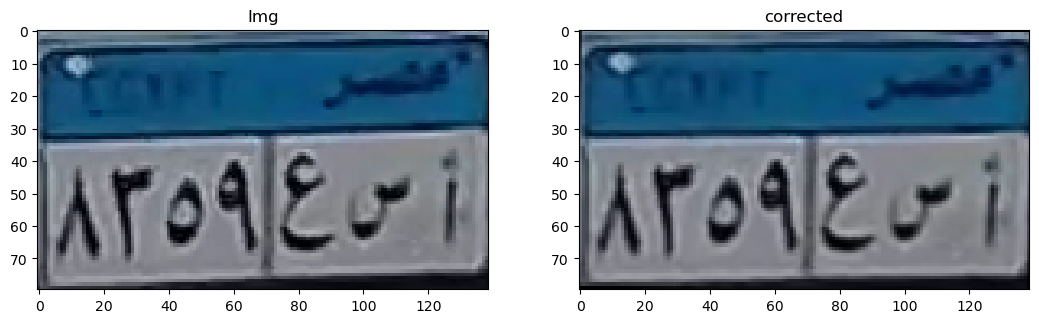

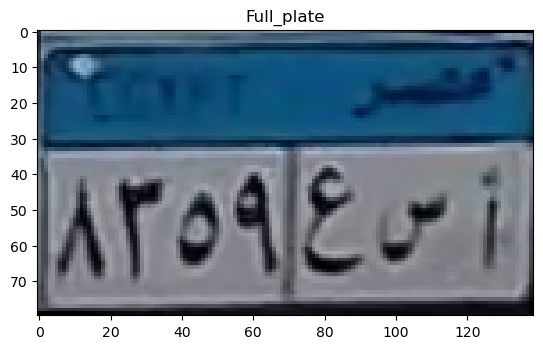

72.0 138.0 33.0 74.0
2.0 70.0 34.0 76.0
2.0 68.0 2.0 44.0
After
After
After
After
to horizonatal


C:\Users\PC\AppData\Local\Temp\ipykernel_8100\820174917.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)


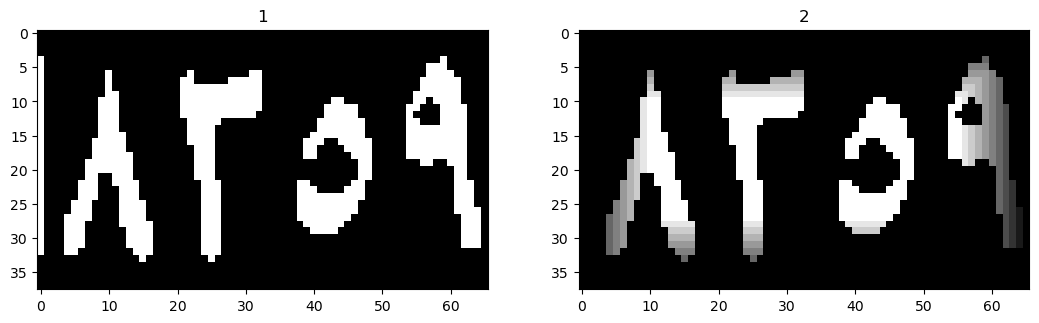

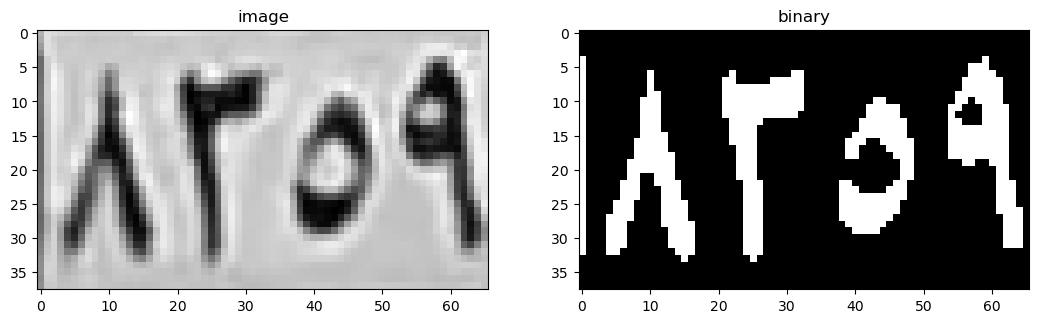

0 1
4 17
21 33
38 49
54 65


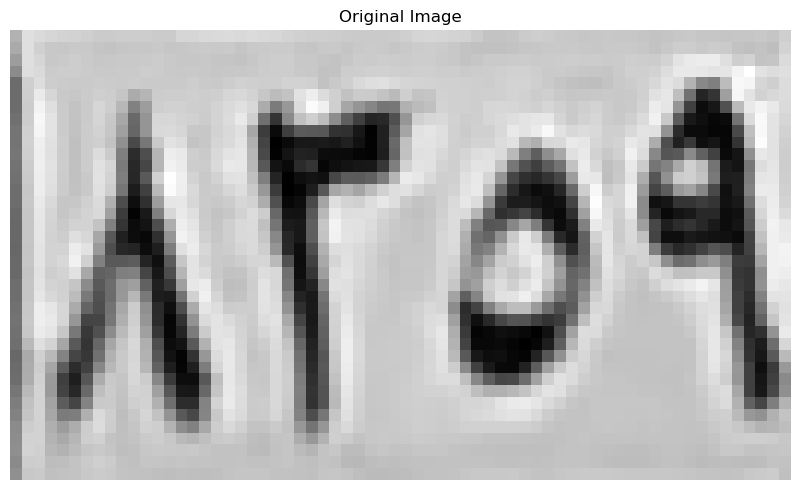

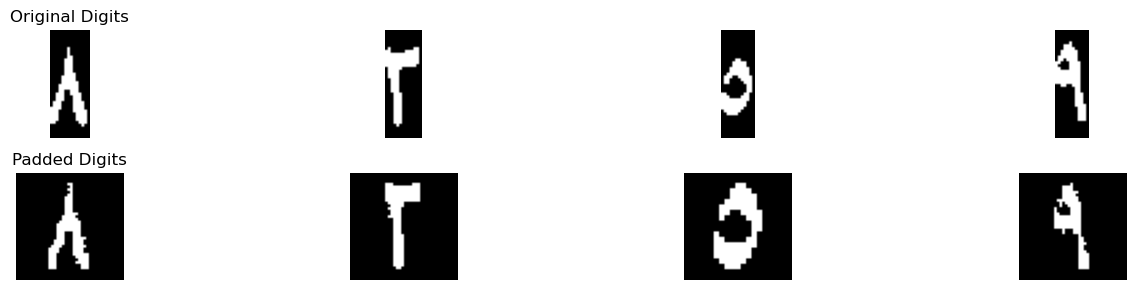

Best match: ٨
Full comparison results: {'١': 2.683333333333333, '٢': 0.5604166666666667, '٣': 0.5625, '٤': 0.9583333333333333, '٥': 0.8404743476337904, '٦': 0.7166666666666667, '٧': 1.175735294117647, '٨': 5.2354166666666675, '٩': 2.4620098039215685}
Confidence :  1.2760416666666672
Best match: ٣
Full comparison results: {'١': 0.20192307692307693, '٢': 4.778846153846153, '٣': 5.050019349845201, '٤': 2.160210622710623, '٥': 1.7461807091257555, '٦': 2.3029761904761905, '٧': 1.155514705882353, '٨': 0.275, '٩': 0.5384458270487683}
Confidence :  0.13558659799952366
Best match: ٥
Full comparison results: {'١': 0.4444444444444444, '٢': 1.5138888888888888, '٣': 1.1822002923976607, '٤': 2.8263888888888884, '٥': 7.622859231411863, '٦': 1.463888888888889, '٧': 0.7069444444444444, '٨': 0.9694444444444446, '٩': 0.7013888888888888}
Confidence :  2.3982351712614873
Best match: ٩
Full comparison results: {'١': 4.211538461538461, '٢': 2.310096153846154, '٣': 1.1156153250773992, '٤': 1.9300366300366303,

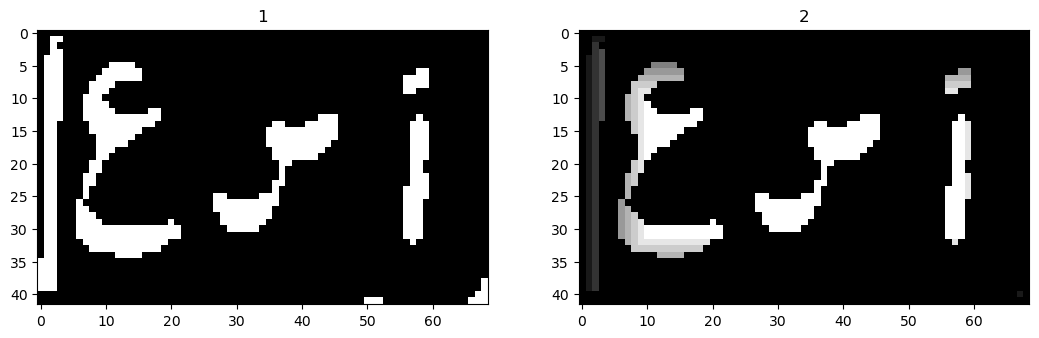

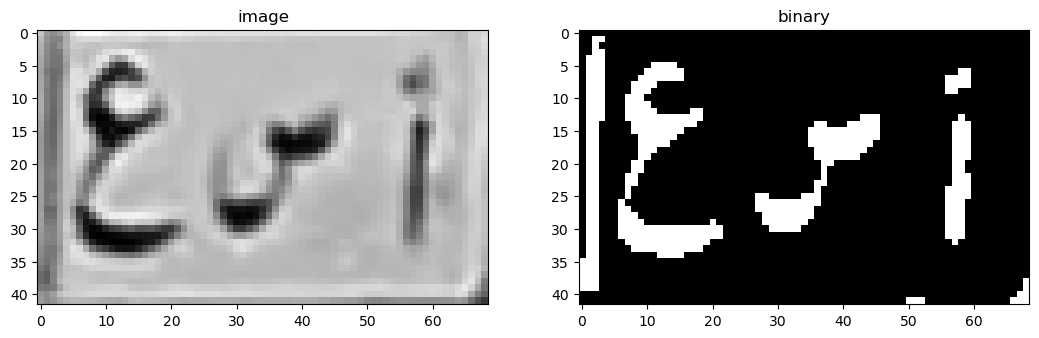

0 4
6 22
27 46
50 53
56 60
66 68


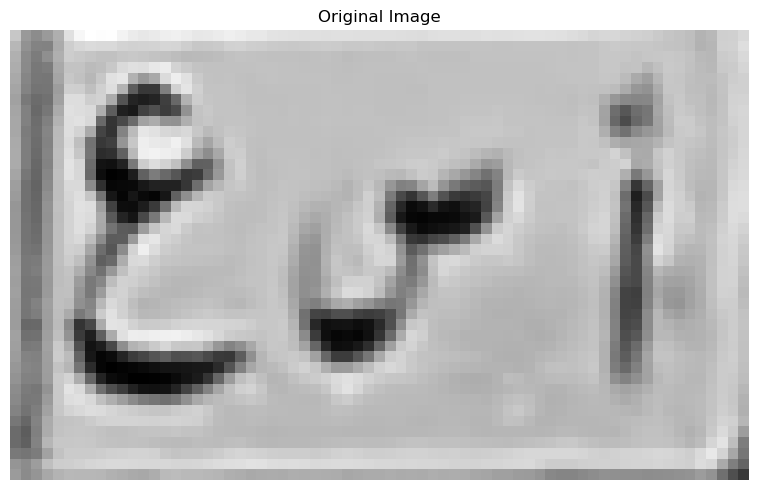

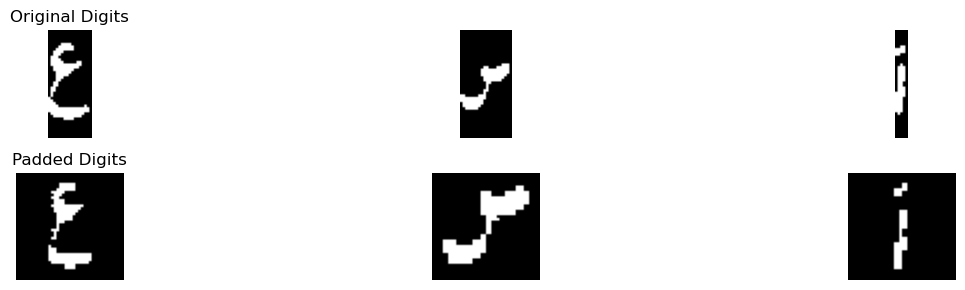

Best match: ع
Full comparison results: {'أ': 0.4375, 'ب': 0.16781609195402297, 'ج': 2.5185789049919487, 'د': 2.5794700227246667, 'ر': 0.5861375562218891, 'س': 0.36160714285714285, 'ص': 0.4595238095238095, 'ط': 1.700798748353096, 'ع': 4.468421052631579, 'ف': 1.4273531049846837, 'ق': 0.9100581314397104, 'ك': 2.0520833333333335, 'ل': 1.2374871001031993, 'م': 1.8977272727272727, 'ن': 2.743095238095238, 'ه': 0.8935483870967742, 'و': 1.2495039682539684, 'ي': 1.007469342251951}
Confidence :  0.8626629072681706
Best match: س
Full comparison results: {'أ': 0.53125, 'ب': 0.625, 'ج': 0.40625, 'د': 1.5, 'ر': 0.3125, 'س': 4.884626436781609, 'ص': 3.3122126436781607, 'ط': 0.46875, 'ع': 0.34375, 'ف': 1.1875, 'ق': 0.4375, 'ك': 0.65625, 'ل': 0.46875, 'م': 1.53125, 'ن': 0.6875, 'ه': 2.0829741379310347, 'و': 0.625, 'ي': 0.84375}
Confidence :  0.7862068965517242
Best match: أ
Full comparison results: {'أ': 3.030228311269746, 'ب': 0.19073275862068967, 'ج': 0.549746951920865, 'د': 0.589216911113196, 'ر': 0.2

Tilt angle: 0.00 degrees


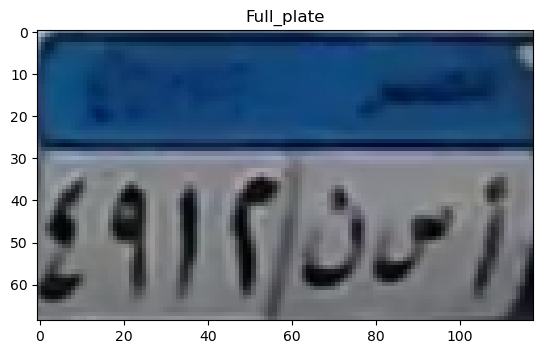

After
After
After
After
to horizonatal


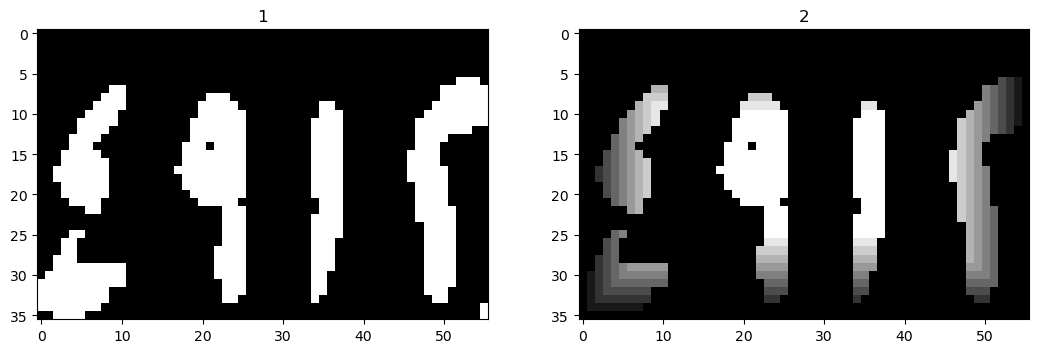

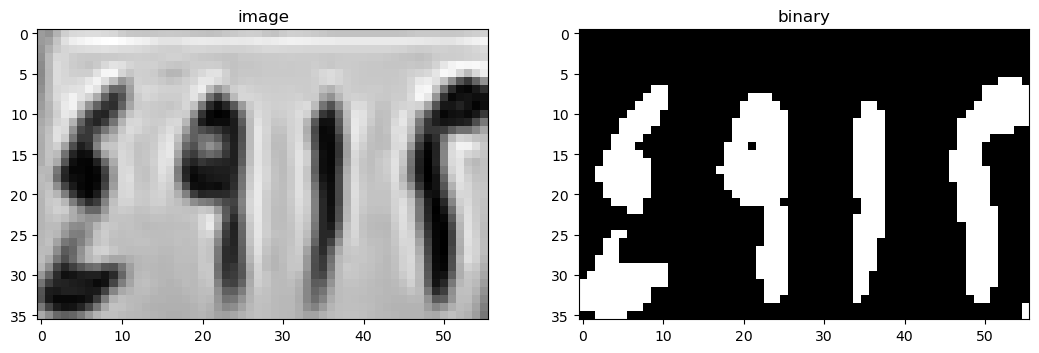

0 11
17 26
34 38
46 55


Best match: ١
Full comparison results: {'١': 2.458333333333333, '٢': 1.3237179487179487, '٣': 1.000483746130031, '٤': 2.443429487179487, '٥': 2.102079647648533, '٦': 0.35238095238095235, '٧': 0.2338235294117647, '٨': 1.7340277777777777, '٩': 1.3397329465284875}
Confidence :  0.007451923076922995
Best match: ١
Full comparison results: {'١': 3.9499999999999997, '٢': 1.804341491841492, '٣': 0.9588815789473684, '٤': 0.9839056776556776, '٥': 2.039579647648533, '٦': 2.220535714285714, '٧': 0.2077205882352941, '٨': 2.0993055555555555, '٩': 3.022404474610357}
Confidence :  0.4637977626948213
Best match: ١
Full comparison results: {'١': 3.3874999999999997, '٢': 2.070439976689977, '٣': 1.4802631578947367, '٤': 1.6532509157509159, '٥': 0.9191913607548282, '٦': 0.14285714285714285, '٧': 0.58125, '٨': 1.9527777777777775, '٩': 0.8585030165912518}
Confidence :  0.6585300116550115
Best match: ٢
Full comparison results: {'١': 0.2159090909090909, '٢': 5.8851252913752905, '٣': 3.9479489164086687, '٤': 2.

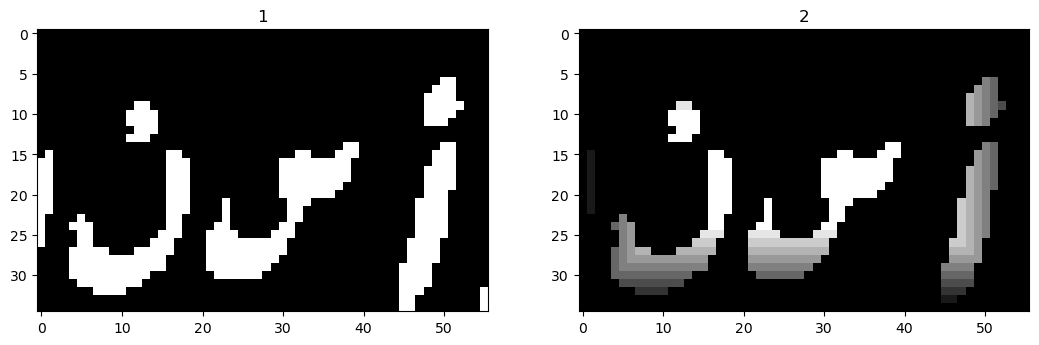

0 2
4 19
21 40
45 53


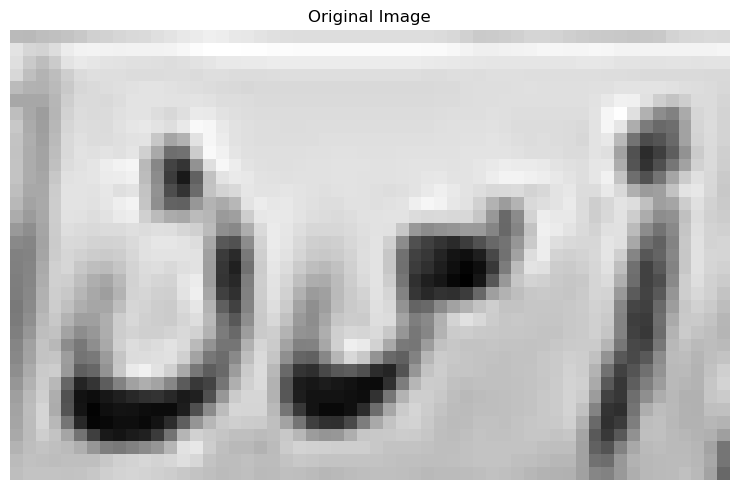

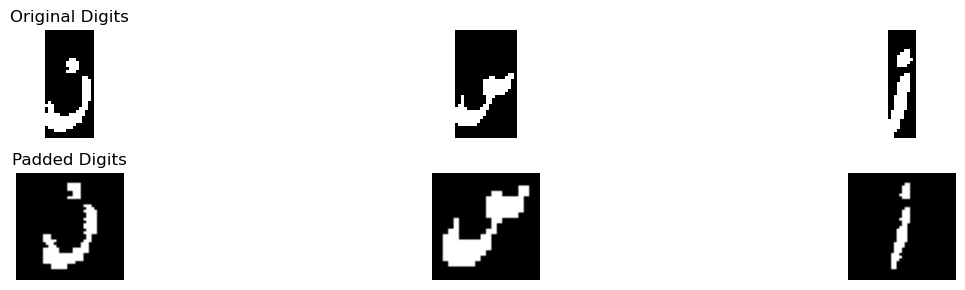

Best match: ن
Full comparison results: {'أ': 0.21350806451612903, 'ب': 0.25969827586206895, 'ج': 1.28602340694732, 'د': 3.66824494949495, 'ر': 2.9304512922110373, 'س': 1.6830357142857144, 'ص': 1.5913690476190476, 'ط': 1.4344614624505931, 'ع': 1.3592741935483872, 'ف': 2.89530103259942, 'ق': 3.376583034647551, 'ك': 0.9422348484848485, 'ل': 2.8622983870967738, 'م': 0.5613636363636364, 'ن': 4.43707757296467, 'ه': 1.4007392473118279, 'و': 2.3643998549240486, 'ي': 2.279779821627648}
Confidence :  0.38441631173486
Best match: س
Full comparison results: {'أ': 0.3125, 'ب': 0.6270833333333333, 'ج': 0.59375, 'د': 1.8125, 'ر': 0.4375, 'س': 5.5770833333333325, 'ص': 3.689583333333333, 'ط': 0.375, 'ع': 0.28125, 'ف': 1.375, 'ق': 0.71875, 'ك': 0.34375, 'ل': 0.5625, 'م': 1.125, 'ن': 1.03125, 'ه': 2.575, 'و': 0.84375, 'ي': 1.03125}
Confidence :  0.9437499999999996
Best match: أ
Full comparison results: {'أ': 1.7549059139784946, 'ب': 0.2636770557029178, 'ج': 0.18219461697722567, 'د': 0.41203281525262947, 

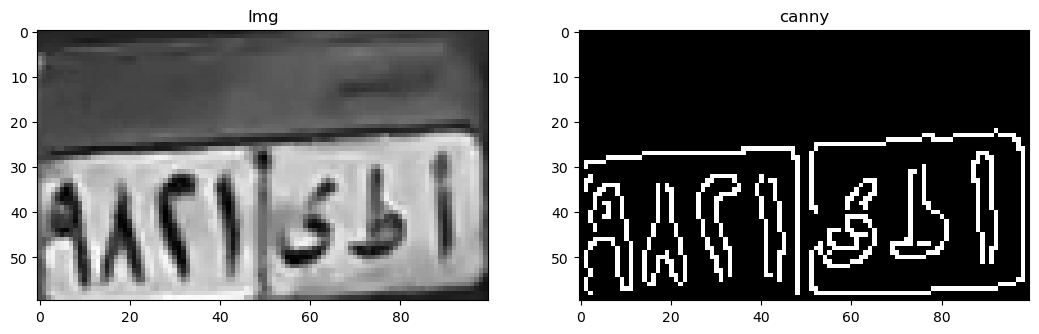

Tilt angle: -4.00 degrees


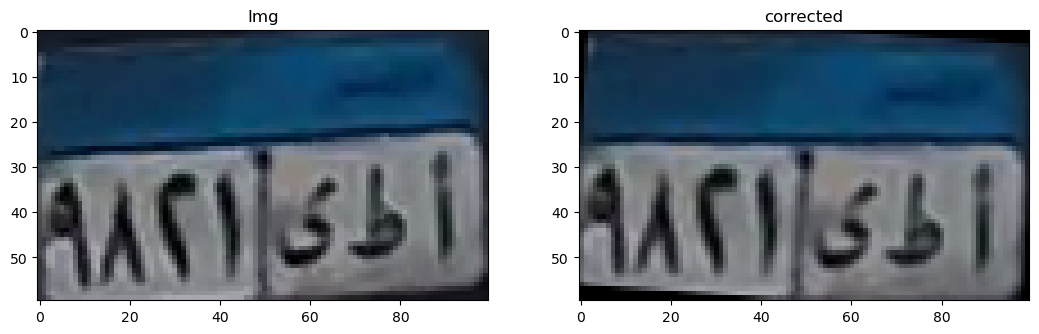

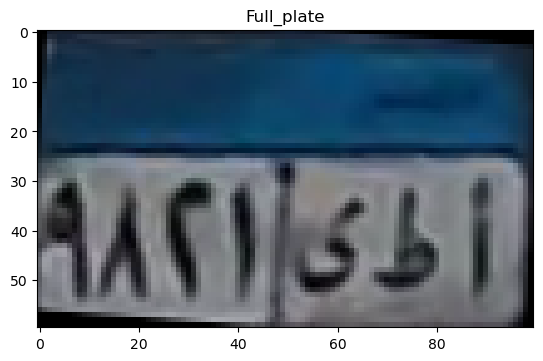

0.0 48.0 26.0 58.0
49.0 98.0 27.0 59.0
0.0 48.0 2.0 34.0
After
After
0.0 48.0 3.0 35.0
After
After
to horizonatal


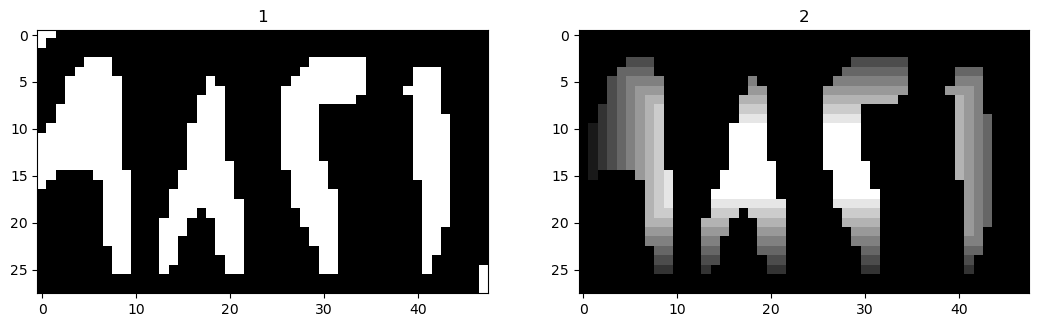

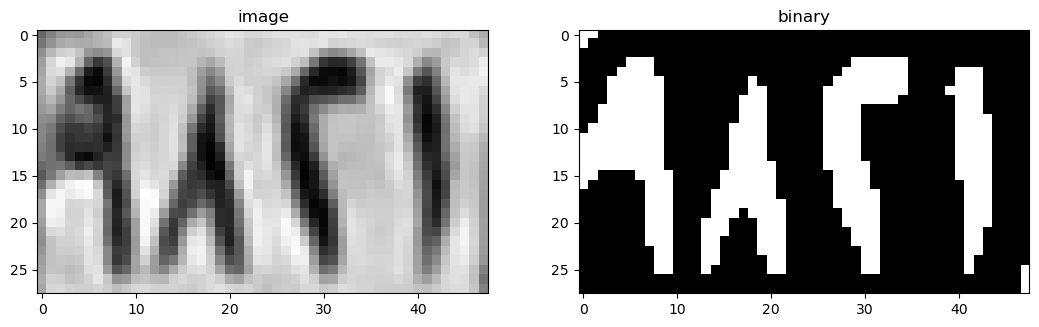

0 10
13 22
26 35
39 44


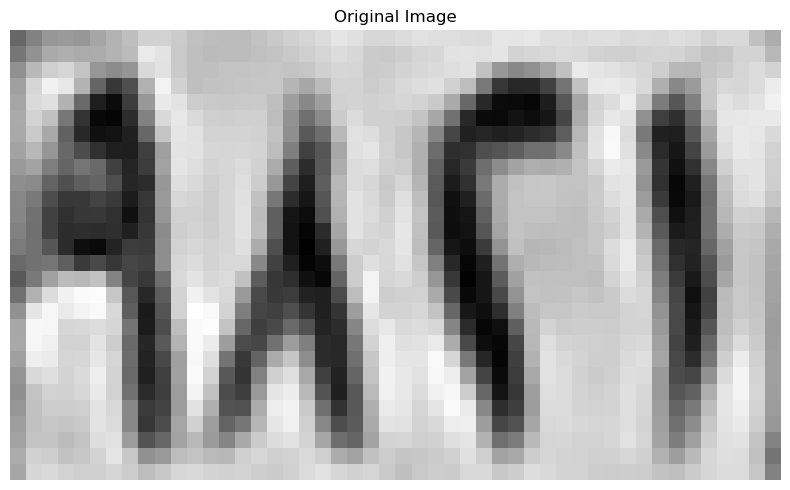

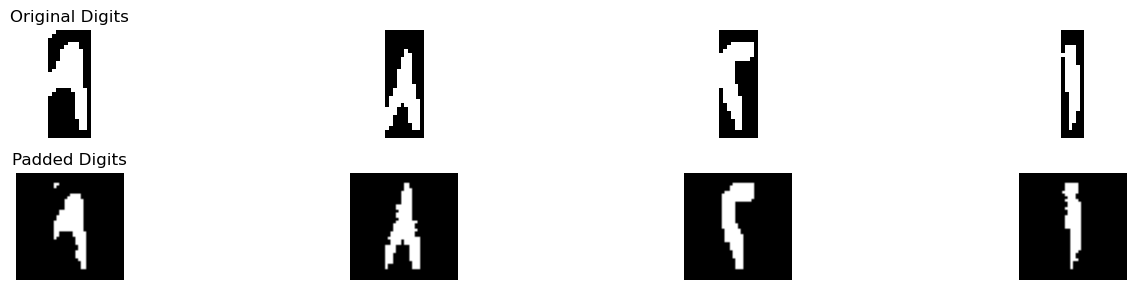

Best match: ٩
Full comparison results: {'١': 2.5625, '٢': 0.5576923076923077, '٣': 0.7401315789473684, '٤': 0.4151785714285714, '٥': 0.7303553000147427, '٦': 2.0282738095238093, '٧': 0.7518382352941176, '٨': 3.5680555555555555, '٩': 4.1949157868275515}
Confidence :  0.313430115635998
Best match: ٨
Full comparison results: {'١': 2.96875, '٢': 1.2307692307692308, '٣': 0.7401315789473684, '٤': 1.1398580586080587, '٥': 0.6737385743771191, '٦': 0.7333333333333333, '٧': 1.2330882352941177, '٨': 4.839583333333334, '٩': 2.3270801910507792}
Confidence :  0.9354166666666668
Best match: ٢
Full comparison results: {'١': 0.8645833333333333, '٢': 7.257211538461538, '٣': 4.559404024767802, '٤': 3.1782051282051285, '٥': 2.264194493586908, '٦': 0.8767857142857143, '٧': 2.7194852941176473, '٨': 0.5805555555555556, '٩': 1.5153343388637506}
Confidence :  1.3489037568468683
Best match: ١
Full comparison results: {'١': 4.9035714285714285, '٢': 2.674096736596736, '٣': 1.1776315789473684, '٤': 1.4478937728937

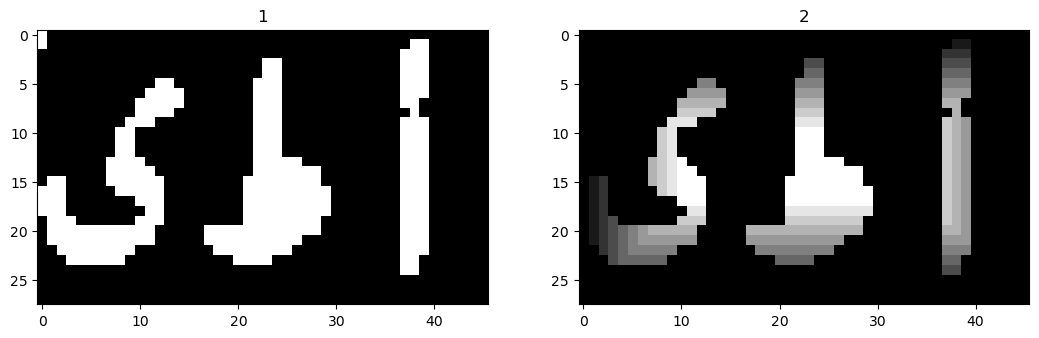

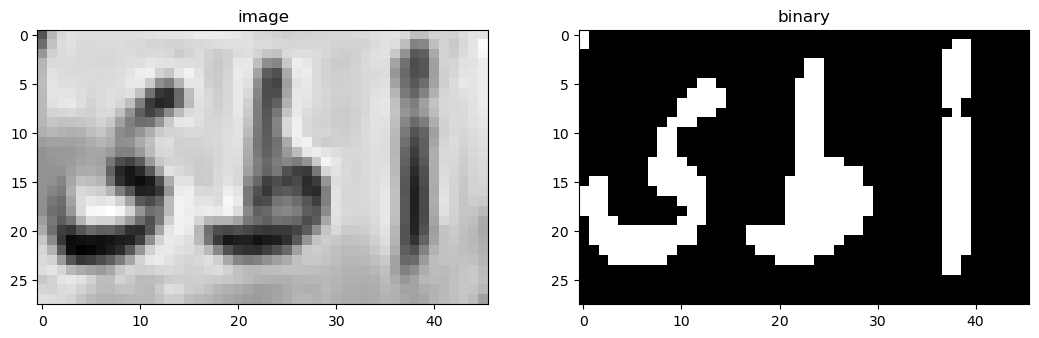

0 15
17 30
37 40


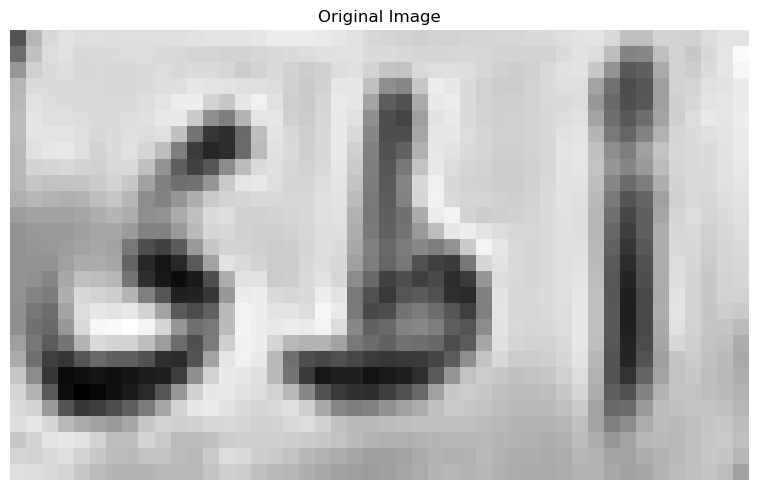

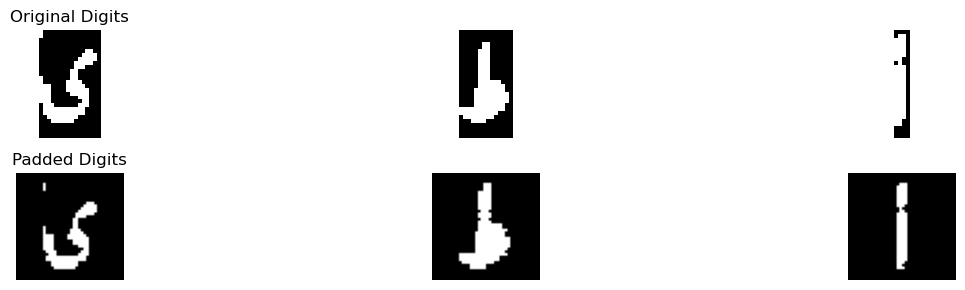

Best match: ل
Full comparison results: {'أ': 0.15000000000000002, 'ب': 0.503315649867374, 'ج': 1.2812686910512996, 'د': 1.9916708754208756, 'ر': 2.3310095844934673, 'س': 1.3348214285714286, 'ص': 0.8607142857142858, 'ط': 2.1000509184557283, 'ع': 1.3804713570634037, 'ف': 2.203869047619048, 'ق': 2.9542777174520776, 'ك': 0.9005681818181818, 'ل': 3.230357142857143, 'م': 0.2818181818181818, 'ن': 2.7160253456221195, 'ه': 0.9852150537634409, 'و': 2.3013216845878137, 'ي': 2.4987249163879595}
Confidence :  0.1380397127025328
Best match: ط
Full comparison results: {'أ': 1.330592105263158, 'ب': 0.2781001326259947, 'ج': 1.3116214449166395, 'د': 2.5319158692185004, 'ر': 1.891117105920724, 'س': 1.2098214285714286, 'ص': 1.3642857142857143, 'ط': 4.131464097496706, 'ع': 0.73125, 'ف': 2.396233639654692, 'ق': 1.6158086187691452, 'ك': 1.4403409090909092, 'ل': 1.6858552631578947, 'م': 0.2230861244019139, 'ن': 1.7568703007518798, 'ه': 1.6923387096774194, 'و': 2.2743925786688943, 'ي': 2.577100569148624}
Confi

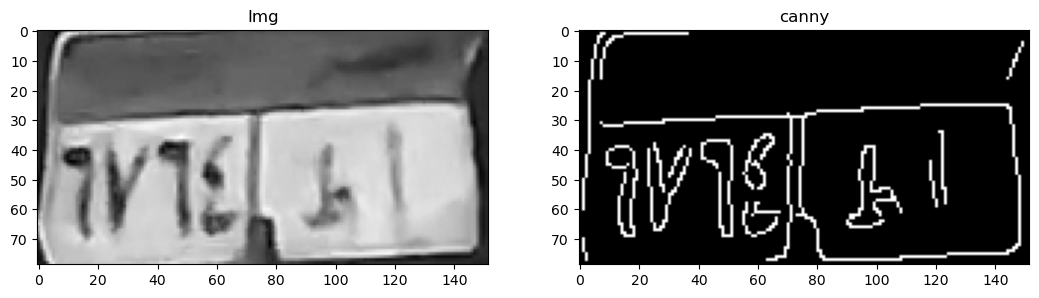

Tilt angle: -3.50 degrees


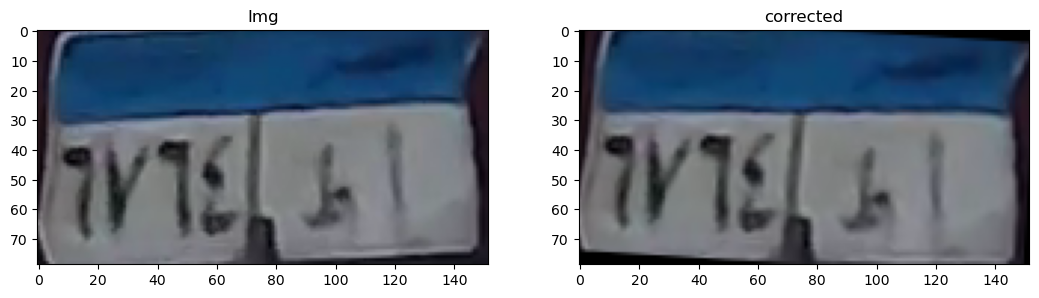

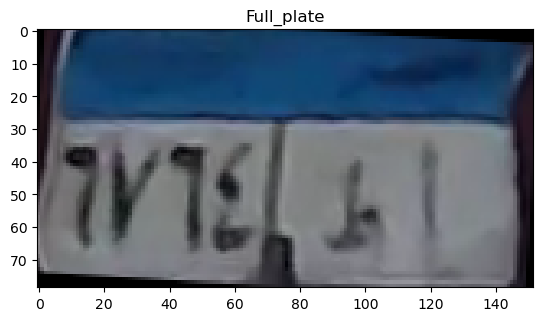

0.0 72.0 28.0 76.0
73.0 146.0 29.0 78.0
0.0 72.0 0.0 45.0
After
After
After
After
to horizonatal


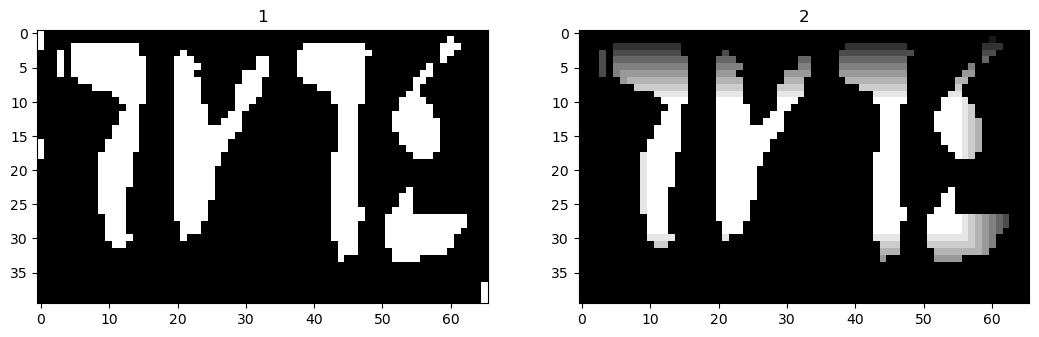

0 1
3 4
5 16
20 34
38 49
51 63


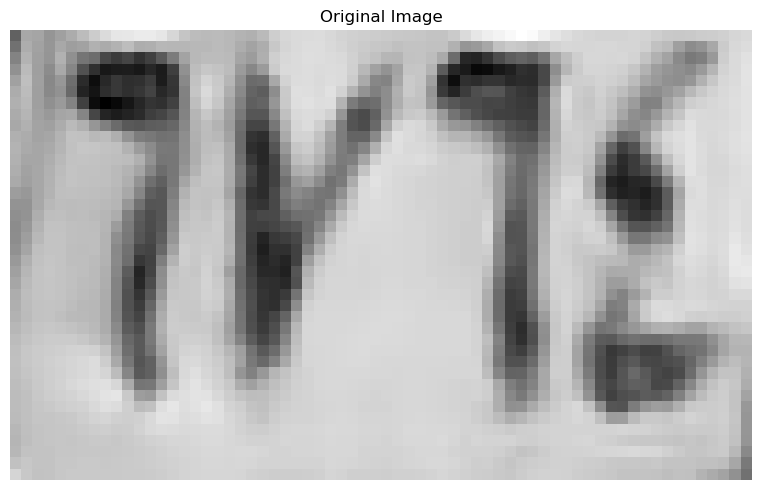

Best match: ٢
Full comparison results: {'١': 2.1988636363636362, '٢': 3.8412004662004664, '٣': 1.71671826625387, '٤': 0.7819826007326007, '٥': 2.1005915524104375, '٦': 3.063392857142857, '٧': 2.0783088235294116, '٨': 0.5986111111111111, '٩': 1.3546694318753143}
Confidence :  0.3889038045288047
Best match: ٧
Full comparison results: {'١': 0.0625, '٢': 0.90625, '٣': 1.8874806501547987, '٤': 1.5, '٥': 0.888250036856848, '٦': 0.125, '٧': 2.6363970588235293, '٨': 0.8354166666666667, '٩': 0.7150735294117647}
Confidence :  0.3744582043343653
Best match: ١
Full comparison results: {'١': 3.5823863636363633, '٢': 2.8580273892773893, '٣': 0.5452786377708978, '٤': 0.22767857142857142, '٥': 1.921623912722984, '٦': 3.4690476190476187, '٧': 1.055514705882353, '٨': 0.49722222222222223, '٩': 1.8385809451985922}
Confidence :  0.0566693722943723
Best match: ٤
Full comparison results: {'١': 1.2291666666666665, '٢': 0.5641025641025641, '٣': 0.6640866873065016, '٤': 4.891597985347985, '٥': 2.513494213474863

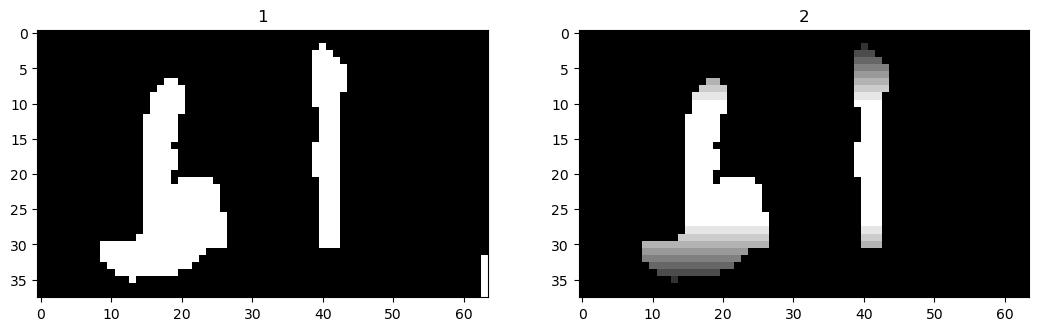

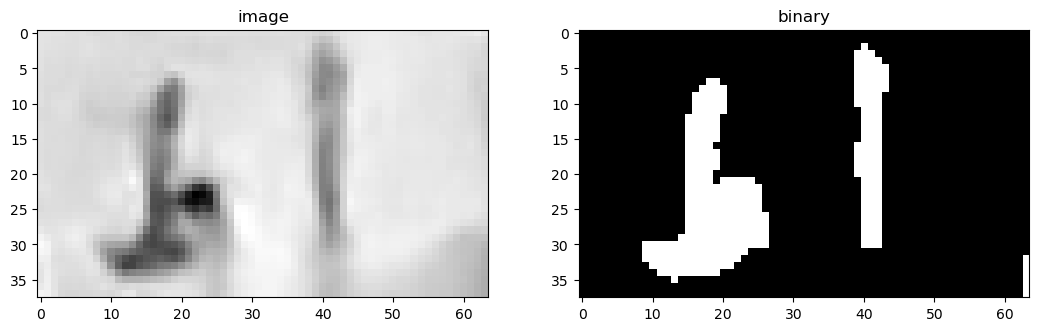

9 27
39 44


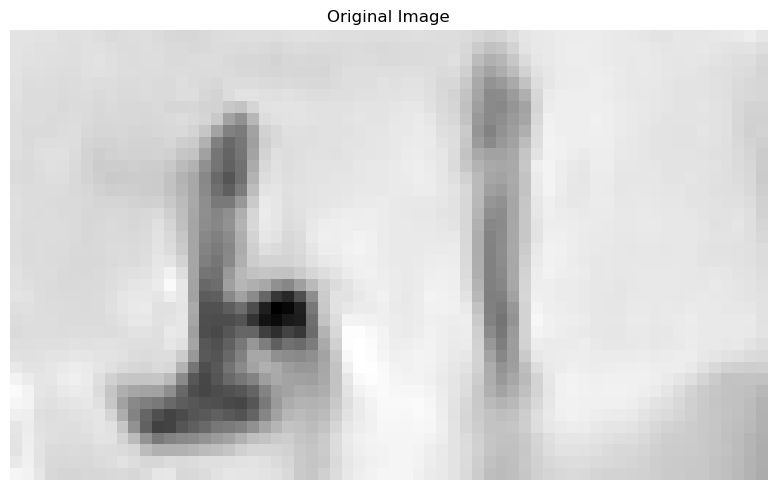

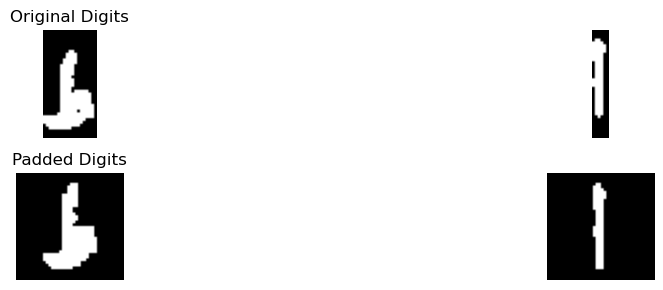

Best match: ط
Full comparison results: {'أ': 0.99375, 'ب': 0.1426558355437666, 'ج': 1.8346129514607776, 'د': 3.171174242424242, 'ر': 2.570164382094667, 'س': 1.0848214285714286, 'ص': 1.3827380952380952, 'ط': 5.183917984189723, 'ع': 1.05, 'ف': 2.9840608465608467, 'ق': 2.376785714285714, 'ك': 1.7698863636363635, 'ل': 2.3, 'م': 0.21875, 'ن': 2.217202380952381, 'ه': 1.722513440860215, 'و': 2.7251984126984126, 'ي': 3.201449275362319}
Confidence :  0.9912343544137019
Best match: أ
Full comparison results: {'أ': 3.6041437728937726, 'ب': 0.06573275862068965, 'ج': 0.7033442604094778, 'د': 0.6451552287581699, 'ر': 0.0, 'س': 0.0, 'ص': 0.3494047619047619, 'ط': 1.6881175889328064, 'ع': 0.125, 'ف': 0.645224171539961, 'ق': 0.03125, 'ك': 0.045454545454545456, 'ل': 0.0, 'م': 0.4099338161838162, 'ن': 0.28125, 'ه': 0.5123655913978494, 'و': 0.4407738095238095, 'ي': 0.29910714285714285}
Confidence :  0.9580130919804831
[['٢', '٧', '١', '٤'], ['ط', 'أ']]


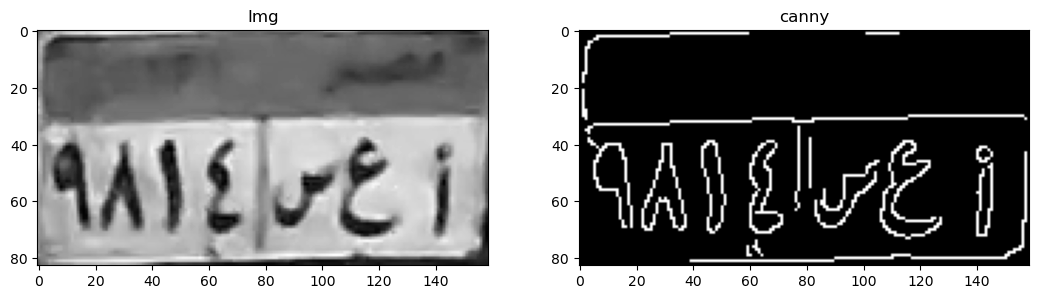

Tilt angle: -1.00 degrees


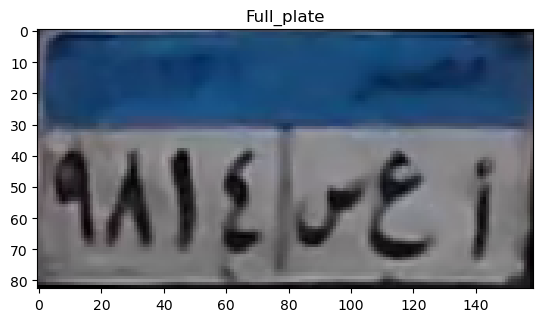

After
After
0.0 79.0 10.0 47.0
After
After
to horizonatal


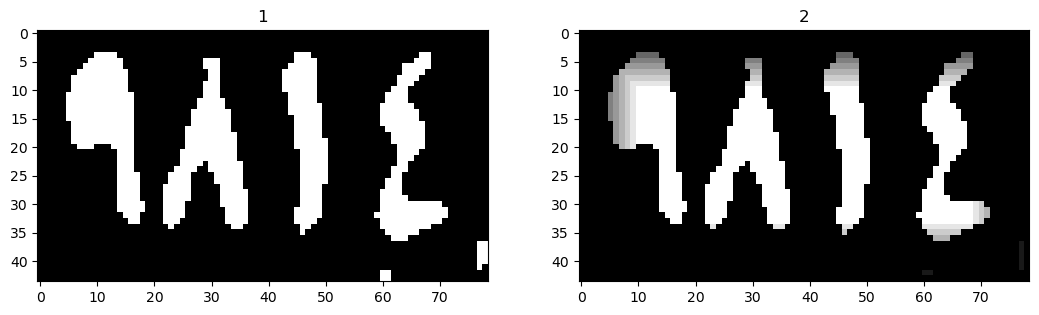

5 19
22 37
43 51
59 72
77 78


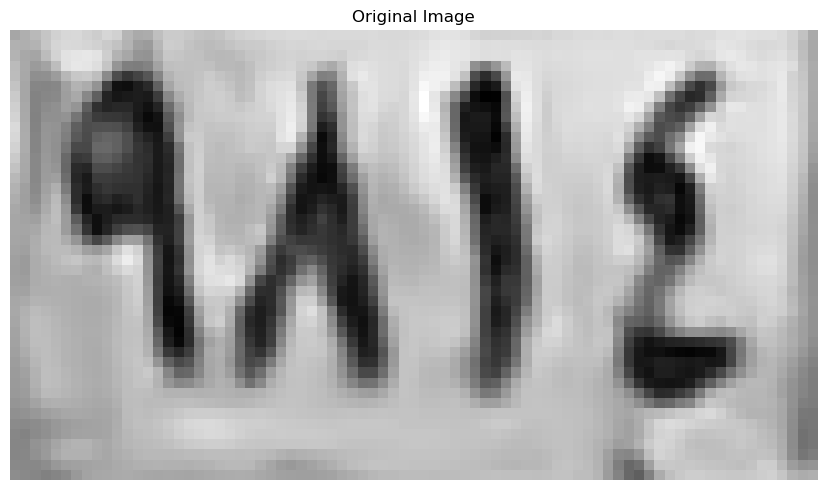

Best match: ٩
Full comparison results: {'١': 2.3526785714285716, '٢': 3.0892857142857144, '٣': 2.1448335913312695, '٤': 2.3285714285714283, '٥': 3.2529301194161873, '٦': 2.4407738095238094, '٧': 1.1845588235294118, '٨': 2.895138888888889, '٩': 4.957633053221288}
Confidence :  0.8523514669025505
Best match: ٨
Full comparison results: {'١': 2.447916666666667, '٢': 0.7604166666666666, '٣': 0.6875, '٤': 1.1270833333333334, '٥': 0.7876907341884121, '٦': 1.3458333333333332, '٧': 0.981985294117647, '٨': 5.741666666666667, '٩': 2.839501633986928}
Confidence :  1.4510825163398695
Best match: ١
Full comparison results: {'١': 5.896428571428571, '٢': 2.539117132867133, '٣': 1.2265866873065017, '٤': 1.7470009157509159, '٥': 1.594090925844022, '٦': 0.7333333333333333, '٧': 0.8676470588235294, '٨': 2.207638888888889, '٩': 1.9736676721970838}
Confidence :  1.6786557192807192
Best match: ١
Full comparison results: {'١': 2.1, '٢': 1.495847902097902, '٣': 1.1817917956656347, '٤': 1.3998168498168497, '٥':

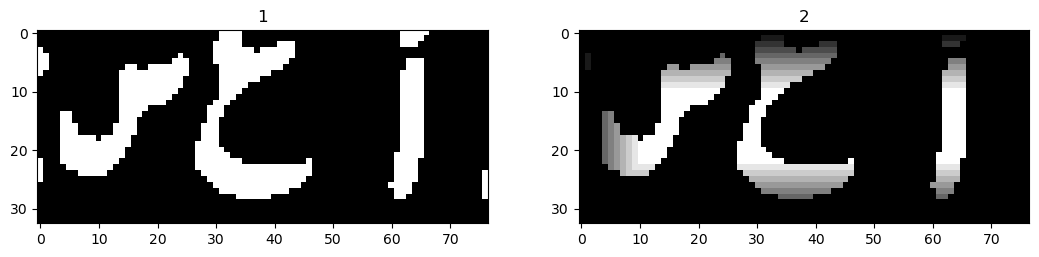

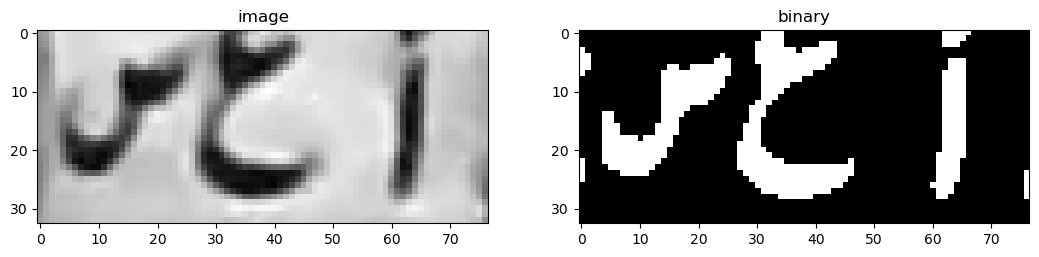

0 2
4 26
27 47
60 67


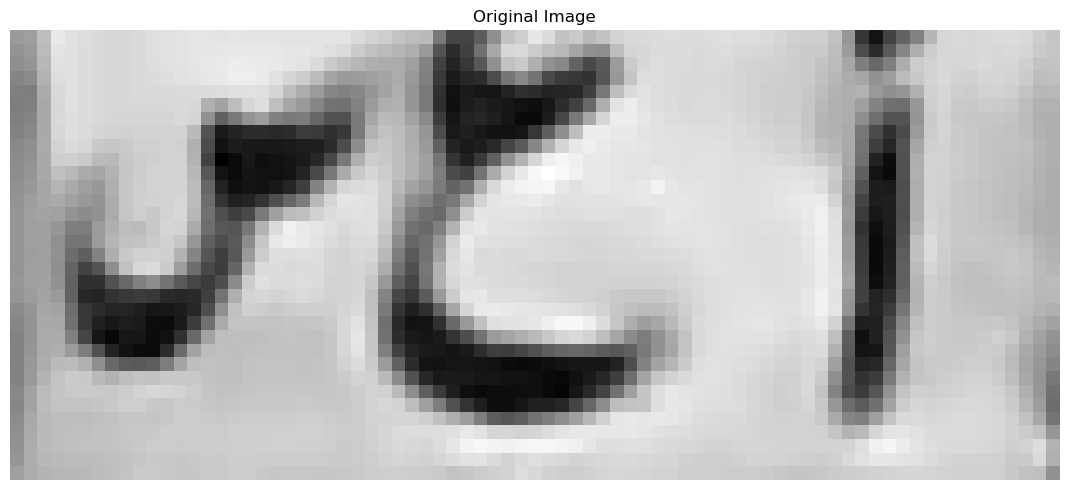

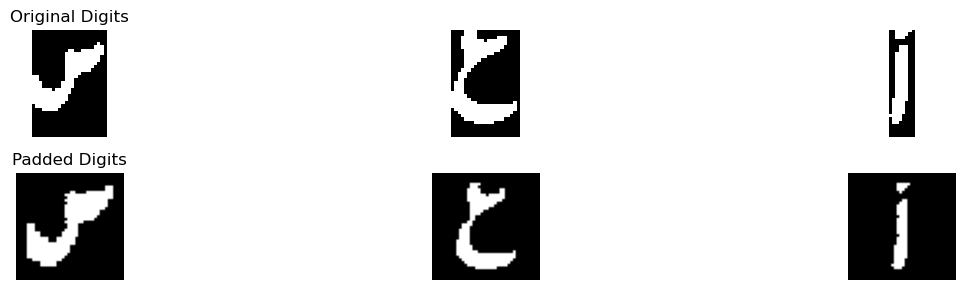

Best match: س
Full comparison results: {'أ': 0.40625, 'ب': 0.65625, 'ج': 0.53125, 'د': 1.78125, 'ر': 0.375, 'س': 5.320833333333333, 'ص': 4.220833333333333, 'ط': 0.46875, 'ع': 0.3125, 'ف': 1.21875, 'ق': 0.65625, 'ك': 0.6875, 'ل': 0.46875, 'م': 1.21875, 'ن': 0.875, 'ه': 2.664583333333333, 'و': 1.3125, 'ي': 1.0}
Confidence :  0.5499999999999998
Best match: ج
Full comparison results: {'أ': 0.045454545454545456, 'ب': 0.30860411140583555, 'ج': 4.000109793588054, 'د': 2.8523021885521884, 'ر': 1.5320018399890964, 'س': 0.6785714285714286, 'ص': 0.27840909090909094, 'ط': 1.566493741765481, 'ع': 3.008522727272727, 'ف': 1.8141835016835017, 'ق': 1.0740740740740742, 'ك': 2.2954545454545454, 'ل': 1.2102272727272727, 'م': 1.5113636363636365, 'ن': 2.3973863636363637, 'ه': 1.0748655913978493, 'و': 1.1245791245791246, 'ي': 1.4103064507955811}
Confidence :  0.4957935331576635
Best match: أ
Full comparison results: {'أ': 2.7530906593406597, 'ب': 0.25323275862068967, 'ج': 0.08695652173913043, 'د': 0.61174080

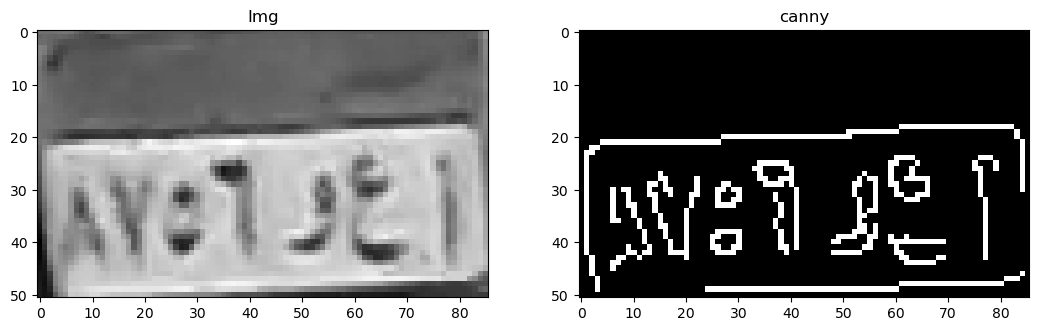

Tilt angle: -3.00 degrees


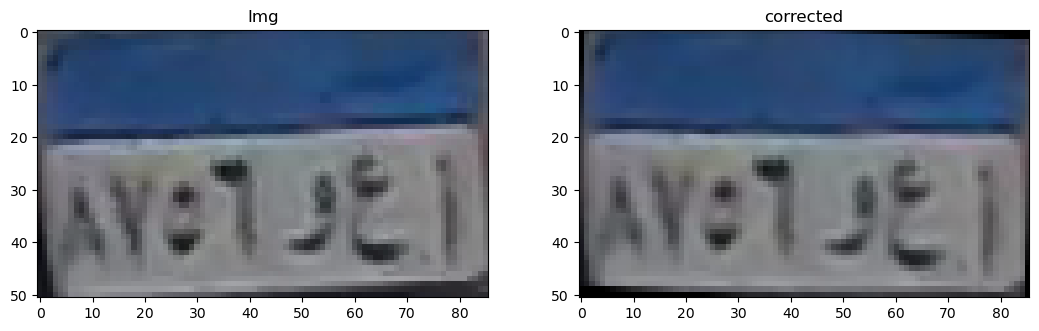

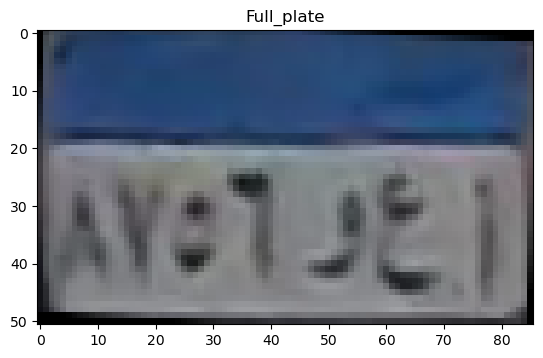

1.0 84.0 20.0 48.0
1.0 42.0 0.0 28.0
After
After
0.0 41.0 0.0 28.0
After
After
to horizonatal


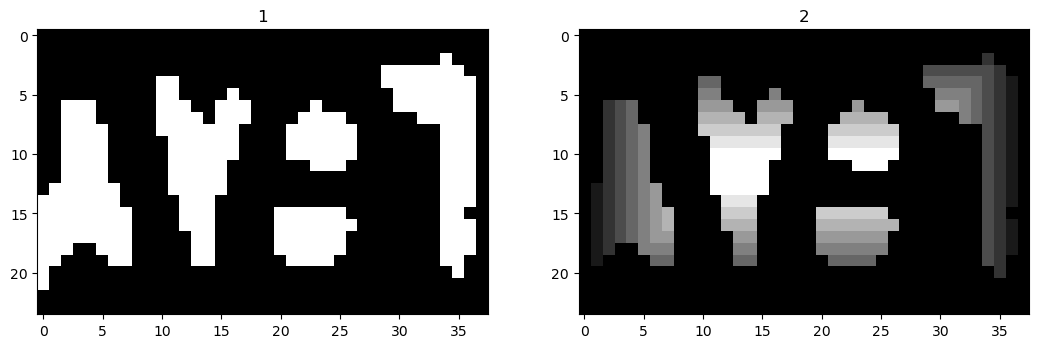

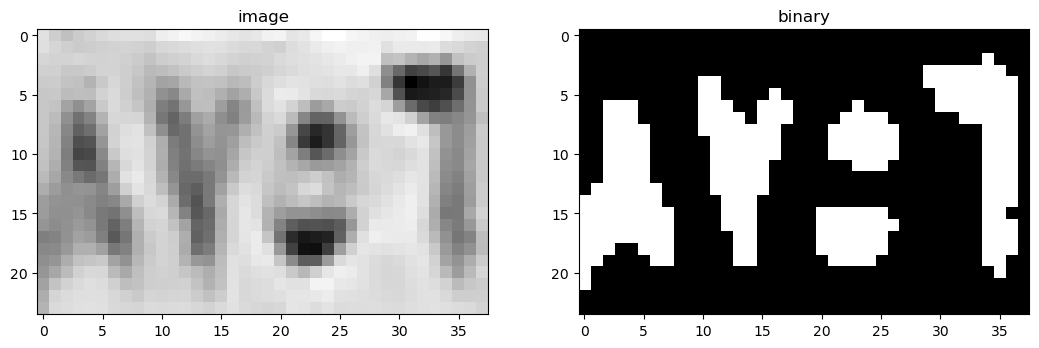

0 8
10 18
20 27
29 37


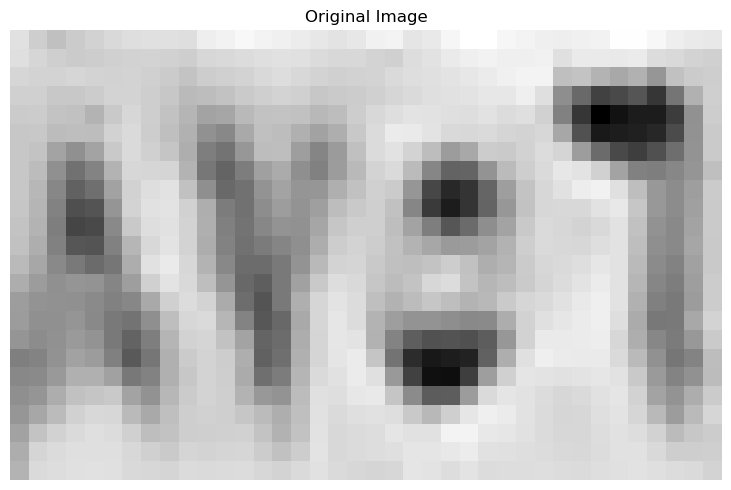

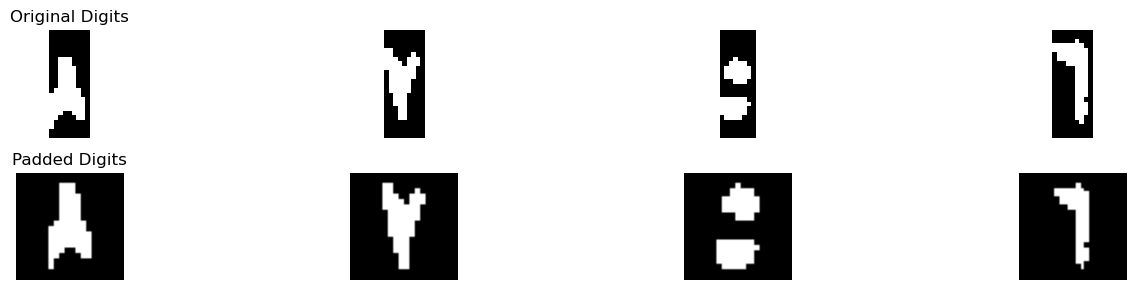

Best match: ٨
Full comparison results: {'١': 2.21875, '٢': 1.9375, '٣': 1.265673374613003, '٤': 1.75, '٥': 2.7890406162464982, '٦': 1.4, '٧': 0.861764705882353, '٨': 5.177083333333334, '٩': 3.1055964052287583}
Confidence :  1.0357434640522878
Best match: ٧
Full comparison results: {'١': 0.8125, '٢': 2.09375, '٣': 3.502612229102167, '٤': 1.8125, '٥': 2.1078108875129, '٦': 1.575, '٧': 4.158088235294118, '٨': 1.7208333333333332, '٩': 1.866421568627451}
Confidence :  0.32773800309597534
Best match: ٥
Full comparison results: {'١': 0.875, '٢': 1.71875, '٣': 1.31046826625387, '٤': 3.1875, '٥': 6.061546329057938, '٦': 1.61875, '٧': 0.9132352941176471, '٨': 1.3381944444444445, '٩': 0.7083333333333333}
Confidence :  1.437023164528969
Best match: ٦
Full comparison results: {'١': 2.7764423076923075, '٢': 1.0889423076923077, '٣': 1.2916021671826625, '٤': 0.19642857142857142, '٥': 2.278066489753796, '٦': 5.629761904761905, '٧': 0.38786764705882354, '٨': 1.1444444444444444, '٩': 1.585312971342383}
C

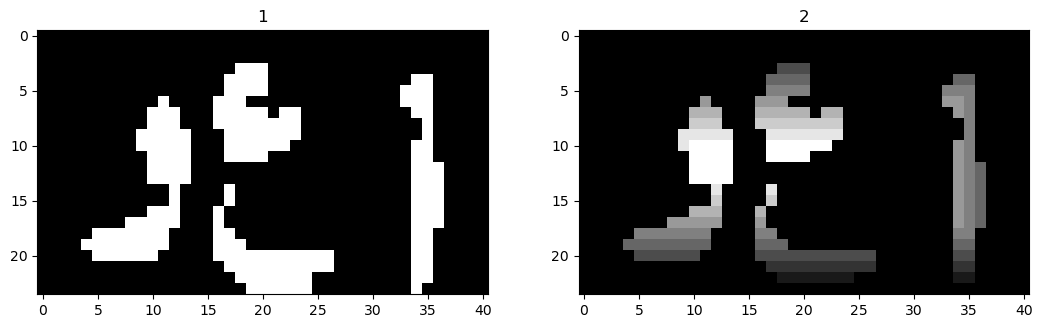

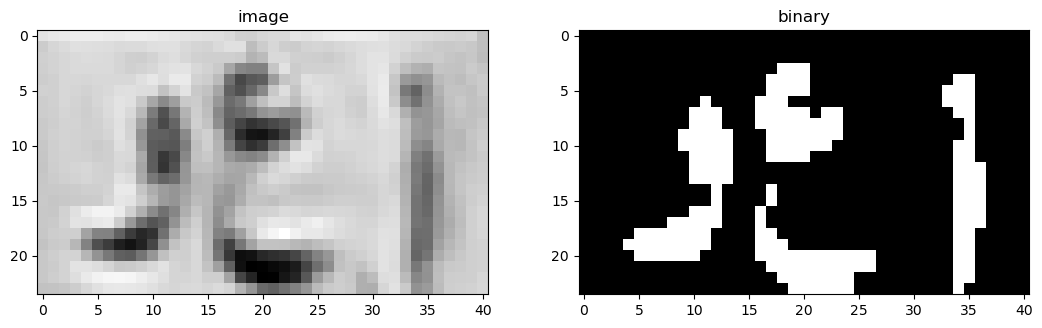

4 14
16 27
33 37


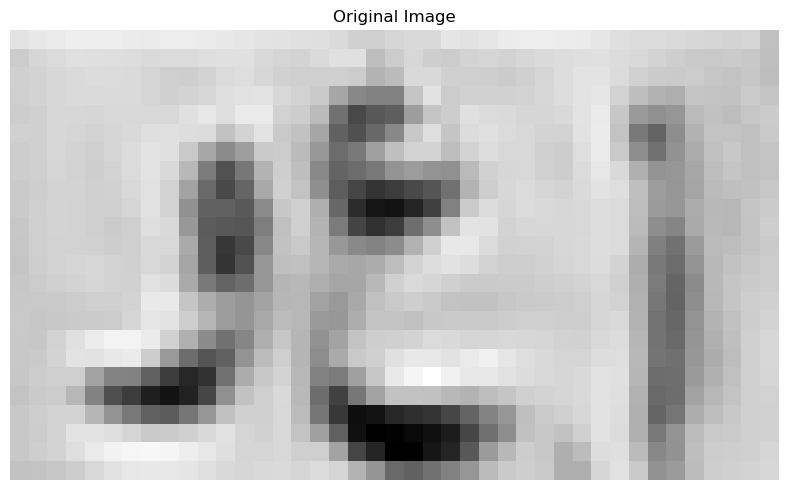

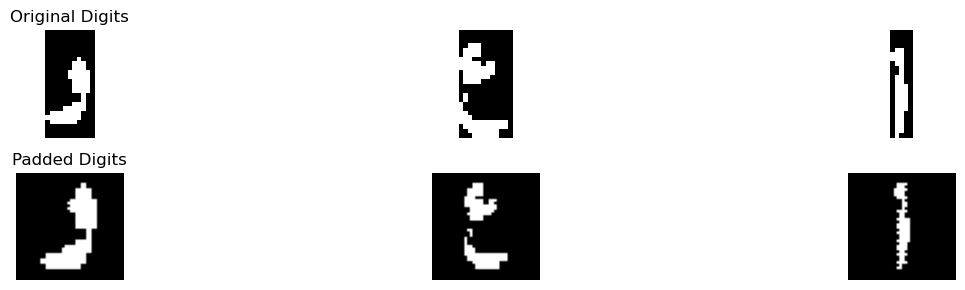

Best match: و
Full comparison results: {'أ': 0.047619047619047616, 'ب': 0.3879310344827586, 'ج': 1.2197420634920635, 'د': 4.176245791245791, 'ر': 3.933333154851146, 'س': 2.553571428571429, 'ص': 1.4785714285714286, 'ط': 2.64159255599473, 'ع': 1.2767857142857142, 'ف': 3.314153439153439, 'ق': 3.299603174603175, 'ك': 1.7556818181818181, 'ل': 3.6964285714285716, 'م': 0.3068181818181818, 'ن': 2.6989285714285716, 'ه': 3.0442876344086023, 'و': 4.651289682539682, 'ي': 2.819526397515528}
Confidence :  0.2375219456469453
Best match: ع
Full comparison results: {'أ': 0.21875, 'ب': 0.440815649867374, 'ج': 2.3478260869565215, 'د': 2.232549723238578, 'ر': 1.1444697294210038, 'س': 0.36160714285714285, 'ص': 0.0625, 'ط': 1.360350790513834, 'ع': 4.42821434147103, 'ف': 1.1813735728209411, 'ق': 0.8806739069896965, 'ك': 1.5066287878787878, 'ل': 1.5001381178605744, 'م': 1.6363636363636362, 'ن': 2.347202380952381, 'ه': 0.8602822580645162, 'و': 1.0551395289298515, 'ي': 1.4270601077666294}
Confidence :  1.040194

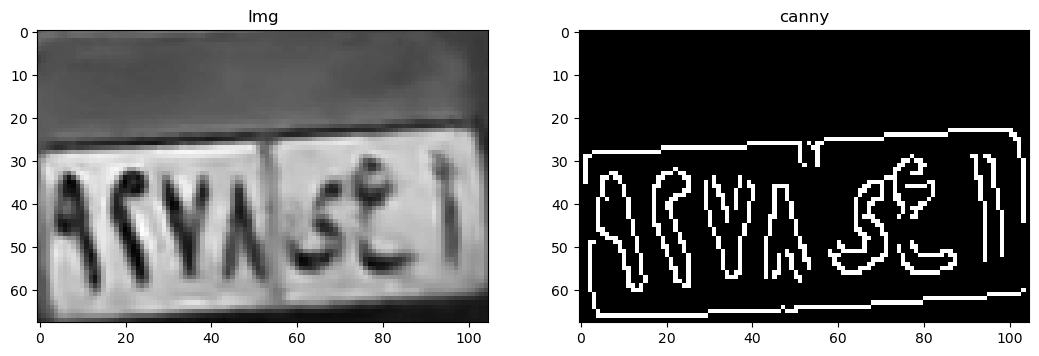

Tilt angle: -3.50 degrees


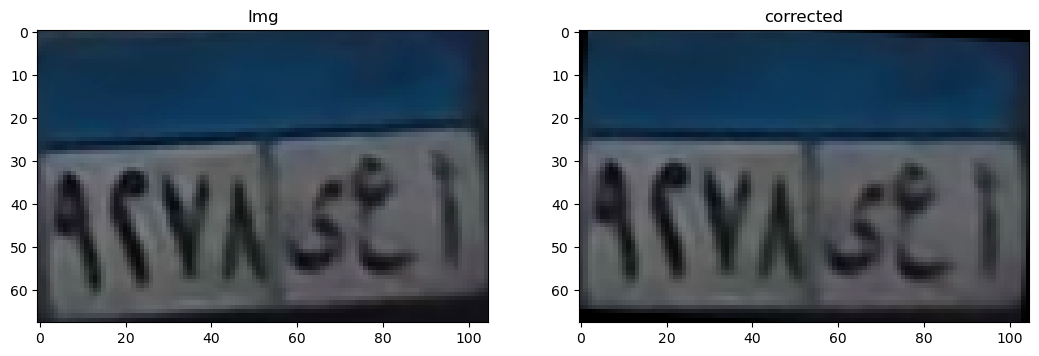

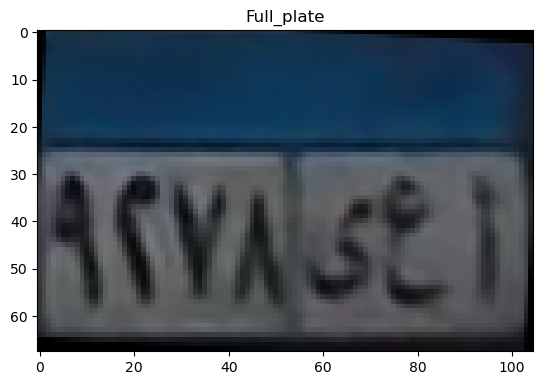

0.0 103.0 26.0 63.0
After
After
0.0 51.0 0.0 36.0
After
After
to horizonatal


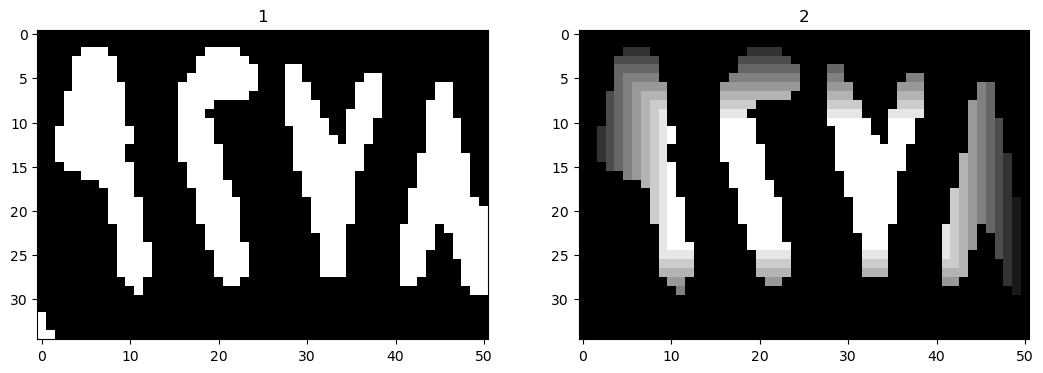

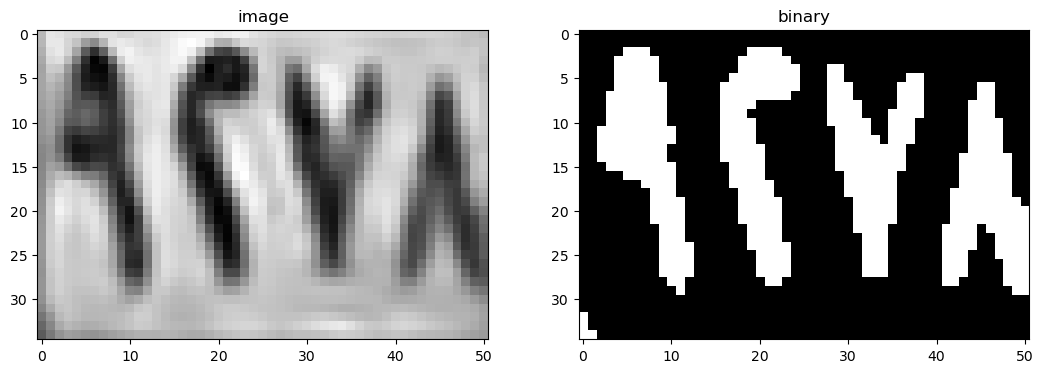

0 13
16 25
28 39
41 50


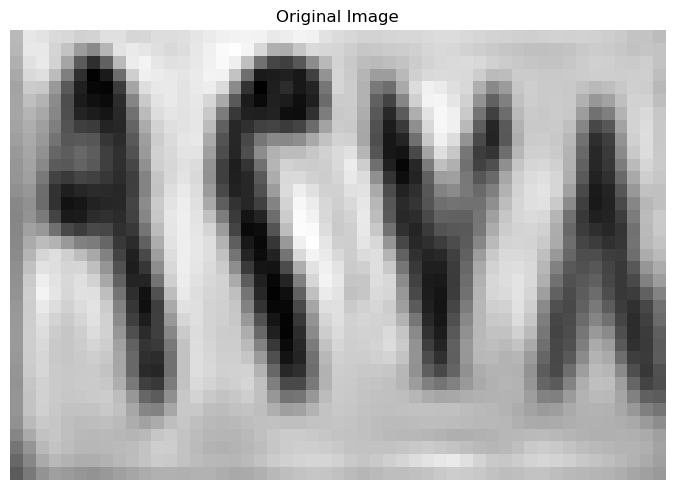

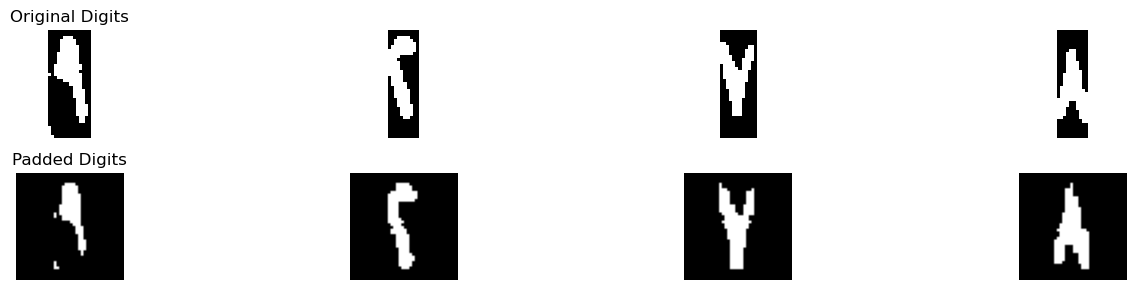

Best match: ٩
Full comparison results: {'١': 2.9270833333333335, '٢': 0.9663461538461537, '٣': 0.7254256965944272, '٤': 0.9372023809523808, '٥': 2.08234280554327, '٦': 2.0491071428571432, '٧': 0.1801470588235294, '٨': 2.5416666666666665, '٩': 3.3479763700351937}
Confidence :  0.2104465183509301
Best match: ٢
Full comparison results: {'١': 0.6079545454545455, '٢': 7.6217948717948705, '٣': 4.322948916408668, '٤': 3.3252289377289377, '٥': 2.487256744803184, '٦': 0.8017857142857142, '٧': 2.4345588235294118, '٨': 0.39375000000000004, '٩': 1.5599390397184516}
Confidence :  1.649422977693101
Best match: ٧
Full comparison results: {'١': 0.9086538461538463, '٢': 2.8365384615384617, '٣': 2.578657120743034, '٤': 2.2667582417582417, '٥': 1.1218809892378003, '٦': 1.1809523809523808, '٧': 4.210294117647059, '٨': 1.3847222222222222, '٩': 1.9887506284565108}
Confidence :  0.6868778280542989
Best match: ٨
Full comparison results: {'١': 4.040865384615384, '٢': 1.307692307692308, '٣': 0.9630417956656346,

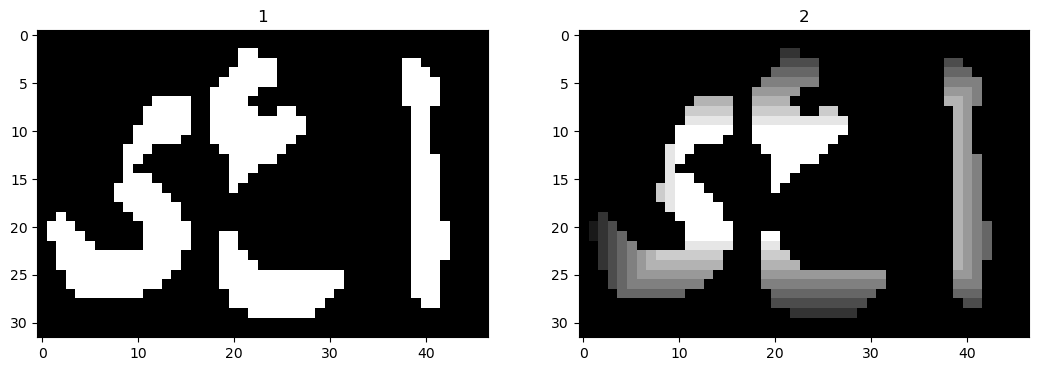

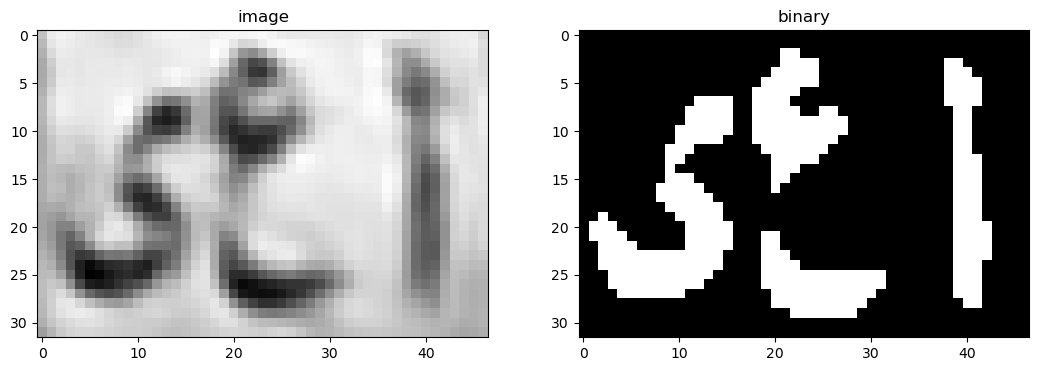

1 16
18 32
38 43


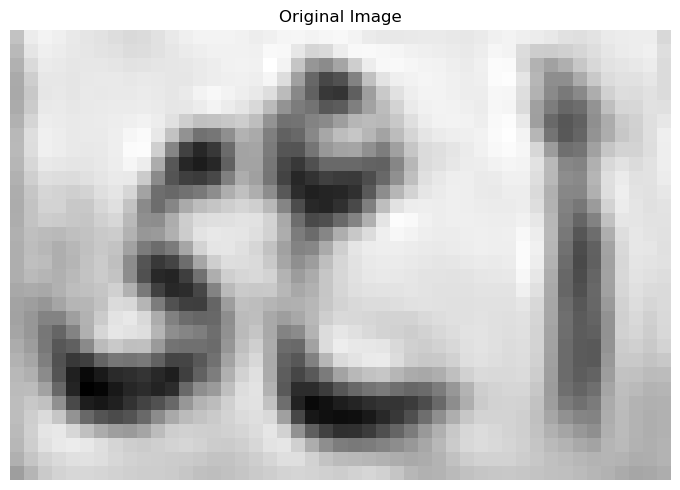

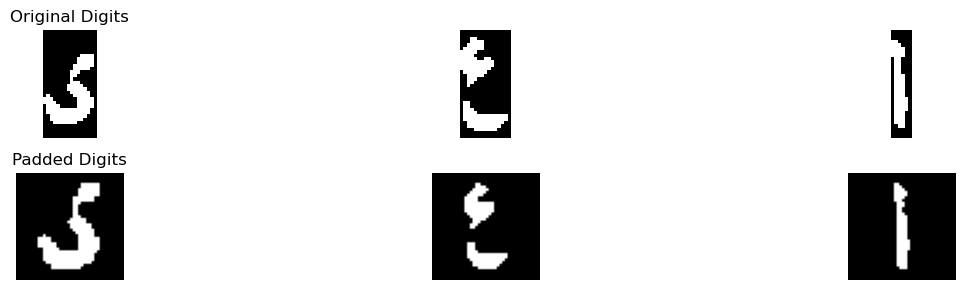

Best match: ي
Full comparison results: {'أ': 0.17391304347826086, 'ب': 0.3671253315649867, 'ج': 2.1040157004830915, 'د': 3.3479247181964573, 'ر': 2.6780078710644677, 'س': 1.4866071428571428, 'ص': 1.8306159420289854, 'ط': 2.1766304347826084, 'ع': 1.59375, 'ف': 3.8460504370830457, 'ق': 3.072161835748792, 'ك': 1.868659420289855, 'ل': 2.8546195652173916, 'م': 0.16168478260869565, 'ن': 2.934565217391304, 'ه': 1.5383064516129032, 'و': 3.342139694041868, 'ي': 4.122310479375697}
Confidence :  0.13813002114632567
Best match: ع
Full comparison results: {'أ': 0.40625, 'ب': 0.30846275063460826, 'ج': 2.299538474810214, 'د': 2.4079506624553066, 'ر': 1.0248050974512743, 'س': 0.26785714285714285, 'ص': 0.07886904761904762, 'ط': 1.761404808959157, 'ع': 4.822315701889131, 'ف': 1.4806780616415591, 'ق': 0.6747002474825055, 'ك': 1.934659090909091, 'ل': 1.1708813496158696, 'م': 1.8522727272727273, 'ن': 2.7457142857142856, 'ه': 0.8300403225806452, 'و': 1.0923611111111111, 'ي': 0.9795754366406539}
Confidence :

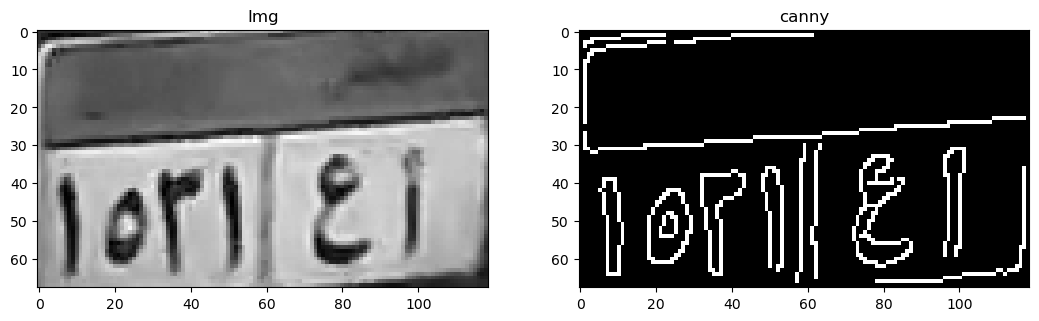

Tilt angle: -5.00 degrees


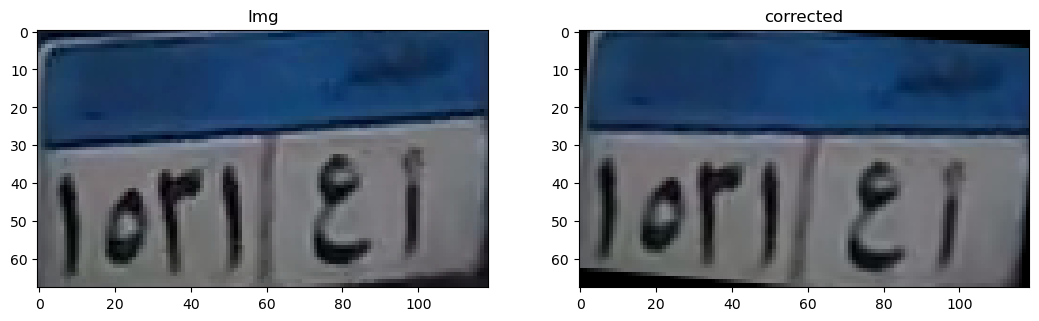

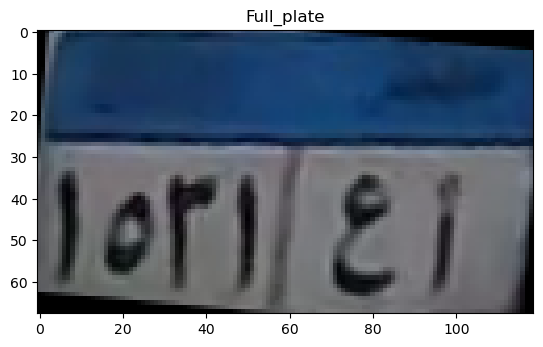

0.0 59.0 32.0 67.0
After
After
After
After
to horizonatal


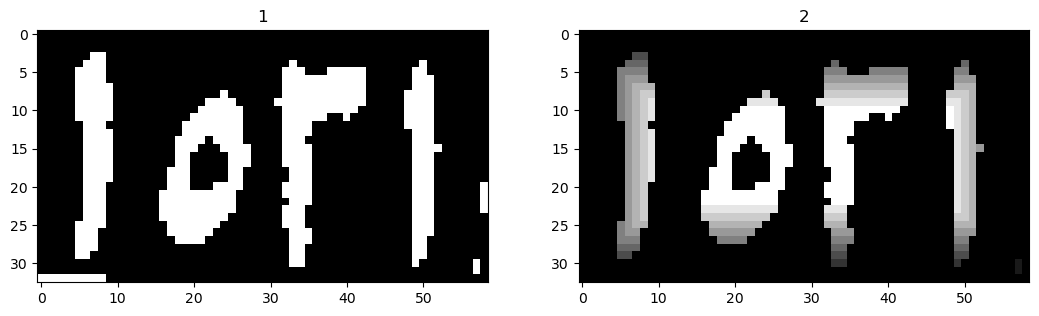

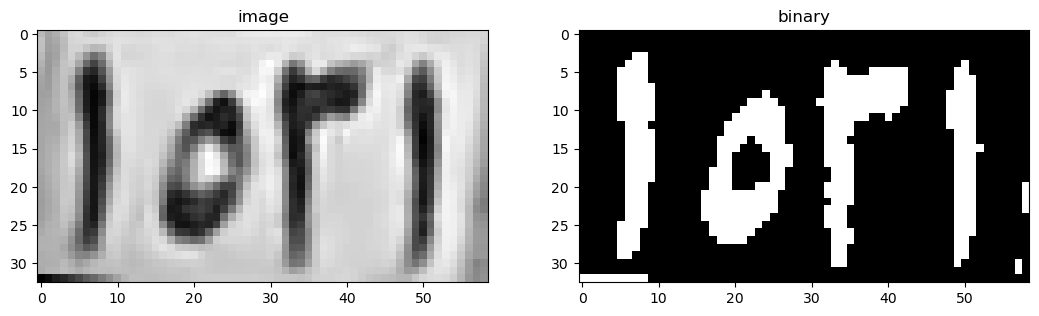

0 10
16 28
31 43
48 53
57 58


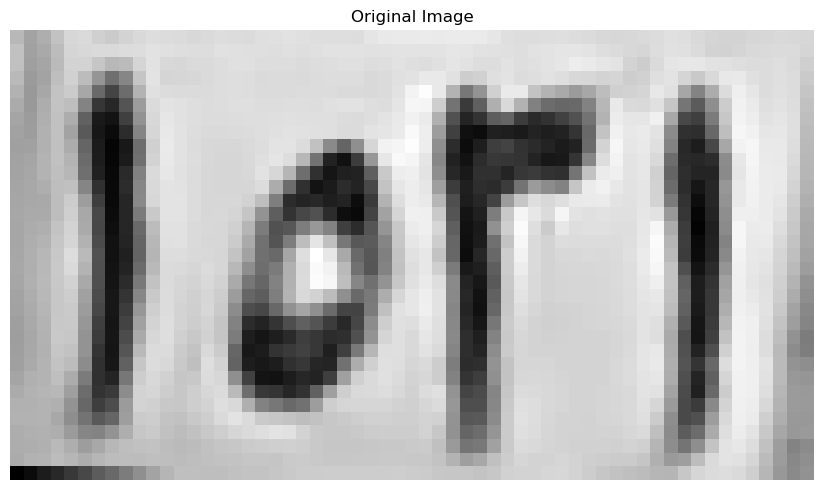

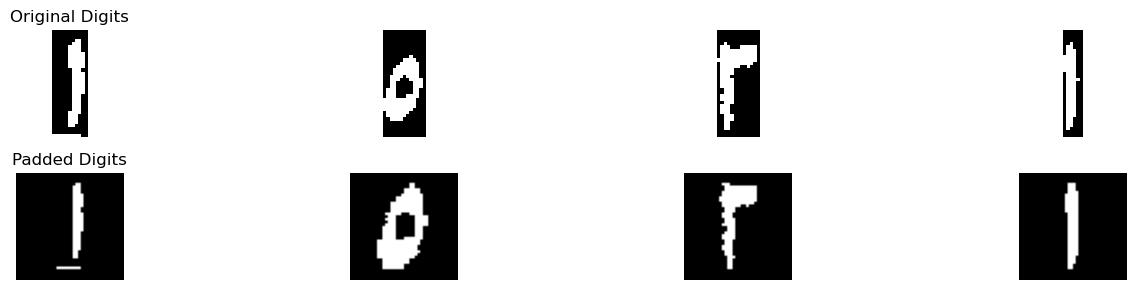

Best match: ١
Full comparison results: {'١': 2.125, '٢': 0.38374125874125875, '٣': 0.09375, '٤': 0.3125, '٥': 0.745236252395695, '٦': 1.7235119047619047, '٧': 0.3602941176470589, '٨': 0.5784722222222222, '٩': 1.1052350427350426}
Confidence :  0.20074404761904763
Best match: ٥
Full comparison results: {'١': 0.42105263157894735, '٢': 1.0411184210526316, '٣': 1.0707236842105263, '٤': 2.085526315789474, '٥': 6.03579260651629, '٦': 1.2822368421052632, '٧': 1.1019736842105263, '٨': 1.4710526315789472, '٩': 0.555921052631579}
Confidence :  1.9751331453634082
Best match: ٣
Full comparison results: {'١': 0.5714285714285714, '٢': 4.129464285714286, '٣': 4.816079721362229, '٤': 1.9050595238095238, '٥': 2.0387872254164825, '٦': 1.9982142857142857, '٧': 1.3106617647058825, '٨': 0.7041666666666667, '٩': 1.2939133986928104}
Confidence :  0.3433077178239716
Best match: ١
Full comparison results: {'١': 4.4375, '٢': 2.5439248251748254, '٣': 1.5115131578947367, '٤': 1.5818223443223443, '٥': 0.90932293970

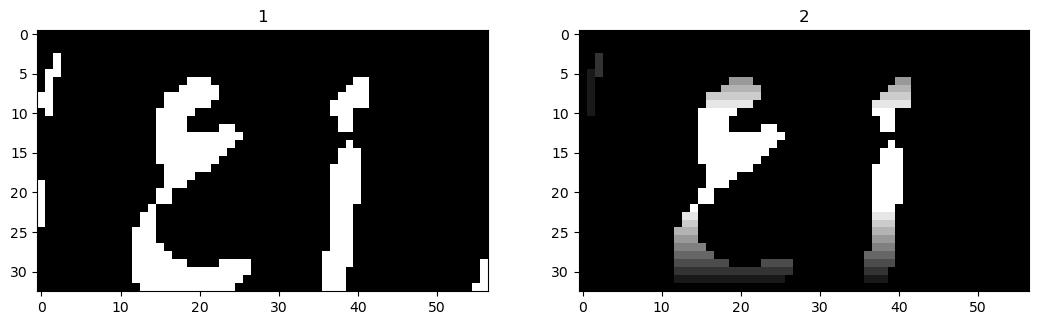

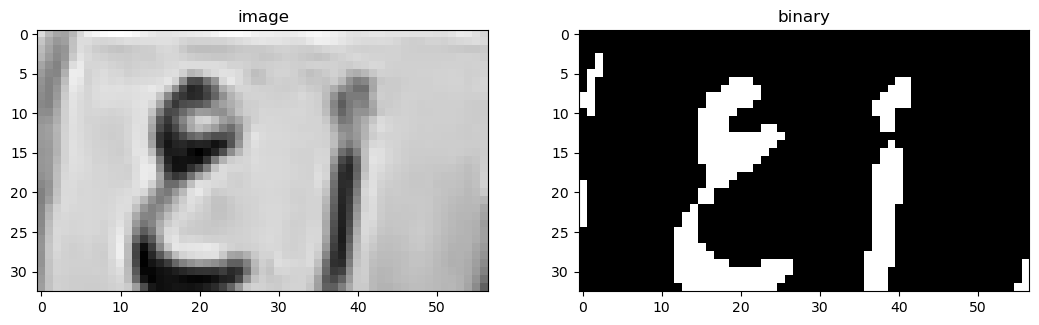

0 3
12 27
36 42
55 56


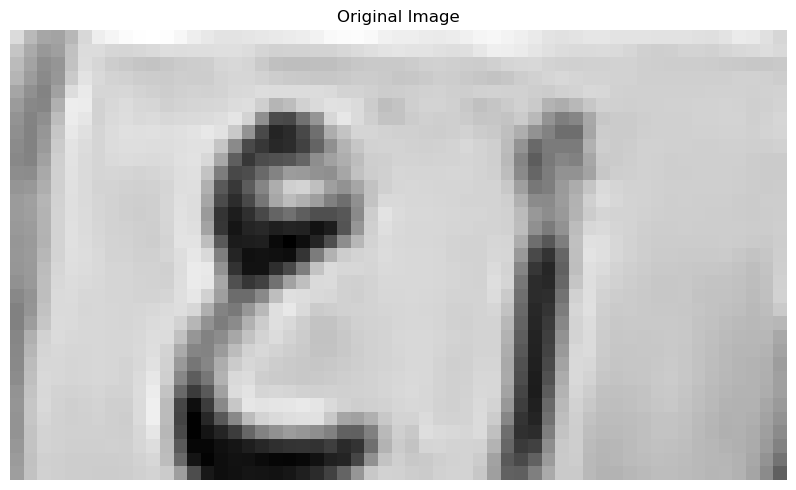

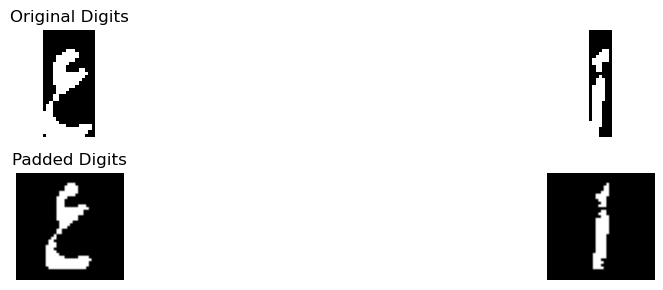

Best match: ع
Full comparison results: {'أ': 0.6029411764705883, 'ب': 0.10817307692307693, 'ج': 2.14152085955155, 'د': 3.0929495288280116, 'ر': 0.6015583279788677, 'س': 0.5357142857142857, 'ص': 0.6214285714285714, 'ط': 1.8798583662714097, 'ع': 3.454953560371517, 'ف': 1.9547392787524367, 'ق': 1.588441590086327, 'ك': 2.747159090909091, 'ل': 1.1774380804953561, 'م': 2.09341577540107, 'ن': 2.342377450980392, 'ه': 1.0508736559139784, 'و': 1.4243697478991597, 'ي': 1.1002438684503901}
Confidence :  0.18100201577175268
Best match: أ
Full comparison results: {'أ': 2.8253131277324828, 'ب': 0.35344827586206895, 'ج': 0.5834627329192545, 'د': 0.5474627336314644, 'ر': 0.29158813162543157, 'س': 0.2589285714285714, 'ص': 0.7633928571428571, 'ط': 0.652050395256917, 'ع': 0.1125, 'ف': 0.3551587301587301, 'ق': 0.5383180172653856, 'ك': 0.2471590909090909, 'ل': 0.28277863777089784, 'م': 0.07670454545454546, 'ن': 0.384047619047619, 'ه': 0.6998655913978494, 'و': 0.6694775132275131, 'ي': 0.6571123321123321}
Con

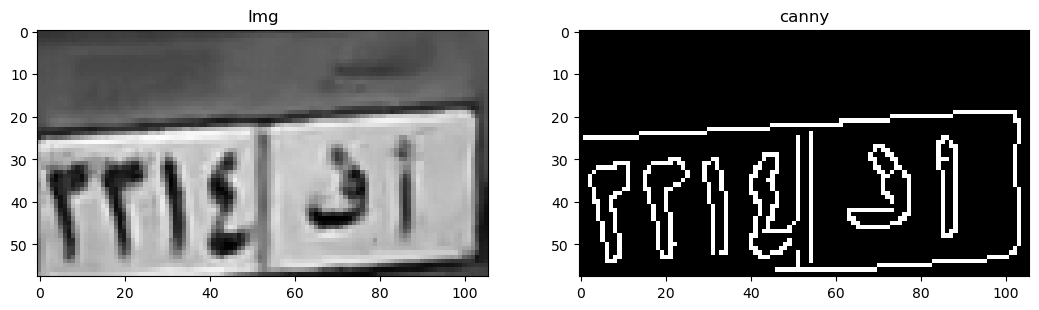

Tilt angle: -4.00 degrees


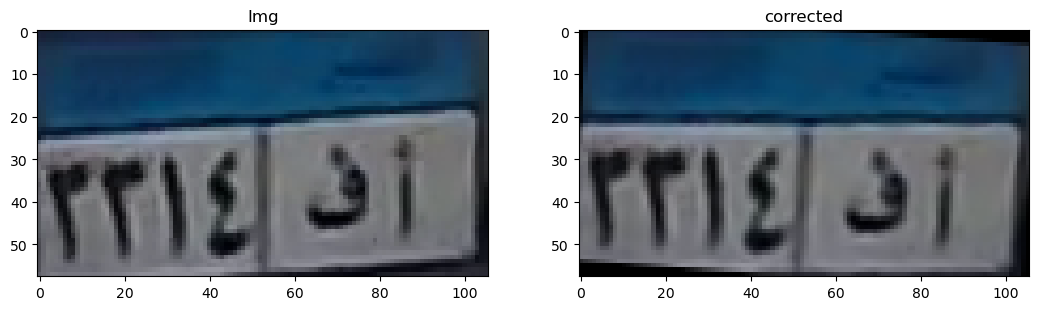

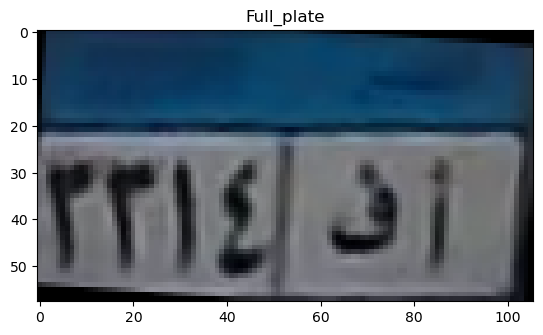

0.0 51.0 23.0 55.0
52.0 103.0 23.0 55.0
After
After
0.0 50.0 0.0 32.0
After
After
to horizonatal


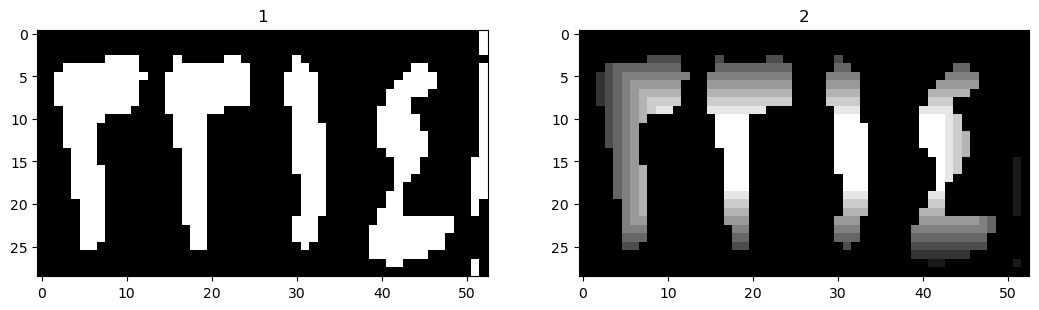

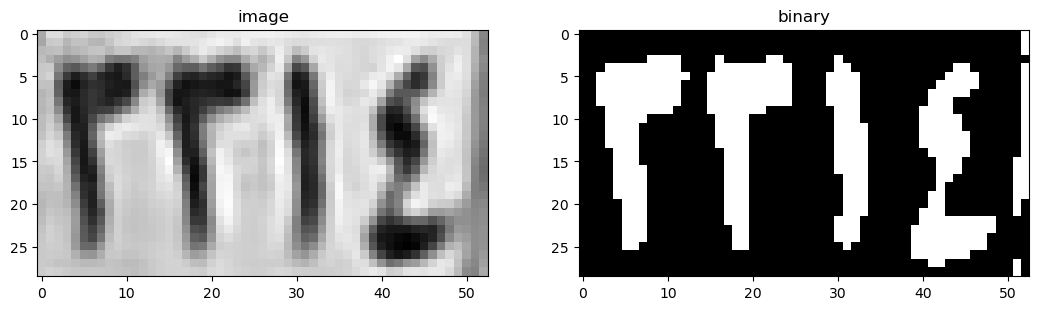

2 13
15 25
29 34
39 49
51 52


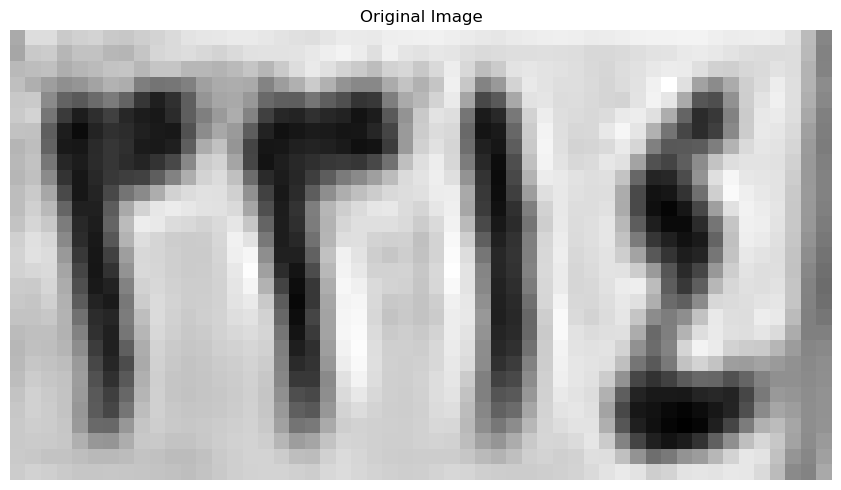

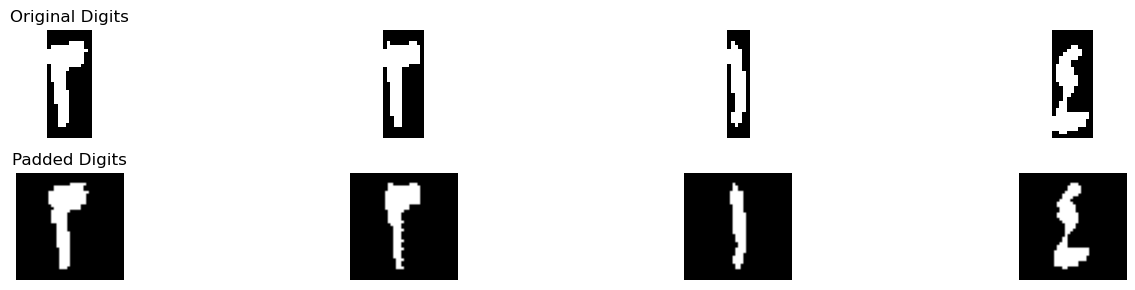

Best match: ٣
Full comparison results: {'١': 0.13333333333333333, '٢': 4.58125, '٣': 4.942724458204335, '٤': 2.7604166666666665, '٥': 2.930405056759546, '٦': 1.7125, '٧': 2.026102941176471, '٨': 0.6118055555555555, '٩': 1.2733660130718956}
Confidence :  0.1807372291021676
Best match: ٣
Full comparison results: {'١': 0.41586538461538464, '٢': 5.04326923076923, '٣': 5.768769349845201, '٤': 2.7536630036630036, '٥': 2.5248553368715907, '٦': 1.7223214285714286, '٧': 1.6033088235294117, '٨': 0.8166666666666667, '٩': 1.366154474610357}
Confidence :  0.36275005953798534
Best match: ١
Full comparison results: {'١': 5.516666666666667, '٢': 1.6673222610722611, '٣': 0.9802631578947368, '٤': 1.2291437728937729, '٥': 0.8944419873212442, '٦': 0.6833333333333332, '٧': 1.3128676470588236, '٨': 2.3388888888888886, '٩': 1.2478475364504777}
Confidence :  1.588888888888889
Best match: ٤
Full comparison results: {'١': 1.858173076923077, '٢': 2.0360576923076925, '٣': 1.750483746130031, '٤': 6.077724358974359

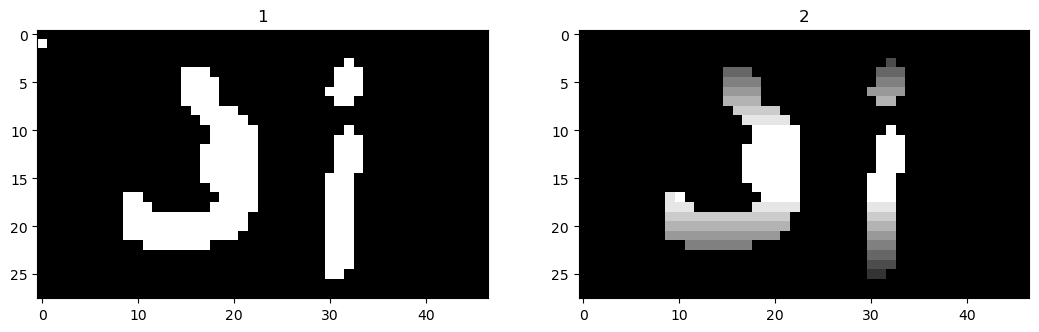

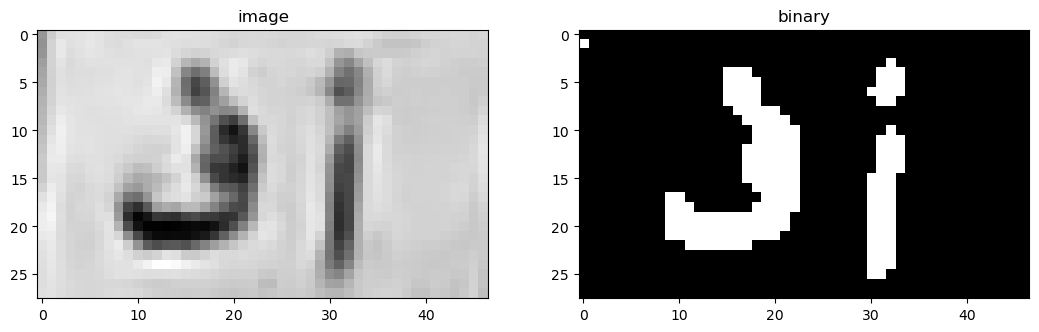

0 1
9 23
30 34


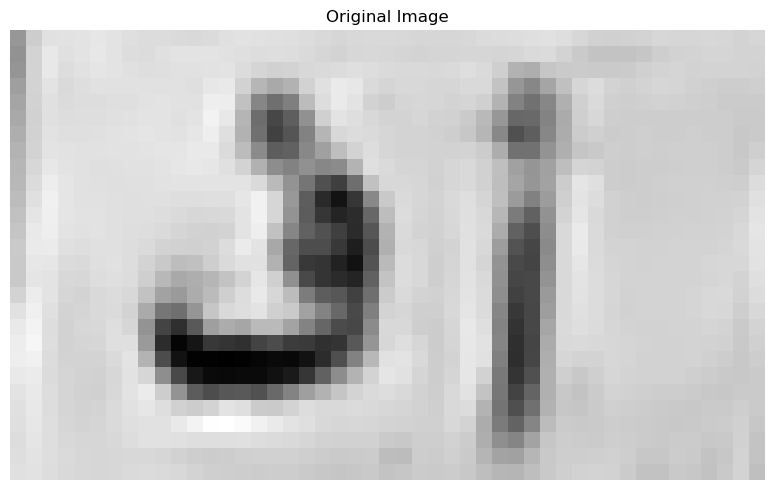

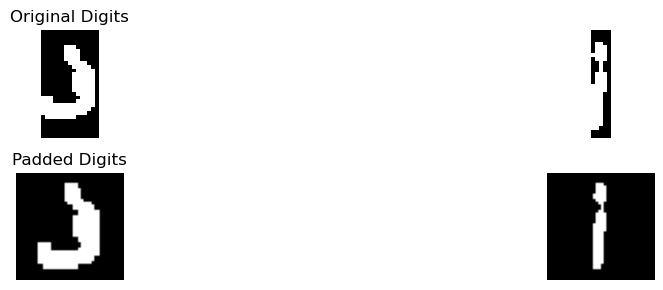

Best match: ف
Full comparison results: {'أ': 0.3736413043478261, 'ب': 0.13793103448275862, 'ج': 2.2974537037037037, 'د': 5.135931964573269, 'ر': 2.3566772863568217, 'س': 1.9866071428571428, 'ص': 1.6017210144927536, 'ط': 3.170289855072464, 'ع': 1.2581521739130435, 'ف': 5.41765873015873, 'ق': 3.4995471014492754, 'ك': 2.5321557971014492, 'ل': 2.082880434782609, 'م': 1.5081521739130435, 'ن': 3.52375, 'ه': 3.5131048387096775, 'و': 3.717240338164251, 'ي': 3.207323021181717}
Confidence :  0.1408633827927308
Best match: أ
Full comparison results: {'أ': 2.538209706959707, 'ب': 0.125, 'ج': 0.6454738900391074, 'د': 0.8585559021588433, 'ر': 0.0, 'س': 0.03125, 'ص': 0.4282738095238095, 'ط': 1.2267786561264822, 'ع': 0.09375, 'ف': 0.38988095238095233, 'ق': 0.11513157894736842, 'ك': 0.11837121212121211, 'ل': 0.0, 'م': 0.5661838161838162, 'ن': 0.46875, 'ه': 0.5123655913978494, 'و': 0.6011904761904762, 'ي': 0.3931242368742368}
Confidence :  0.6557155254166124
[['٣', '٣', '١', '٤'], ['ف', 'أ']]


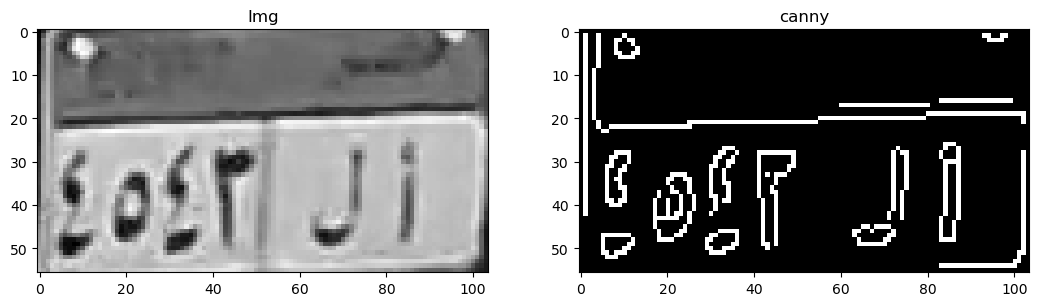

Tilt angle: -3.00 degrees


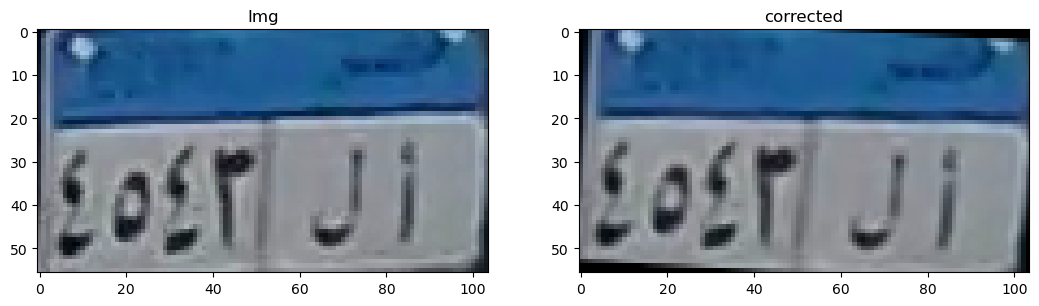

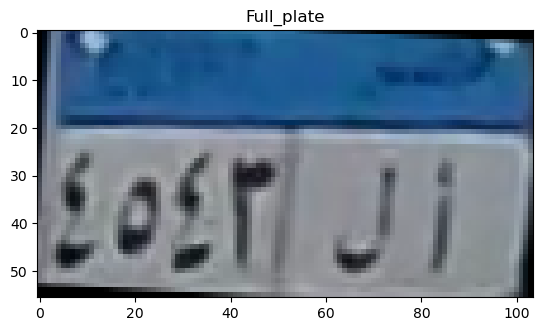

After
After
After
After
to horizonatal


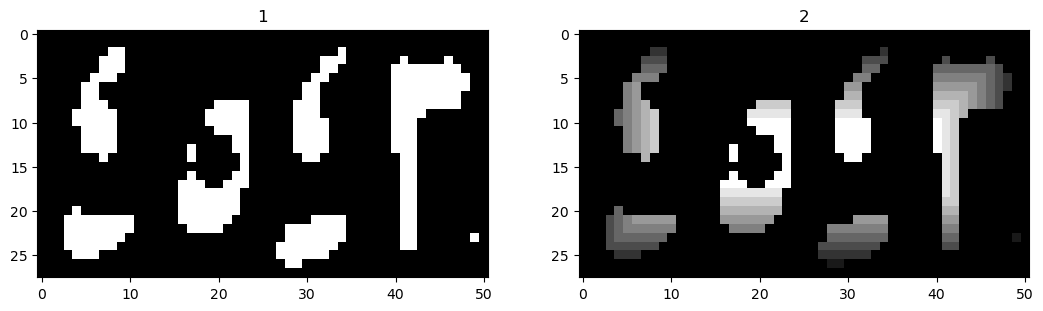

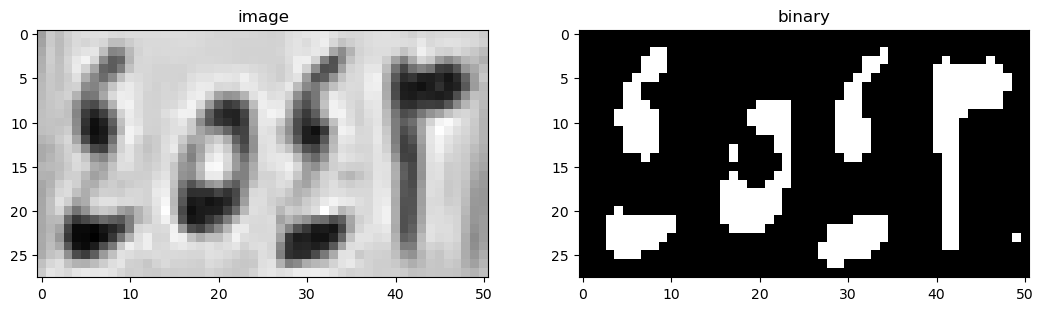

3 11
16 24
27 35
40 50


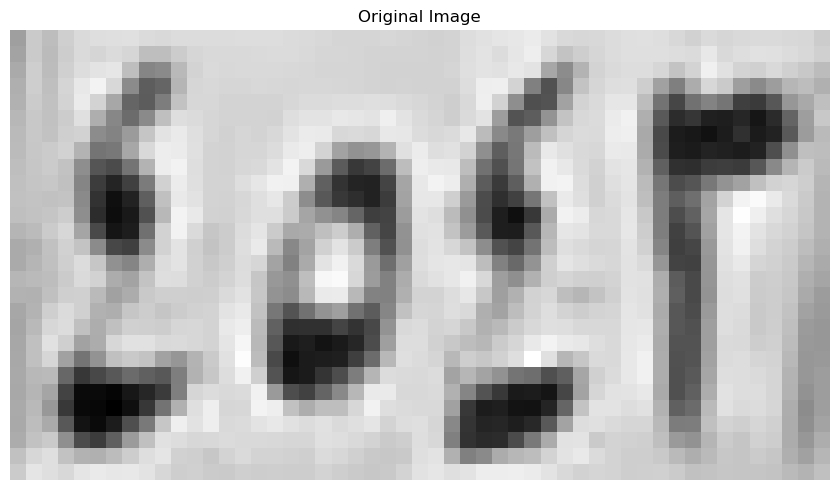

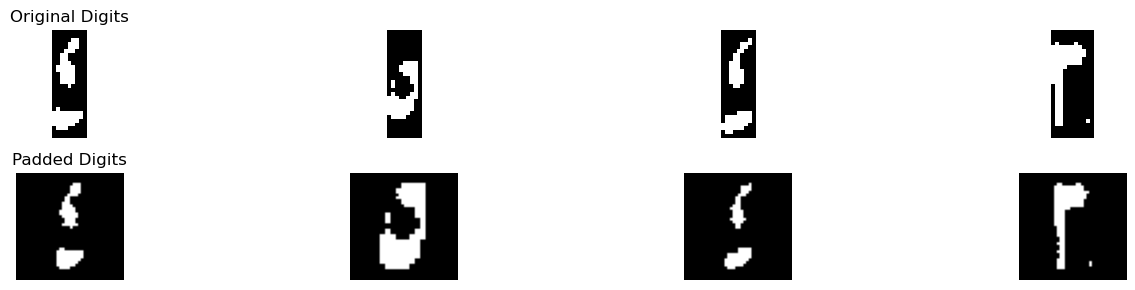

Best match: ٤
Full comparison results: {'١': 2.8000000000000003, '٢': 1.0675990675990676, '٣': 1.0666602167182662, '٤': 3.75439929693962, '٥': 2.144142525431225, '٦': 0.14285714285714285, '٧': 0.03125, '٨': 1.8388888888888888, '٩': 0.8921644650415997}
Confidence :  0.4771996484698098
Best match: ٥
Full comparison results: {'١': 0.47058823529411764, '٢': 1.8639705882352944, '٣': 0.9961300309597524, '٤': 2.255514705882353, '٥': 6.627271303258145, '٦': 1.7500000000000002, '٧': 1.2588235294117647, '٨': 1.218627450980392, '٩': 0.4303513071895425}
Confidence :  2.1858782986878964
Best match: ١
Full comparison results: {'١': 2.5687499999999996, '٢': 0.917759324009324, '٣': 0.4375, '٤': 2.1587934243176177, '٥': 1.1622991301783872, '٦': 0.26785714285714285, '٧': 0.03125, '٨': 1.3270833333333334, '٩': 1.0148655305794774}
Confidence :  0.204978287841191
Best match: ٣
Full comparison results: {'١': 0.9285714285714286, '٢': 2.821428571428571, '٣': 3.130611455108359, '٤': 1.324702380952381, '٥': 2.4

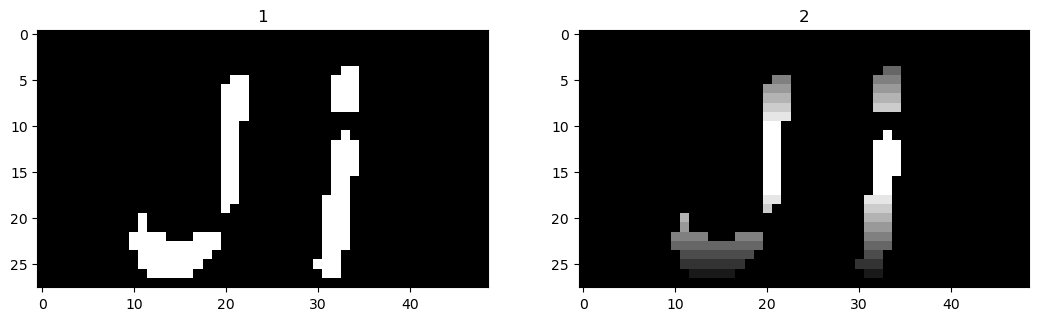

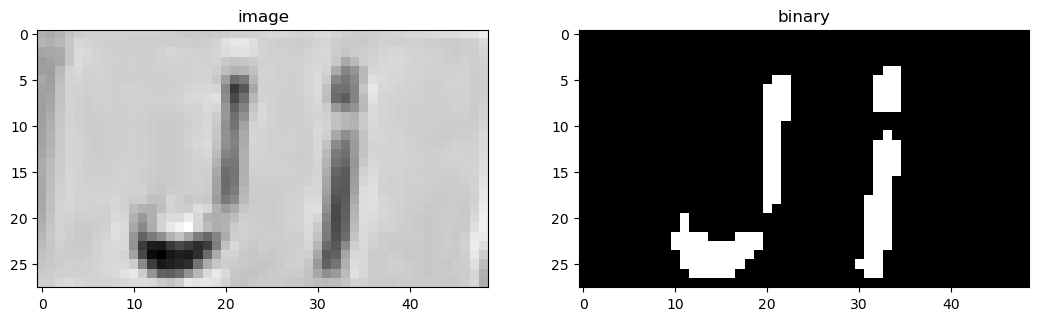

10 23
30 35


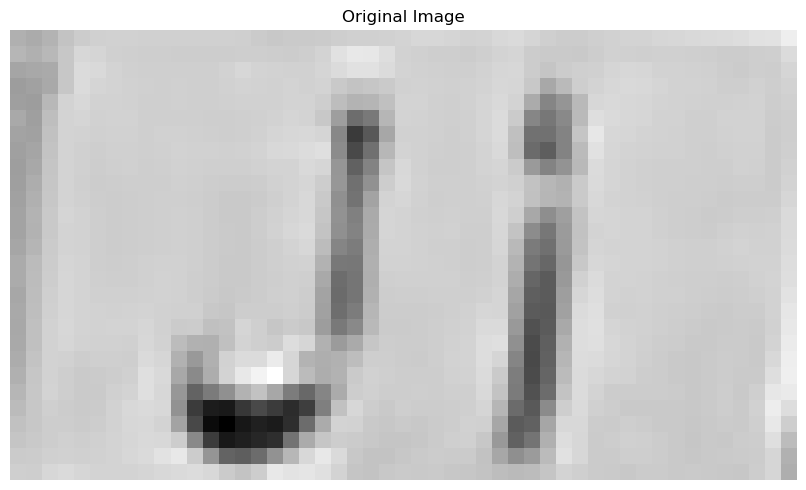

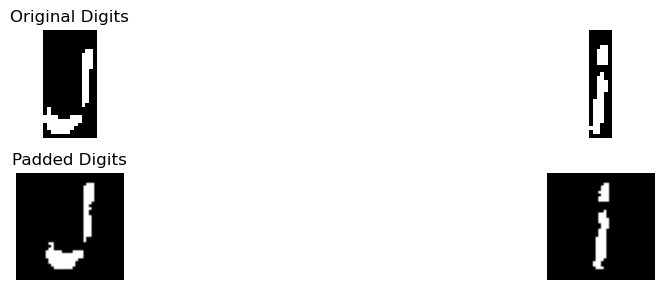

Best match: ل
Full comparison results: {'أ': 0.0, 'ب': 0.13469827586206895, 'ج': 0.4664351851851852, 'د': 2.6790736310473156, 'ر': 3.2976869600913825, 'س': 1.2053571428571428, 'ص': 1.4181547619047619, 'ط': 1.2888669301712778, 'ع': 1.2937134502923977, 'ف': 1.6151054720133668, 'ق': 2.568302701197438, 'ك': 0.9422348484848485, 'ل': 5.6340643274853806, 'م': 0.14646464646464646, 'ن': 3.6444841269841266, 'ه': 0.7936155913978494, 'و': 2.466435185185185, 'ي': 2.622679765886288}
Confidence :  0.994790100250627
Best match: أ
Full comparison results: {'أ': 3.3676684156592382, 'ب': 0.35344827586206895, 'ج': 0.6663072233724407, 'د': 0.6237623656586505, 'ر': 0.2090583279788677, 'س': 0.1607142857142857, 'ص': 0.5348214285714286, 'ط': 0.43148880105401843, 'ع': 0.09375, 'ف': 0.3794642857142857, 'ق': 0.3330377916116456, 'ك': 0.17045454545454544, 'ل': 0.058823529411764705, 'م': 0.2875561938061938, 'ن': 0.09576612903225806, 'ه': 0.40934139784946233, 'و': 0.48822751322751323, 'ي': 0.40215201465201467}
Confid

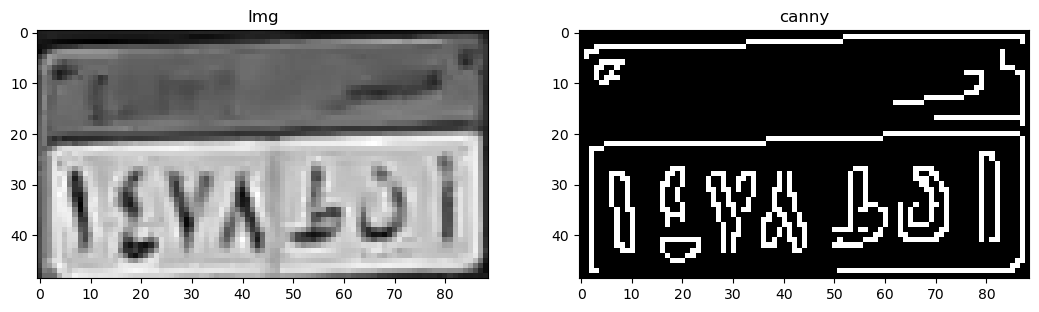

Tilt angle: -1.50 degrees


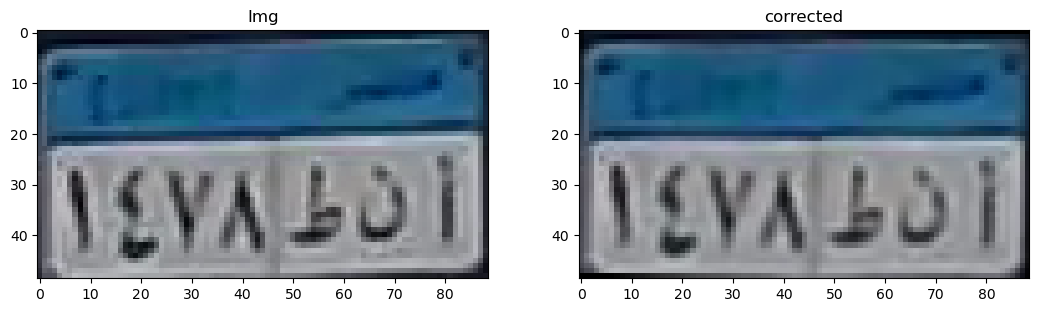

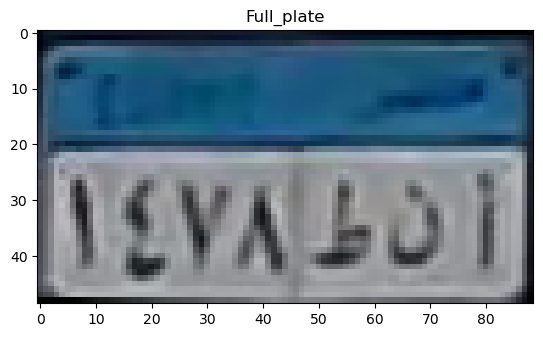

After
After
0.0 43.0 3.0 29.0
After
After
to horizonatal


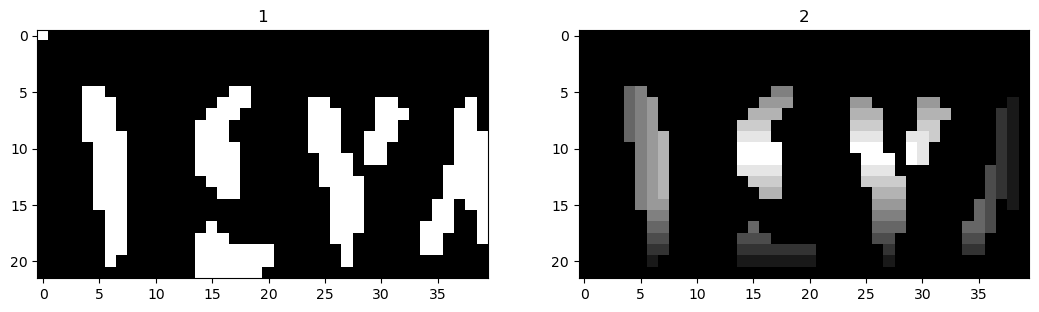

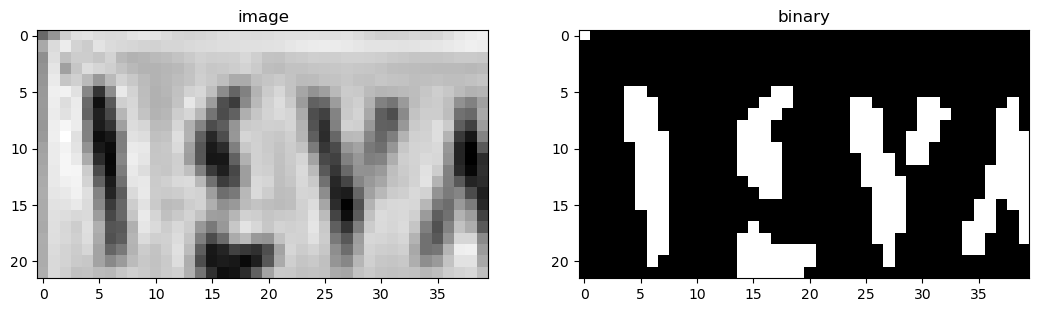

0 1
4 8
14 21
24 33
34 39


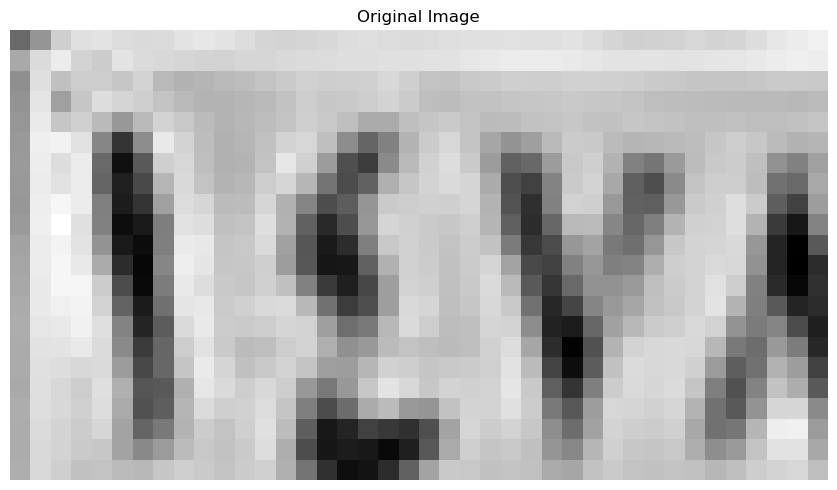

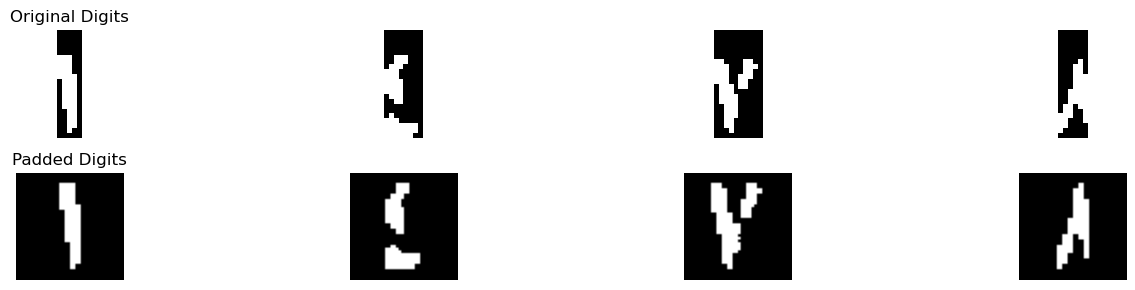

Best match: ١
Full comparison results: {'١': 6.58125, '٢': 2.934513403263404, '٣': 1.0328947368421053, '٤': 1.6845009157509159, '٥': 1.7606746646026832, '٦': 1.5639880952380951, '٧': 1.318014705882353, '٨': 2.4131944444444446, '٩': 2.730659250879839}
Confidence :  1.823368298368298
Best match: ٤
Full comparison results: {'١': 0.8653846153846154, '٢': 3.4302884615384617, '٣': 1.9494969040247678, '٤': 6.165397170034266, '٥': 3.4276730429013718, '٦': 0.0, '٧': 0.7628676470588236, '٨': 0.6923611111111111, '٩': 1.5889894419306183}
Confidence :  1.3675543542479023
Best match: ٧
Full comparison results: {'١': 0.0, '٢': 1.1875, '٣': 1.9046052631578947, '٤': 1.0822368421052633, '٥': 1.063674812030075, '٦': 0.41578947368421054, '٧': 3.5243421052631576, '٨': 0.6302631578947369, '٩': 0.7861842105263157}
Confidence :  0.8098684210526315
Best match: ٦
Full comparison results: {'١': 1.1770833333333333, '٢': 0.8076923076923076, '٣': 0.5489551083591331, '٤': 0.6830357142857143, '٥': 1.5507841294412499,

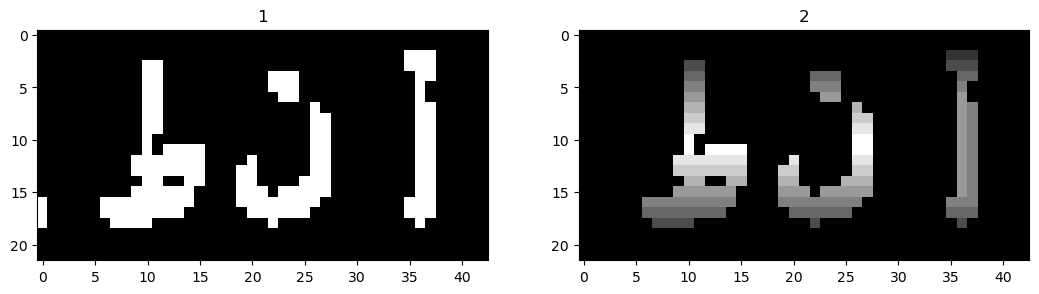

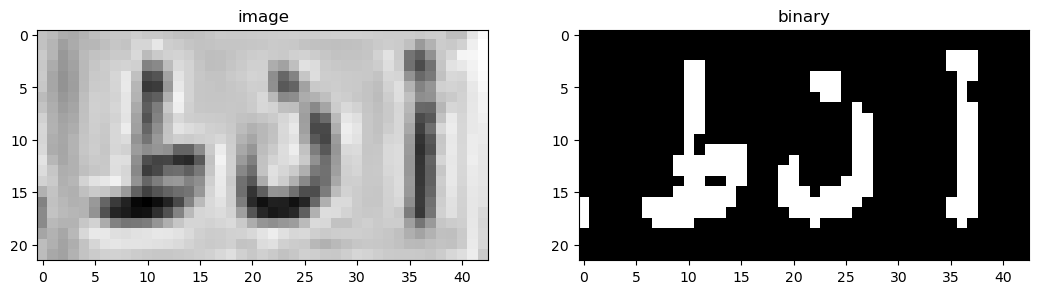

0 1
6 16
19 28
35 38


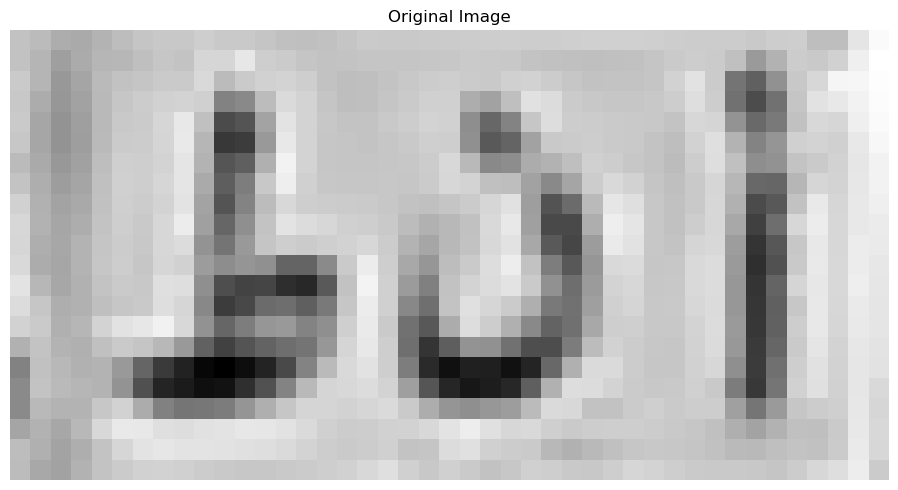

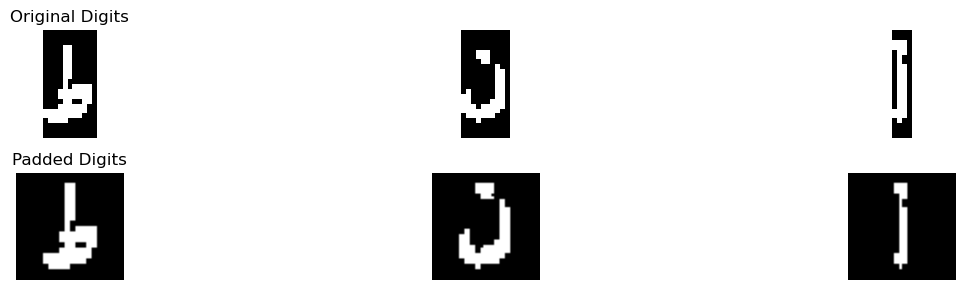

Best match: ط
Full comparison results: {'أ': 1.1375, 'ب': 0.3718501326259947, 'ج': 1.2538589832068094, 'د': 3.0833164983164982, 'ر': 2.477154547726137, 'س': 1.3125, 'ص': 1.193154761904762, 'ط': 5.851202239789195, 'ع': 0.6375, 'ف': 3.335813492063492, 'ق': 2.4175925925925927, 'ك': 1.7424242424242424, 'ل': 1.95625, 'م': 0.38636363636363635, 'ن': 2.389702380952381, 'ه': 1.2746639784946237, 'و': 2.2197089947089945, 'ي': 3.0478121516164998}
Confidence :  1.2576943738628517
Best match: د
Full comparison results: {'أ': 0.31414473684210525, 'ب': 0.125, 'ج': 2.1109230655140268, 'د': 4.577987550948078, 'ر': 2.0849210451165394, 'س': 1.21875, 'ص': 0.6648809523809524, 'ط': 2.0150279973649536, 'ع': 1.4101973684210527, 'ف': 3.387835909217488, 'ق': 2.6982229880256194, 'ك': 0.29166666666666663, 'ل': 2.2611842105263156, 'م': 1.222488038277512, 'ن': 4.190256892230576, 'ه': 1.5830645161290322, 'و': 1.7712075327206906, 'ي': 1.7406108813002403}
Confidence :  0.19386532935875067
Best match: أ
Full comparison 

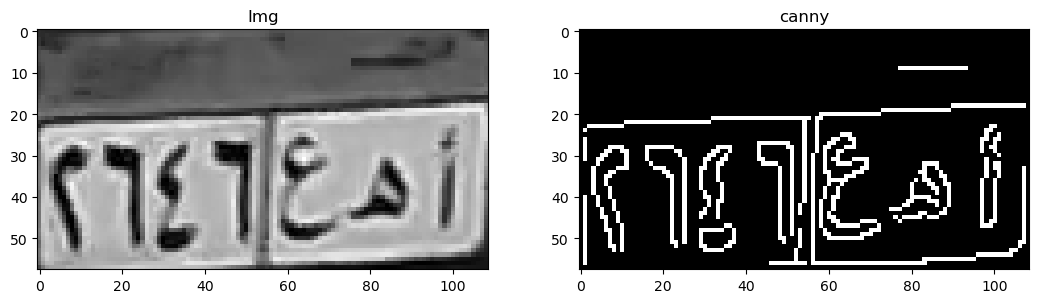

Tilt angle: -2.00 degrees


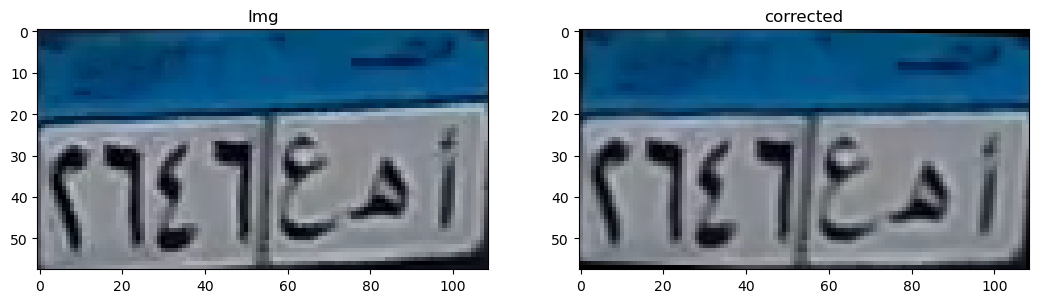

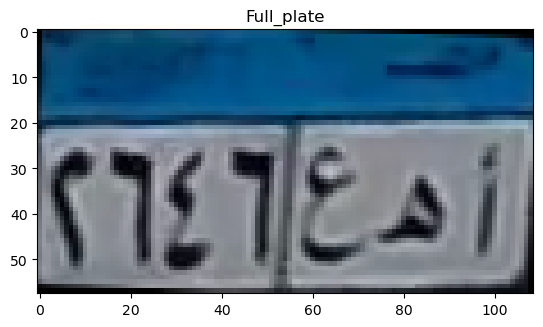

55.0 108.0 21.0 55.0
0.0 54.0 22.0 55.0
After
After
1.0 54.0 0.0 32.0
After
After
to horizonatal


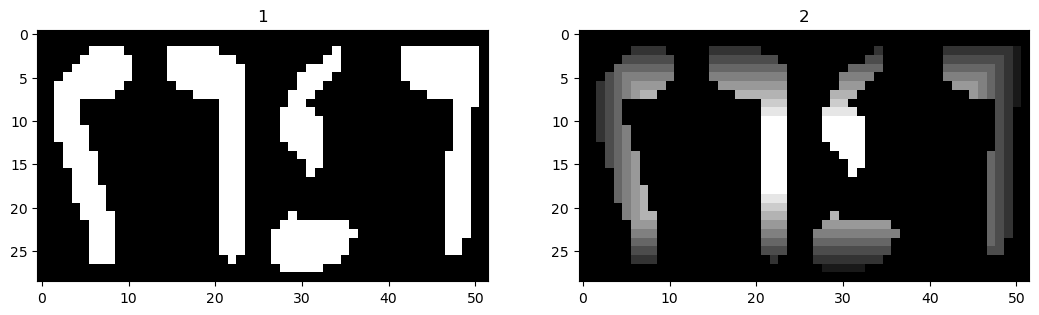

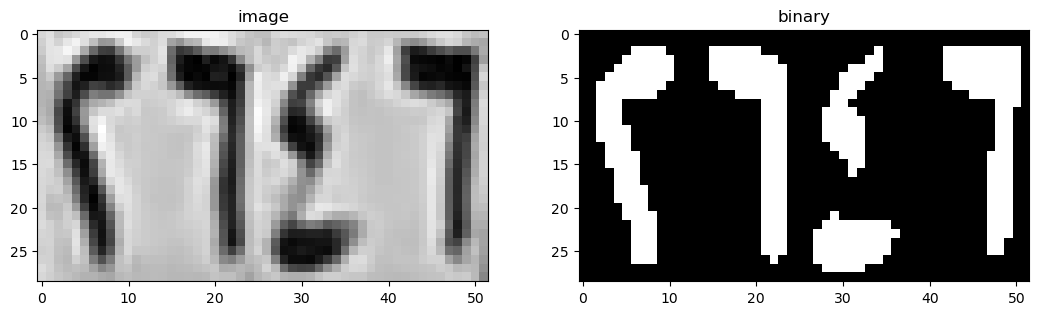

2 11
15 24
27 37
42 51


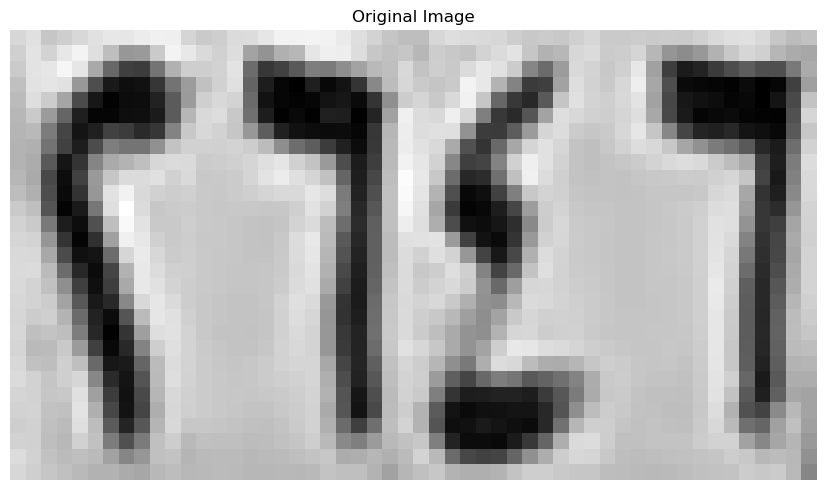

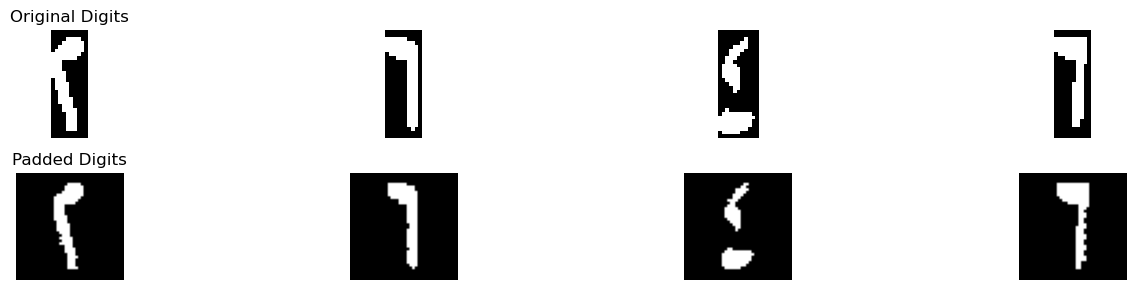

Best match: ٢
Full comparison results: {'١': 0.2471590909090909, '٢': 7.7183857808857805, '٣': 4.569272445820433, '٤': 3.2183836996336996, '٥': 2.2703864440513044, '٦': 0.6267857142857143, '٧': 2.197058823529412, '٨': 0.5986111111111111, '٩': 1.5782428355957767}
Confidence :  1.5745566675326739
Best match: ٦
Full comparison results: {'١': 3.2755681818181817, '٢': 1.4606643356643356, '٣': 0.6353521671826625, '٤': 0.13392857142857142, '٥': 1.8200372254164825, '٦': 5.474702380952381, '٧': 0.2977941176470588, '٨': 0.9076388888888889, '٩': 2.2793489190548013}
Confidence :  1.0995670995670999
Best match: ٤
Full comparison results: {'١': 1.489583333333333, '٢': 0.9679487179487178, '٣': 1.5390866873065017, '٤': 5.223014149828666, '٥': 2.7280241043785938, '٦': 0.0, '٧': 0.19375, '٨': 1.4840277777777777, '٩': 0.8832642031171443}
Confidence :  1.247495022725036
Best match: ٦
Full comparison results: {'١': 3.052083333333333, '٢': 1.7347756410256407, '٣': 1.2468072755417956, '٤': 0.0625, '٥': 1.945

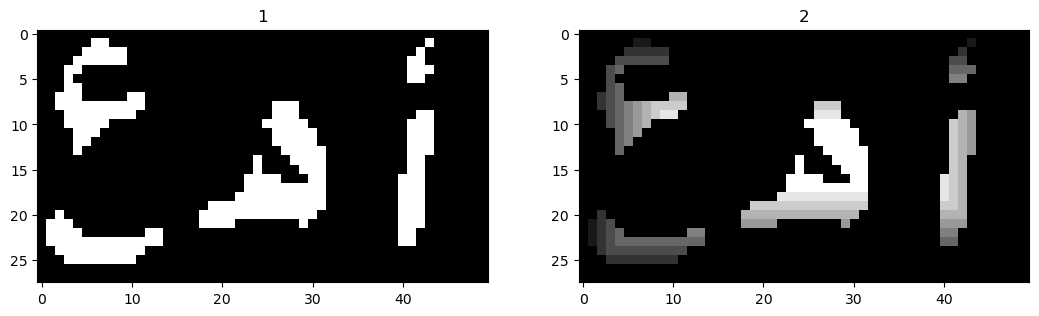

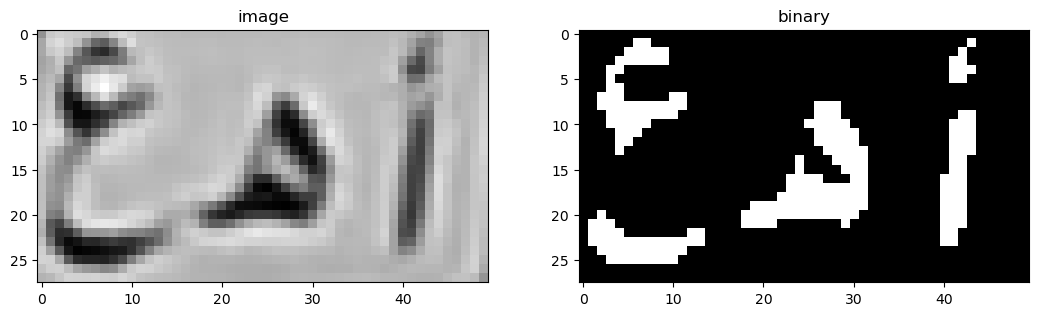

1 14
18 32
40 44


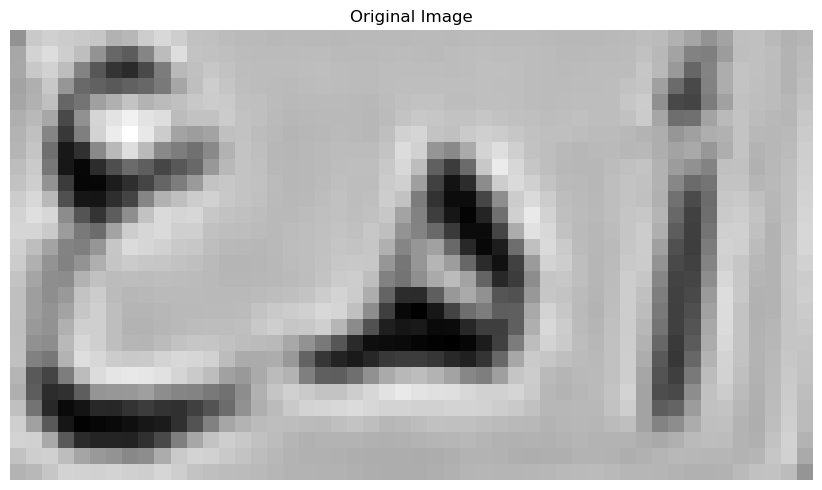

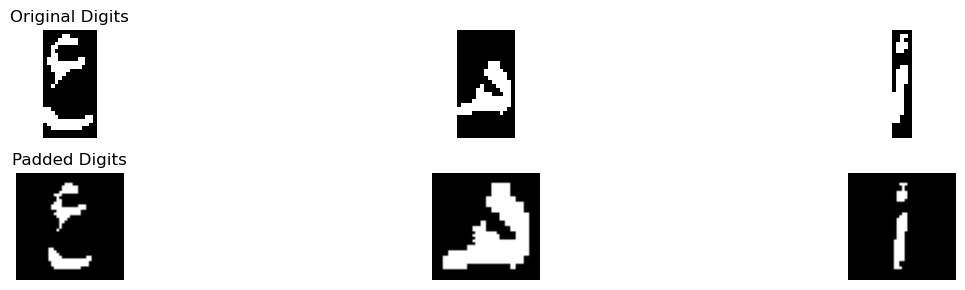

Best match: ع
Full comparison results: {'أ': 0.3125, 'ب': 0.0, 'ج': 2.191417931907062, 'د': 2.362824745630473, 'ر': 0.4667741935483871, 'س': 0.34375, 'ص': 0.5261232718894009, 'ط': 1.2335721343873518, 'ع': 4.390526726727403, 'ف': 1.4393740848537113, 'ق': 1.3768876675183388, 'ك': 1.8049242424242424, 'ل': 1.1851854608240058, 'م': 2.5710227272727275, 'ن': 2.559702380952381, 'ه': 0.5113575268817204, 'و': 1.231215901265957, 'ي': 0.7481744704570792}
Confidence :  0.9097519997273378
Best match: ه
Full comparison results: {'أ': 0.4375, 'ب': 0.25, 'ج': 0.65625, 'د': 2.65625, 'ر': 1.3125, 'س': 2.1875, 'ص': 1.28125, 'ط': 1.21875, 'ع': 0.1875, 'ف': 2.375, 'ق': 0.6875, 'ك': 1.125, 'ل': 0.75, 'م': 0.25, 'ن': 0.71875, 'ه': 5.8125, 'و': 1.53125, 'ي': 1.25}
Confidence :  1.578125
Best match: أ
Full comparison results: {'أ': 3.000874241627857, 'ب': 0.2252155172413793, 'ج': 0.33579192546583847, 'د': 0.6354088615775922, 'ر': 0.18460180623973726, 'س': 0.1919642857142857, 'ص': 0.6654761904761904, 'ط': 1.1479

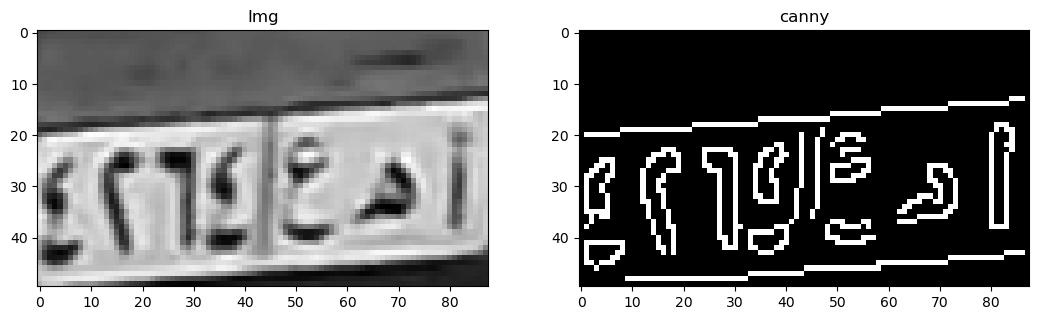

Tilt angle: -4.00 degrees


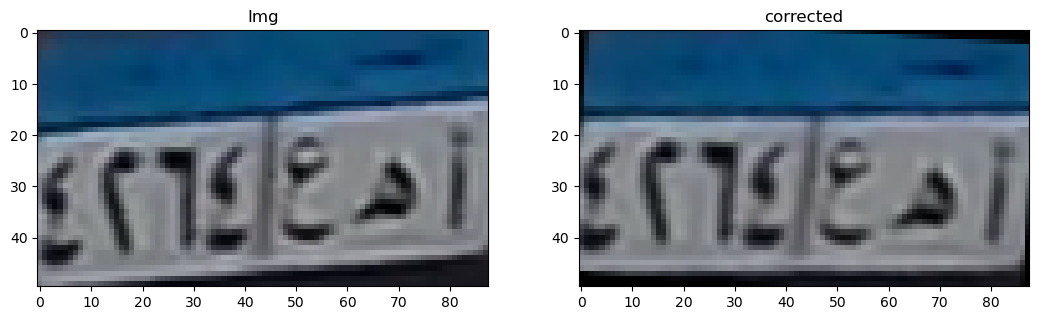

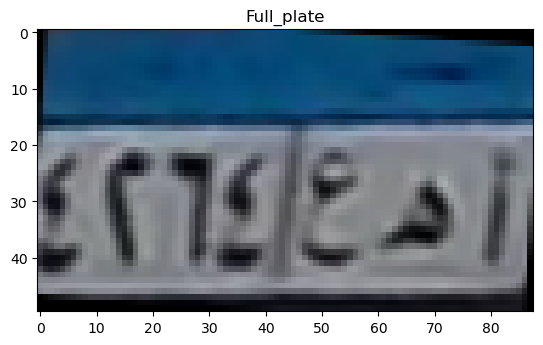

After
After
After
After
to horizonatal


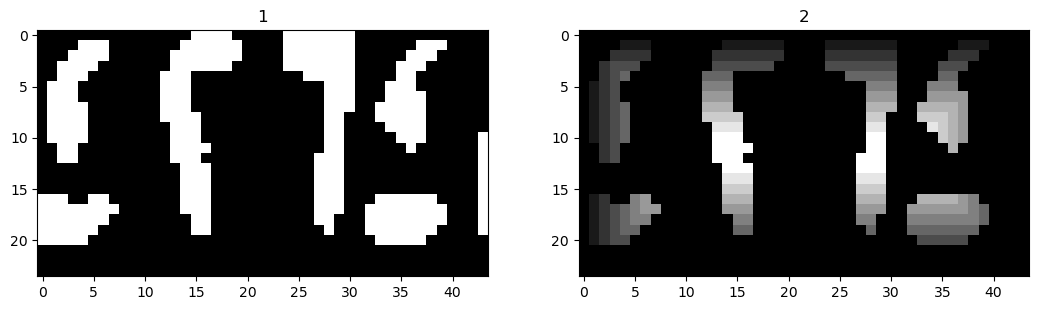

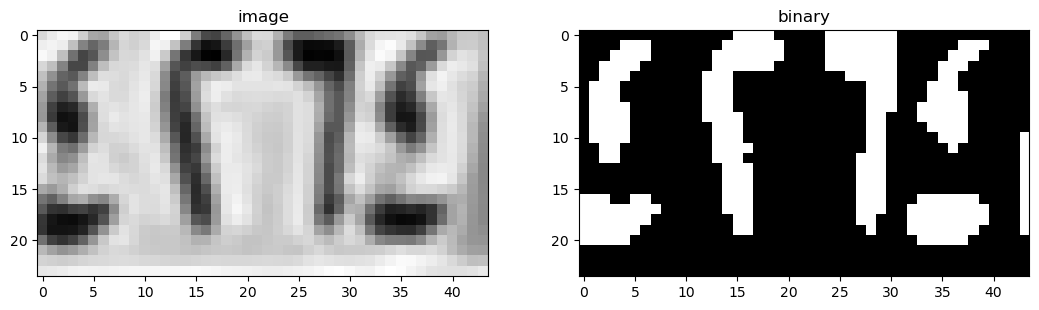

0 8
12 20
24 31
32 40


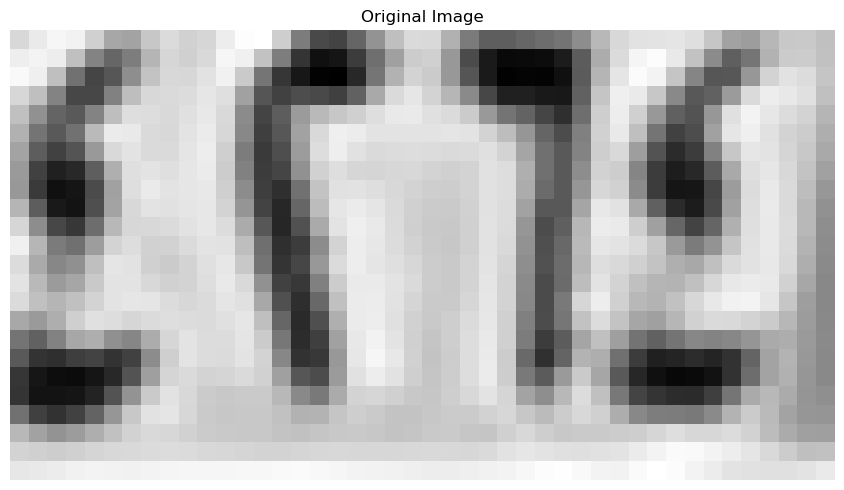

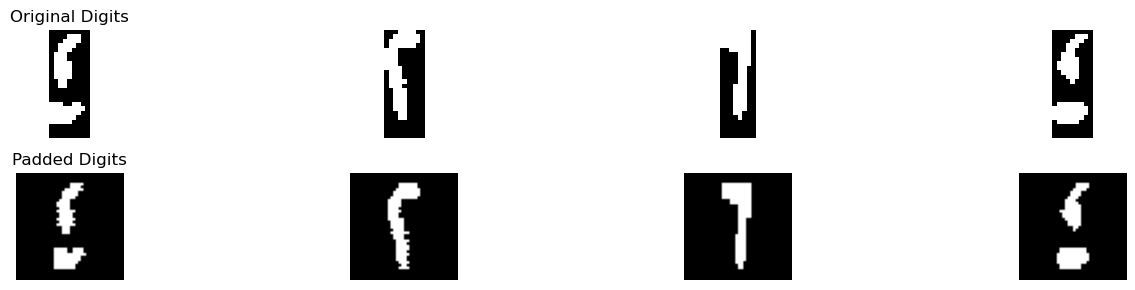

Best match: ٤
Full comparison results: {'١': 1.7708333333333333, '٢': 2.323717948717949, '٣': 1.9630417956656347, '٤': 5.098497134585844, '٥': 3.2286598850066337, '٦': 0.14285714285714285, '٧': 0.49522058823529413, '٨': 1.5166666666666666, '٩': 1.2021744595274009}
Confidence :  0.9349186247896051
Best match: ٢
Full comparison results: {'١': 0.0, '٢': 6.753205128205128, '٣': 4.461977554179566, '٤': 3.4203067765567763, '٥': 2.1403739127229837, '٦': 0.6705357142857142, '٧': 2.147058823529412, '٨': 0.4805555555555555, '٩': 0.9768885118149824}
Confidence :  1.1456137870127807
Best match: ٢
Full comparison results: {'١': 3.0823863636363638, '٢': 3.340763403263403, '٣': 1.9655572755417956, '٤': 0.5543040293040293, '٥': 2.2746986952675807, '٦': 2.879166666666667, '٧': 1.6919117647058826, '٨': 0.4673611111111111, '٩': 1.8131284565108097}
Confidence :  0.12918851981351964
Best match: ٤
Full comparison results: {'١': 3.145833333333333, '٢': 1.044871794871795, '٣': 0.9552051083591331, '٤': 3.64963

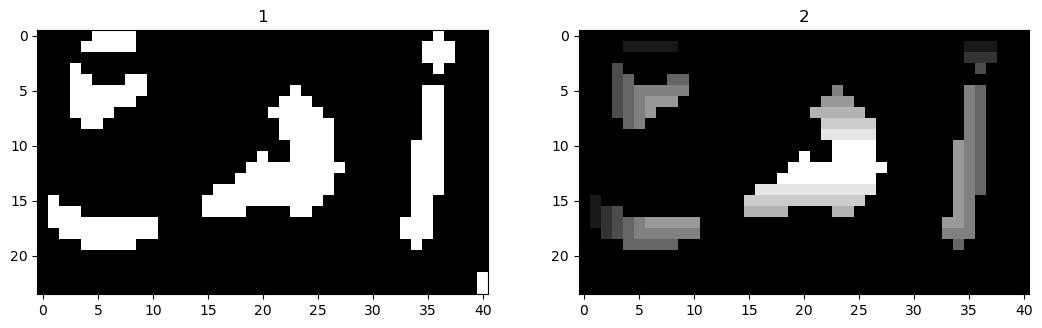

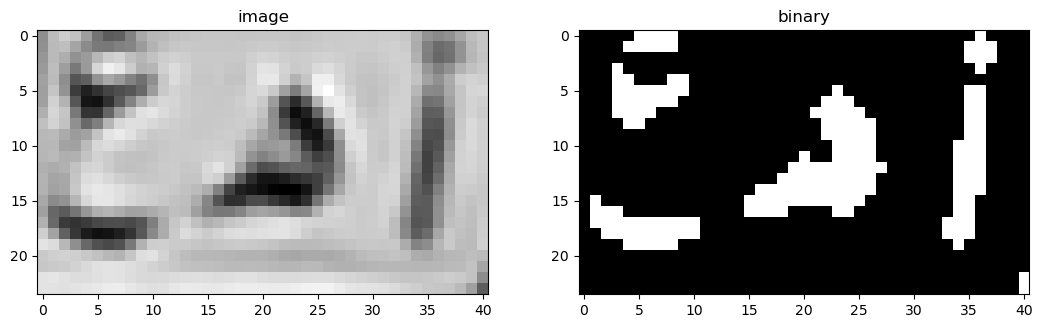

1 11
15 28
33 38


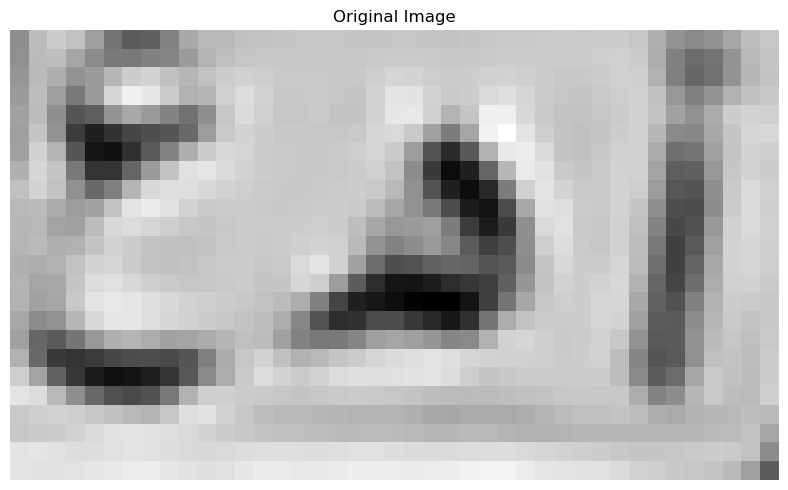

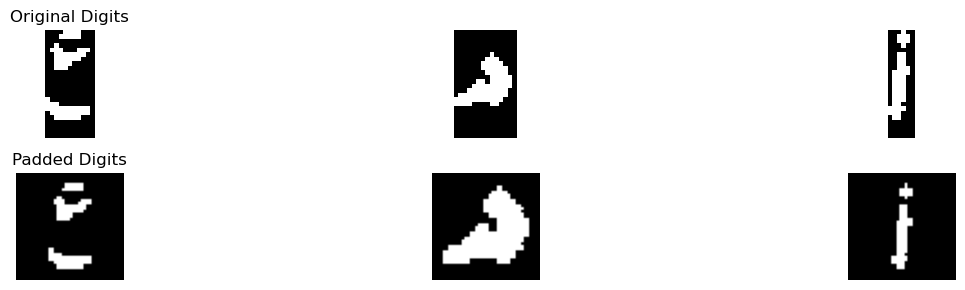

Best match: ع
Full comparison results: {'أ': 0.03125, 'ب': 0.10096153846153846, 'ج': 2.275103519668737, 'د': 3.1797208750129733, 'ر': 0.7845979192943211, 'س': 0.5133928571428572, 'ص': 0.4303571428571429, 'ط': 1.2804993306132857, 'ع': 3.9944892473118276, 'ف': 1.4703616119150924, 'ق': 1.2995333619170044, 'ك': 2.0520833333333335, 'ل': 1.604953560371517, 'م': 1.9289772727272727, 'ن': 2.189821428571429, 'ه': 0.6061155913978494, 'و': 1.2429985404123336, 'ي': 1.0319258639910813}
Confidence :  0.4073841861494272
Best match: ه
Full comparison results: {'أ': 0.4375, 'ب': 0.4375, 'ج': 0.46875, 'د': 2.3125, 'ر': 1.0, 'س': 2.5724137931034483, 'ص': 1.7629310344827585, 'ط': 0.5, 'ع': 0.25, 'ف': 2.375, 'ق': 0.75, 'ك': 0.78125, 'ل': 0.625, 'م': 0.4375, 'ن': 0.9375, 'ه': 6.2298850574712645, 'و': 1.53125, 'ي': 1.1875}
Confidence :  1.828735632183908
Best match: أ
Full comparison results: {'أ': 2.7415477667493797, 'ب': 0.35344827586206895, 'ج': 0.3004011387163561, 'د': 0.31022058823529414, 'ر': 0.47104108

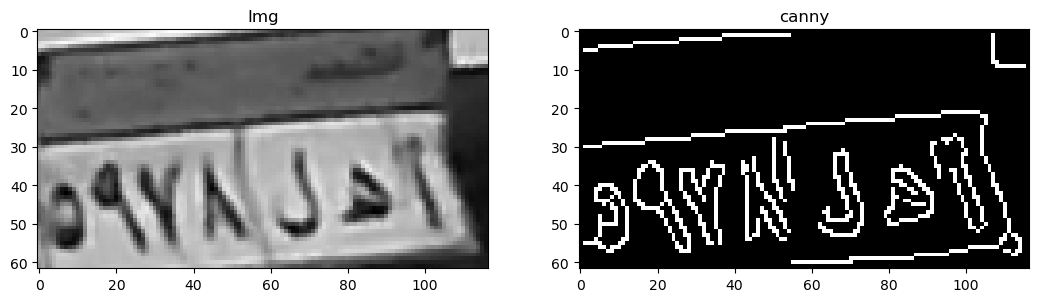

Tilt angle: -4.50 degrees


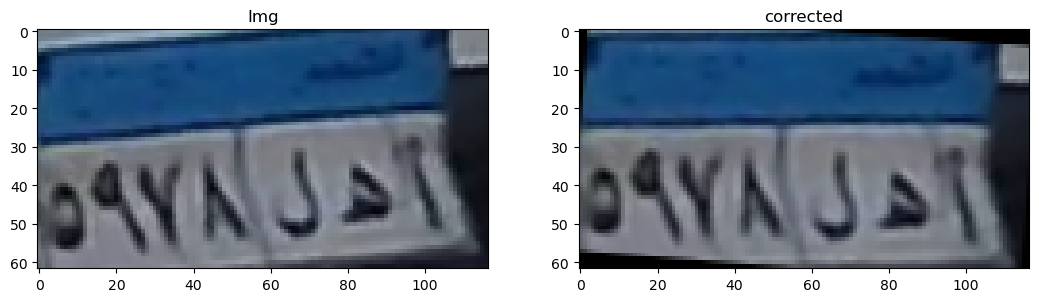

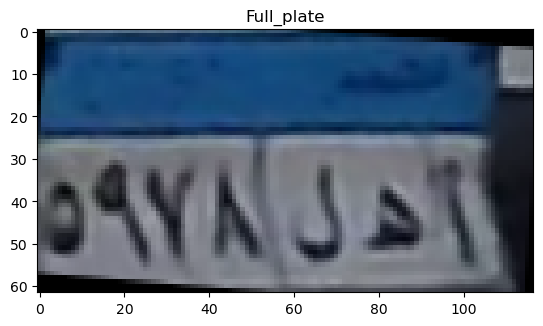

After
After
0.0 51.0 2.0 35.0
After
After
to horizonatal


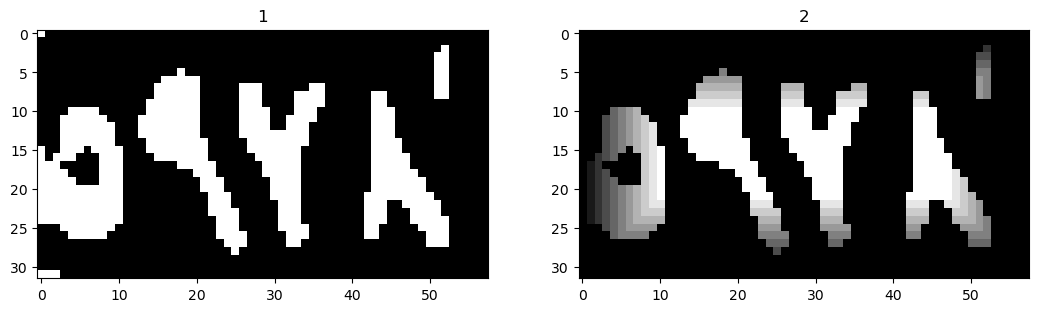

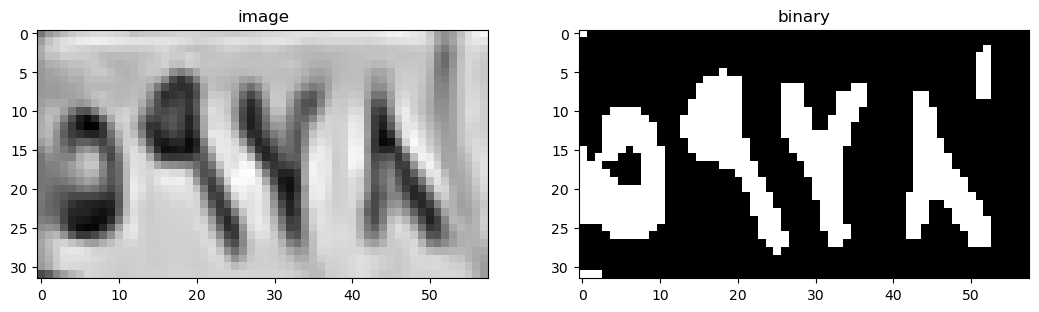

0 11
13 37


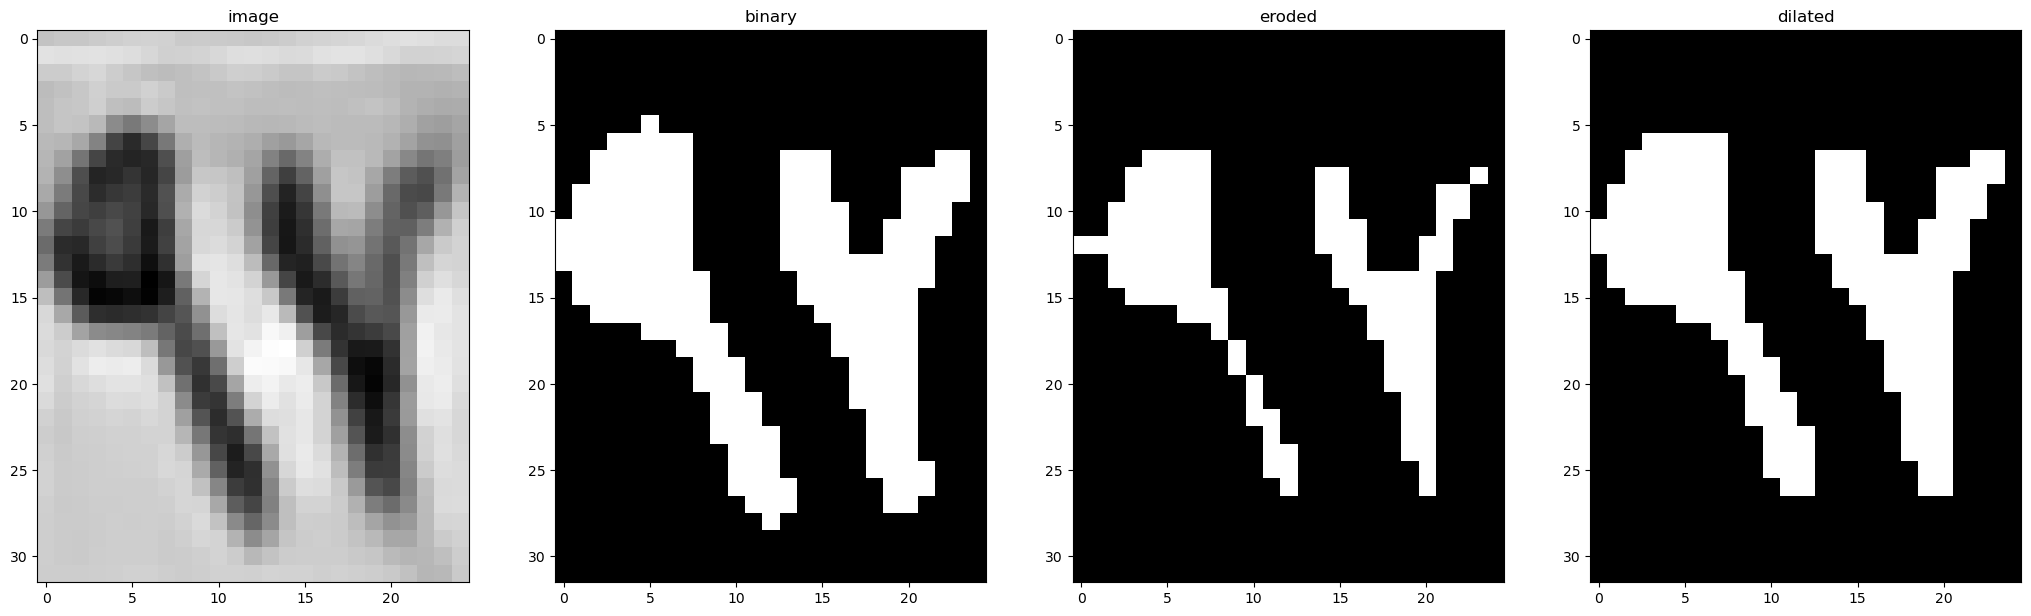

0 24
0.0 13.0 5.0 27.0
12.0 24.0 6.0 27.0
42 53


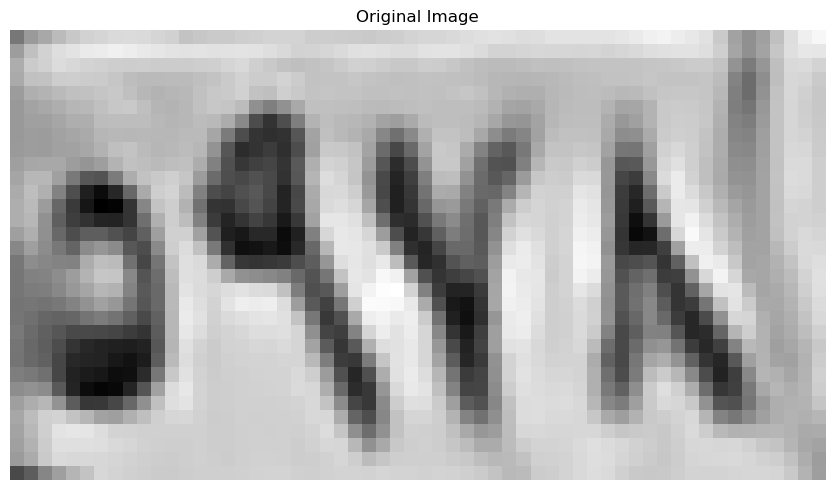

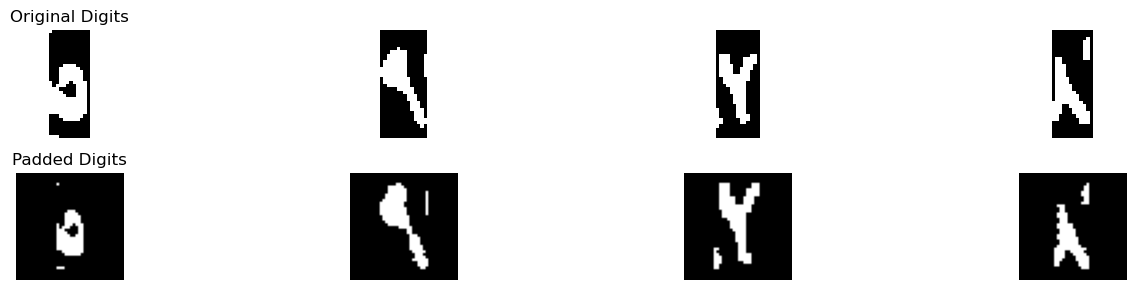

Best match: ١
Full comparison results: {'١': 2.15625, '٢': 1.0247668997669, '٣': 0.5213815789473684, '٤': 0.03125, '٥': 0.0625, '٦': 0.3309523809523809, '٧': 1.729779411764706, '٨': 1.9418458781362007, '٩': 0.784769356460533}
Confidence :  0.10720206093189966
Best match: ٩
Full comparison results: {'١': 1.71875, '٢': 1.4756944444444442, '٣': 1.9020467836257309, '٤': 2.3402777777777777, '٥': 0.8805346700083542, '٦': 1.5361111111111112, '٧': 1.2881944444444444, '٨': 3.047916666666667, '٩': 5.215277777777778}
Confidence :  1.0836805555555553
Best match: ٣
Full comparison results: {'١': 2.365808823529412, '٢': 2.112132352941176, '٣': 3.5993614551083595, '٤': 1.386029411764706, '٥': 1.7890959015185022, '٦': 1.0621323529411766, '٧': 2.452205882352941, '٨': 2.1413398692810457, '٩': 2.2450980392156863}
Confidence :  0.5735777863777092
Best match: ٢
Full comparison results: {'١': 0.07692307692307693, '٢': 3.7427884615384617, '٣': 1.5514705882352942, '٤': 2.095650183150183, '٥': 1.06204850361197

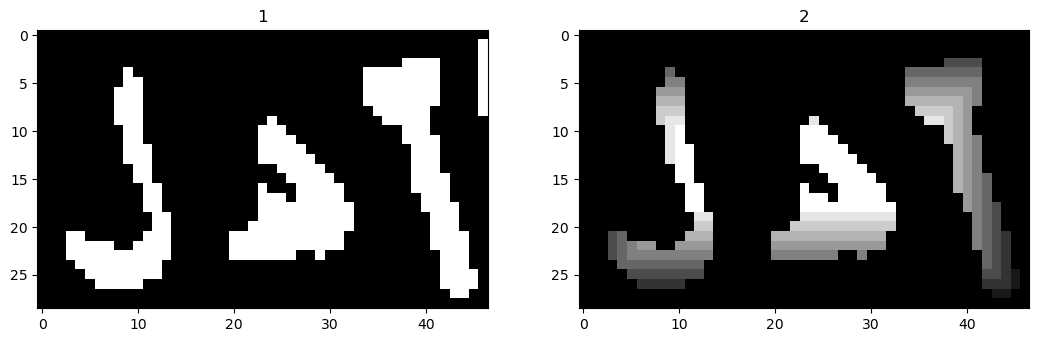

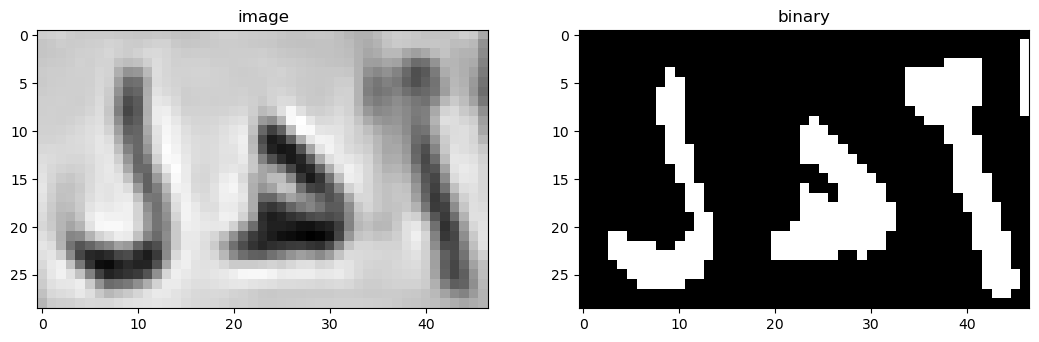

3 14
20 33
34 46


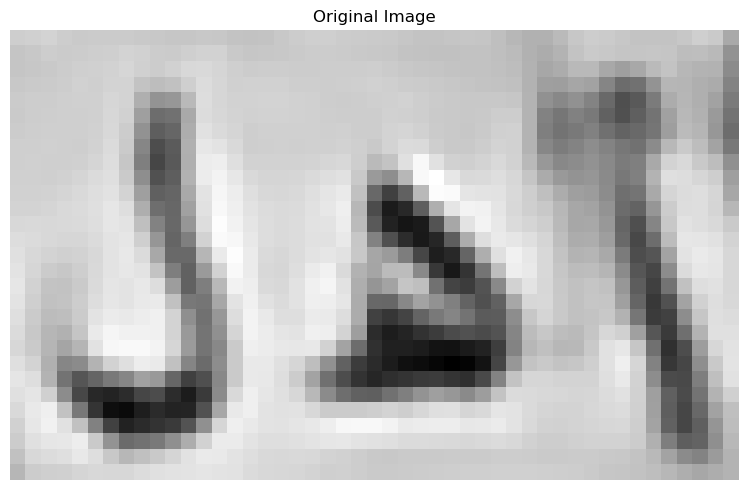

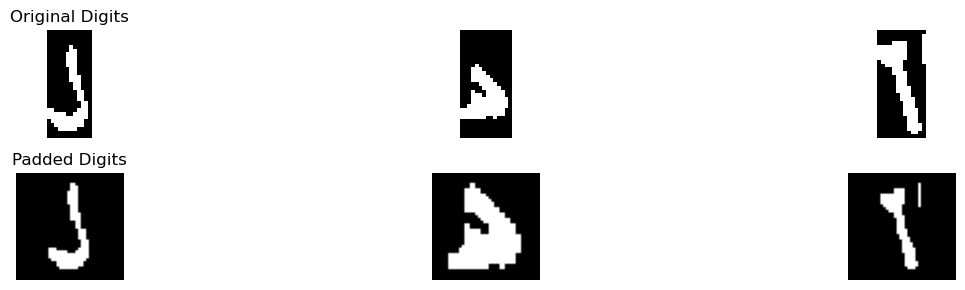

Best match: ن
Full comparison results: {'أ': 0.49374999999999997, 'ب': 0.3053713527851459, 'ج': 2.0903999884978144, 'د': 2.8957749580427596, 'ر': 2.043033394017277, 'س': 1.3571428571428572, 'ص': 0.8749999999999999, 'ط': 1.6694664031620552, 'ع': 1.4355263157894735, 'ف': 2.829556530214425, 'ق': 2.31812865497076, 'ك': 0.5492424242424242, 'ل': 2.5945239938080493, 'م': 0.853030303030303, 'ن': 3.1954166666666666, 'ه': 0.7956317204301075, 'و': 2.023148148148148, 'ي': 2.8886217948717947}
Confidence :  0.14982085431195347
Best match: ه
Full comparison results: {'أ': 0.5497685185185185, 'ب': 0.19073275862068967, 'ج': 1.505787037037037, 'د': 2.4710648148148144, 'ر': 0.9370210727969349, 'س': 1.0714285714285714, 'ص': 1.1685185185185185, 'ط': 2.0578703703703702, 'ع': 0.6770833333333333, 'ف': 2.8591269841269837, 'ق': 1.34375, 'ك': 1.494212962962963, 'ل': 0.4444444444444444, 'م': 0.8020833333333333, 'ن': 0.7743055555555556, 'ه': 4.1875, 'و': 1.8587962962962963, 'ي': 1.6458333333333335}
Confidence :  0

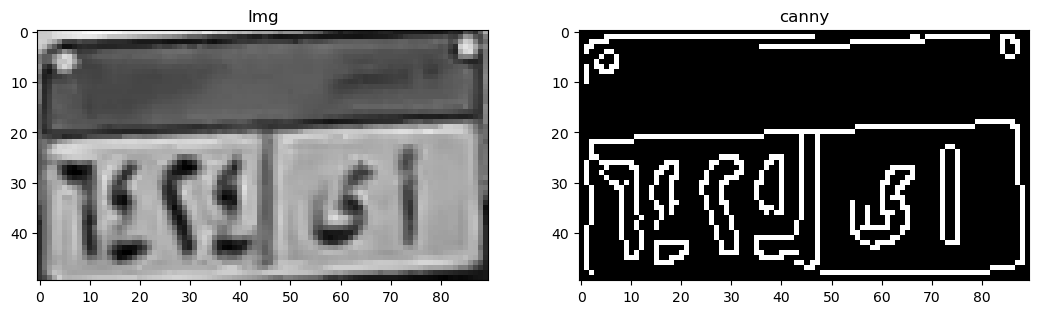

Tilt angle: -3.00 degrees


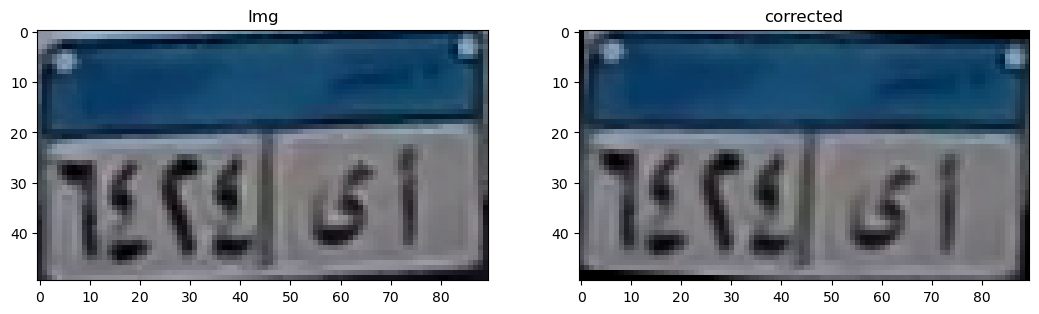

After
After
1.0 42.0 2.0 29.0
After
After
to horizonatal


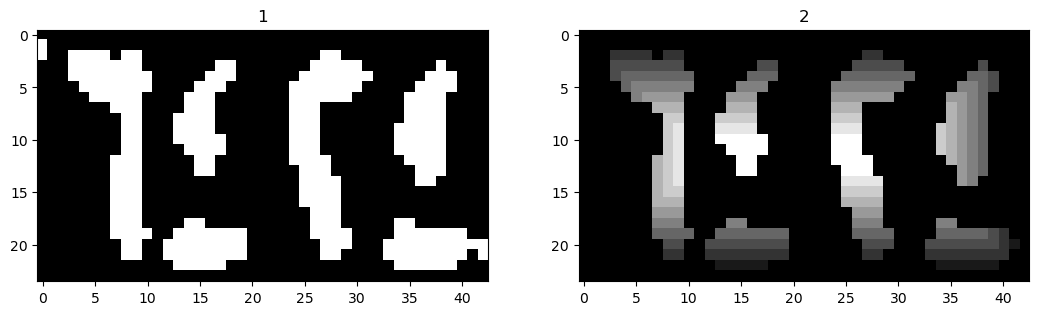

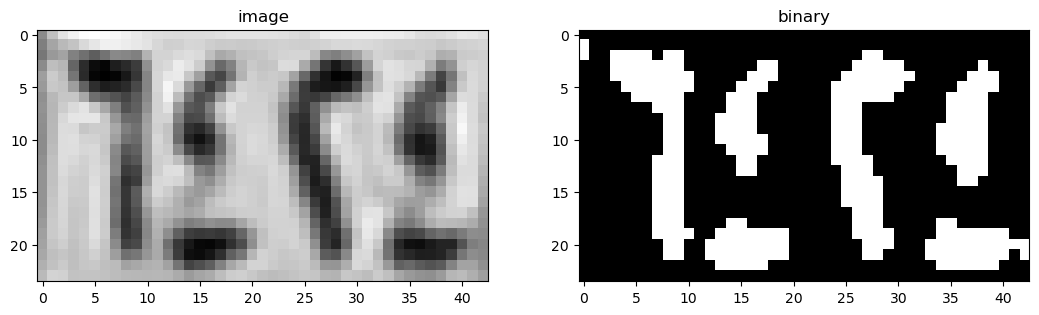

0 1
3 11
12 20
24 32
33 42


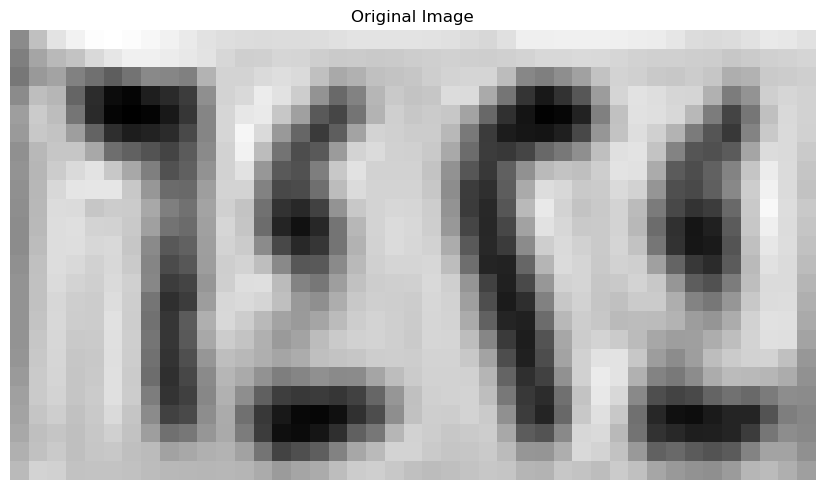

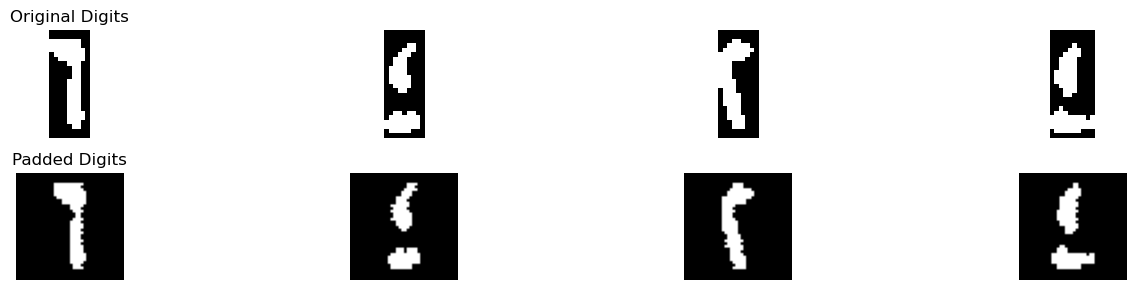

Best match: ٦
Full comparison results: {'١': 3.1875000000000004, '٢': 2.1698717948717947, '٣': 1.0238970588235294, '٤': 0.19642857142857142, '٥': 2.298112007961079, '٦': 4.6, '٧': 0.7393382352941177, '٨': 0.6409722222222222, '٩': 1.7967100301659125}
Confidence :  0.7062499999999996
Best match: ٤
Full comparison results: {'١': 2.7187499999999996, '٢': 0.9615384615384616, '٣': 1.2578366873065017, '٤': 4.392929516719839, '٥': 2.5866550567595463, '٦': 0.35238095238095235, '٧': 0.3150735294117647, '٨': 2.339583333333333, '٩': 1.7157805429864255}
Confidence :  0.8370897583599197
Best match: ٢
Full comparison results: {'١': 0.23958333333333331, '٢': 6.580128205128204, '٣': 4.038022445820433, '٤': 3.2183836996336996, '٥': 2.7838714433141676, '٦': 0.7330357142857142, '٧': 2.231985294117647, '٨': 0.6625, '٩': 1.0388543237807943}
Confidence :  1.2710528796538858
Best match: ٤
Full comparison results: {'١': 1.875, '٢': 2.0, '٣': 1.750483746130031, '٤': 5.72983870967742, '٥': 3.122217307975822, '٦'

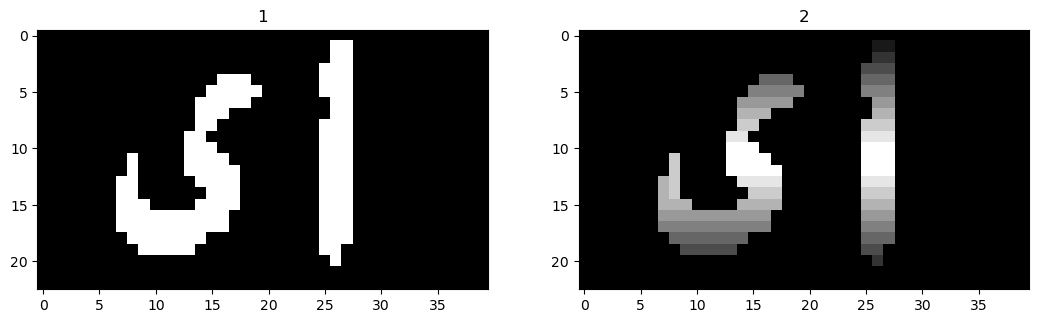

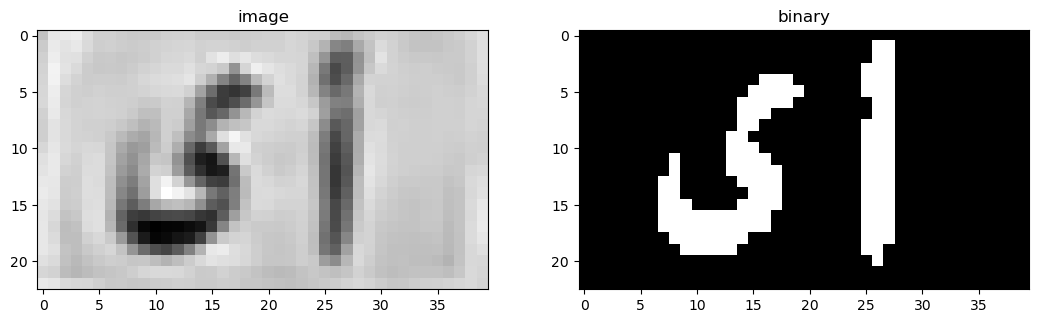

7 20
25 28


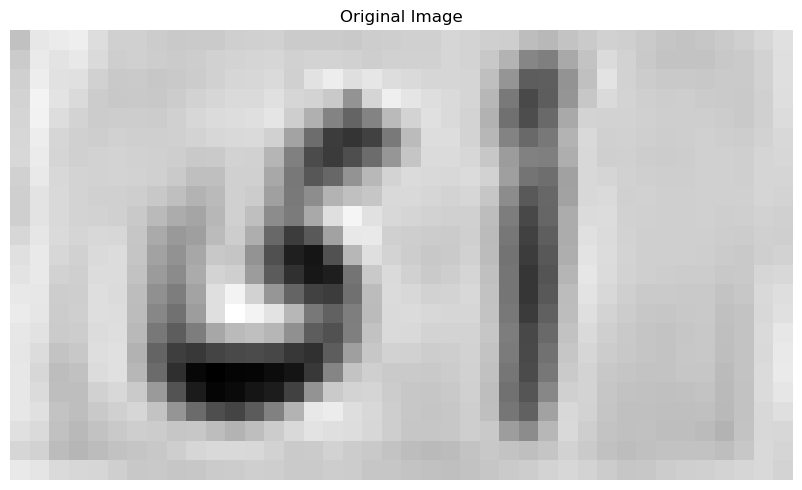

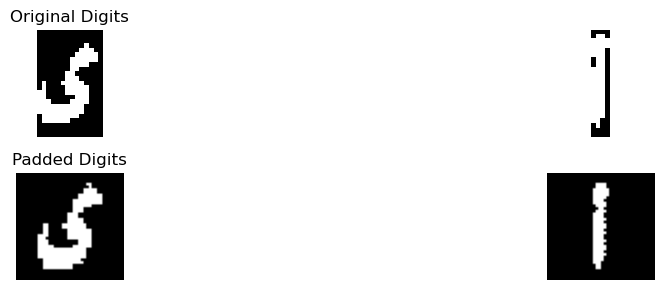

Best match: ي
Full comparison results: {'أ': 0.6458333333333334, 'ب': 0.4849137931034483, 'ج': 1.5497685185185184, 'د': 3.2633333333333336, 'ر': 2.0948132183908044, 'س': 2.388392857142857, 'ص': 2.5770833333333334, 'ط': 2.052083333333333, 'ع': 0.9583333333333333, 'ف': 2.830522486772487, 'ق': 1.9108796296296295, 'ك': 1.78125, 'ل': 2.4375, 'م': 0.20833333333333331, 'ن': 2.2141666666666664, 'ه': 1.3195564516129032, 'و': 2.8819444444444446, 'ي': 3.3716346153846155}
Confidence :  0.05415064102564093
Best match: أ
Full comparison results: {'أ': 2.4956501831501834, 'ب': 0.125, 'ج': 0.4358178053830227, 'د': 0.9711462665874431, 'ر': 0.03125, 'س': 0.03125, 'ص': 0.3181547619047619, 'ط': 1.0753458498023714, 'ع': 0.1875, 'ف': 0.5277777777777778, 'ق': 0.08388157894736842, 'ك': 0.08712121212121213, 'ل': 0.0, 'م': 0.8382867132867133, 'ن': 0.46875, 'ه': 0.7008736559139784, 'و': 0.7425595238095237, 'ي': 0.31547619047619047}
Confidence :  0.710152166673906
[['٦', '٤', '٢', '٤'], ['ي', 'أ']]


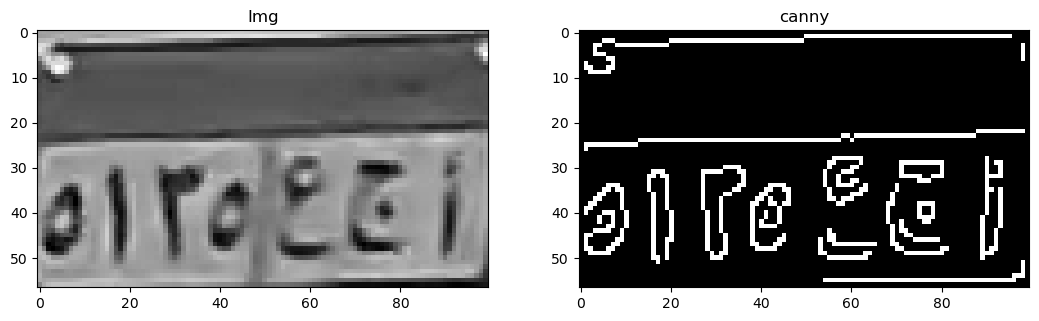

Tilt angle: -1.00 degrees


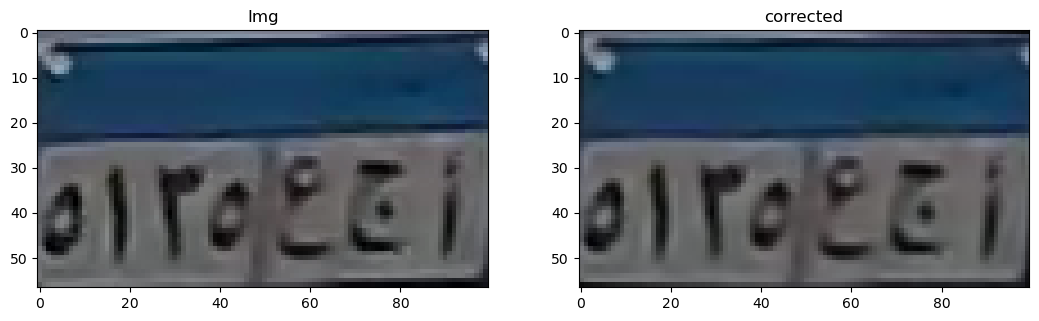

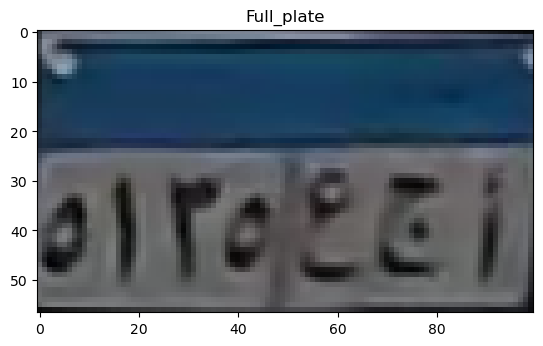

After
After
After
After
to horizonatal


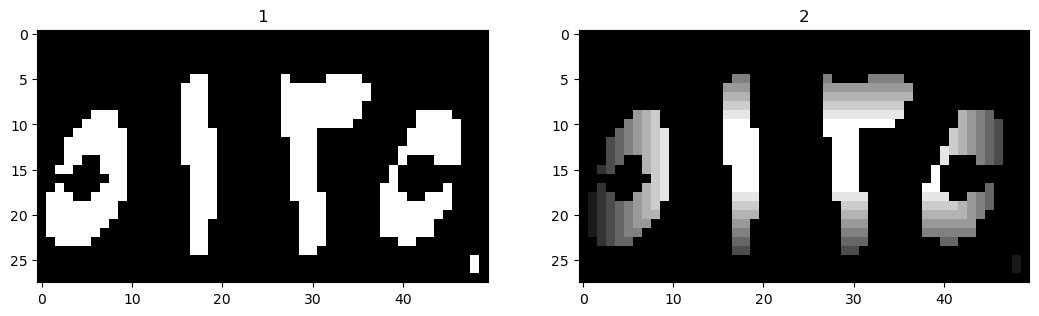

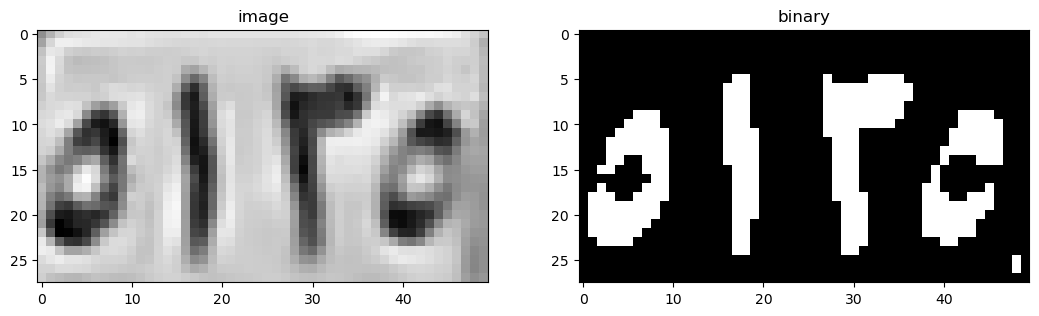

1 10
16 20
27 37
38 47
48 49


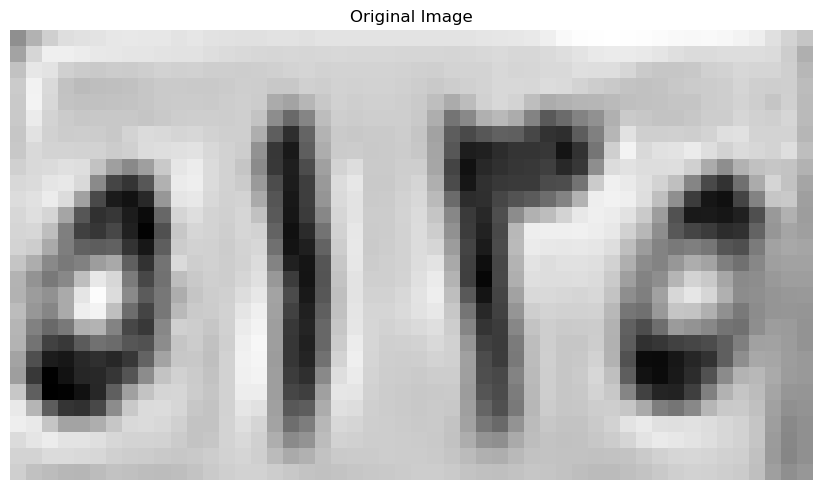

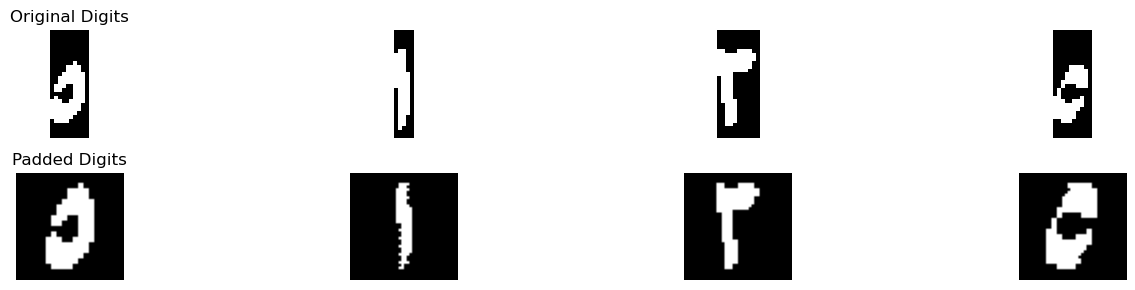

Best match: ٥
Full comparison results: {'١': 0.7222222222222222, '٢': 0.9965277777777777, '٣': 0.9877558479532164, '٤': 2.4548611111111107, '٥': 6.701728279030911, '٦': 1.4256944444444444, '٧': 0.922222222222222, '٨': 1.5291666666666666, '٩': 0.65625}
Confidence :  2.1234335839599003
Best match: ١
Full comparison results: {'١': 5.641666666666667, '٢': 2.660110722610722, '٣': 1.0740131578947367, '٤': 1.8504120879120878, '٥': 0.8978097818074597, '٦': 0.40238095238095234, '٧': 1.191544117647059, '٨': 2.84375, '٩': 1.7306121166415285}
Confidence :  1.3989583333333333
Best match: ٣
Full comparison results: {'١': 0.4375, '٢': 3.15625, '٣': 4.929179566563468, '٤': 1.28125, '٥': 2.9118476337903583, '٦': 1.84375, '٧': 1.9386029411764705, '٨': 0.7486111111111111, '٩': 1.0159313725490196}
Confidence :  0.8864647832817338
Best match: ٥
Full comparison results: {'١': 0.6842105263157895, '٢': 1.5411184210526316, '٣': 1.299342105263158, '٤': 2.412828947368421, '٥': 6.953007518796993, '٦': 1.657236842

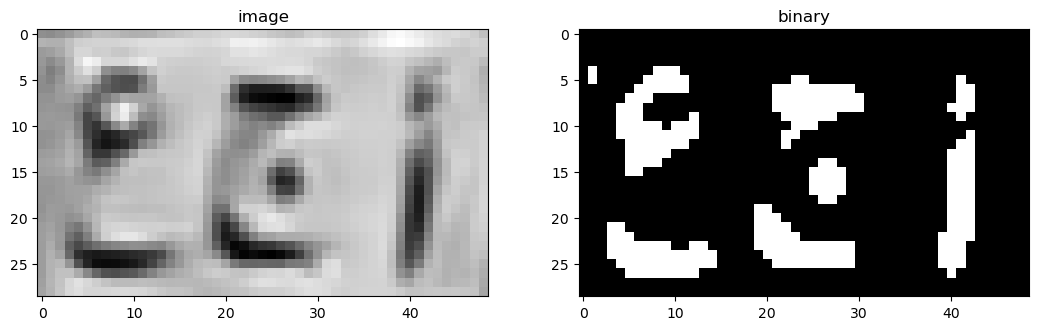

1 2
3 15
19 31
39 43


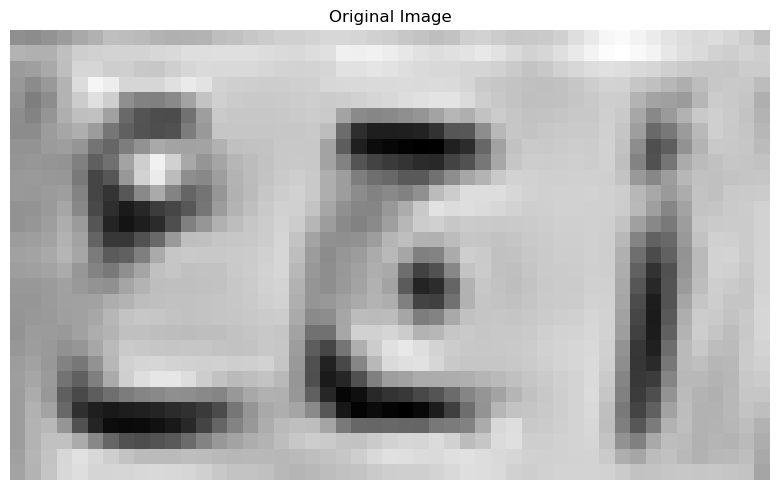

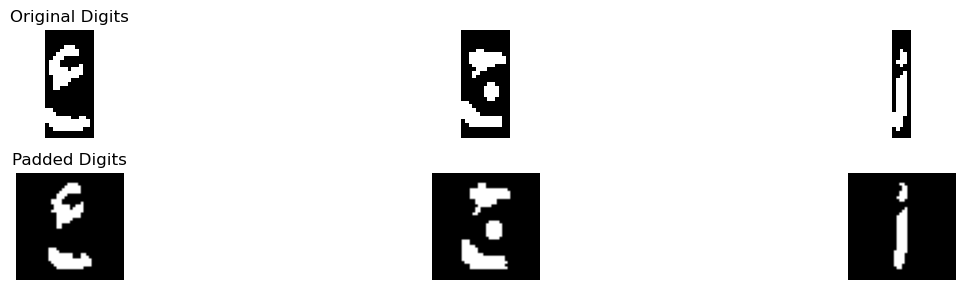

Best match: ع
Full comparison results: {'أ': 0.4375, 'ب': 0.038461538461538464, 'ج': 2.5536720726938116, 'د': 2.73136284152151, 'ر': 0.46587768615692154, 'س': 0.3839285714285714, 'ص': 0.6214285714285714, 'ط': 1.6697134387351782, 'ع': 4.047288988600533, 'ف': 1.8309766912801717, 'ق': 1.6079999540185566, 'ك': 2.121212121212121, 'ل': 1.0768072755417957, 'م': 2.1136363636363638, 'ن': 2.4068452380952383, 'ه': 0.7695564516129032, 'و': 1.5488095238095236, 'ي': 1.0591648086213303}
Confidence :  0.6579630735395114
Best match: ج
Full comparison results: {'أ': 0.42013888888888884, 'ب': 0.4480271883289125, 'ج': 4.488497814584771, 'د': 3.16443115364168, 'ر': 0.5948731884057972, 'س': 0.6696428571428572, 'ص': 0.8714285714285714, 'ط': 1.4228837285902503, 'ع': 1.8648026315789474, 'ف': 2.789717348927875, 'ق': 2.2375261069340016, 'ك': 1.5331439393939394, 'ل': 1.2985745614035087, 'م': 1.0874368686868687, 'ن': 2.1489880952380953, 'ه': 1.3341397849462366, 'و': 1.2597552910052907, 'ي': 2.0615013006317353}
Con

Tilt angle: -2.00 degrees


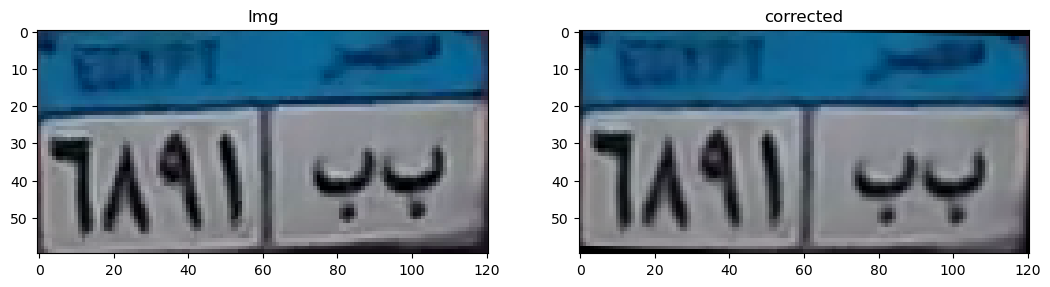

1.0 59.0 22.0 57.0
62.0 120.0 22.0 56.0
After
After
2.0 60.0 0.0 32.0
After
After
to horizonatal


2 13
16 28
31 42
48 53


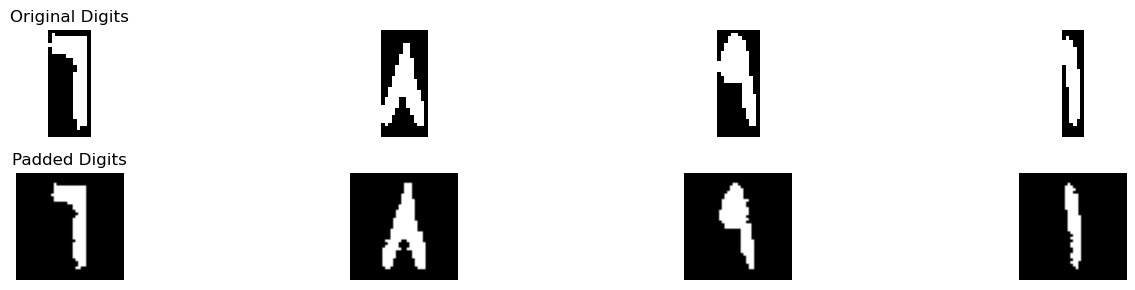

Best match: ٦
Full comparison results: {'١': 1.7259615384615383, '٢': 1.2139423076923077, '٣': 1.2879256965944272, '٤': 0.0625, '٥': 2.173112007961079, '٦': 6.286904761904762, '٧': 0.3014705882352941, '٨': 0.7097222222222221, '٩': 2.0941899195575666}
Confidence :  2.0568963769718414
Best match: ٨
Full comparison results: {'١': 2.25, '٢': 0.875, '٣': 0.7989551083591331, '٤': 1.15625, '٥': 1.7646782397169392, '٦': 1.24375, '٧': 1.1044117647058824, '٨': 6.259027777777778, '٩': 2.4493464052287583}
Confidence :  1.9048406862745098
Best match: ٩
Full comparison results: {'١': 3.6322115384615388, '٢': 2.512019230769231, '٣': 1.9396284829721362, '٤': 2.9552884615384616, '٥': 1.9608672416334956, '٦': 2.1366071428571427, '٧': 0.9768382352941176, '٨': 3.2319444444444443, '٩': 5.176014957264957}
Confidence :  0.7719017094017093
Best match: ١
Full comparison results: {'١': 6.464583333333334, '٢': 2.582750582750583, '٣': 1.1151315789473684, '٤': 1.3541437728937729, '٥': 0.9997051452159811, '٦': 0.77

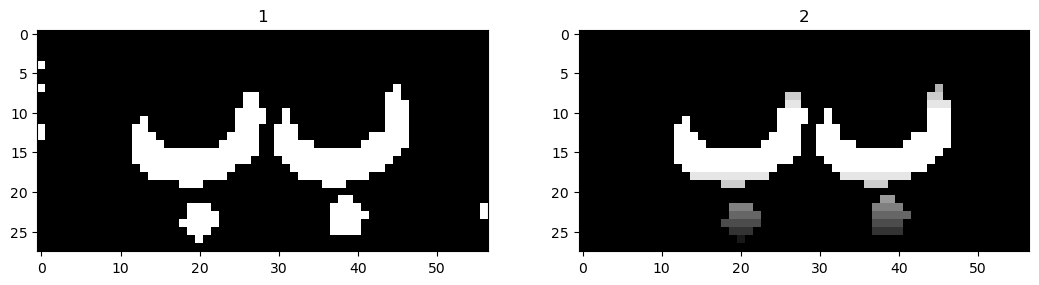

0 1
12 29
30 47


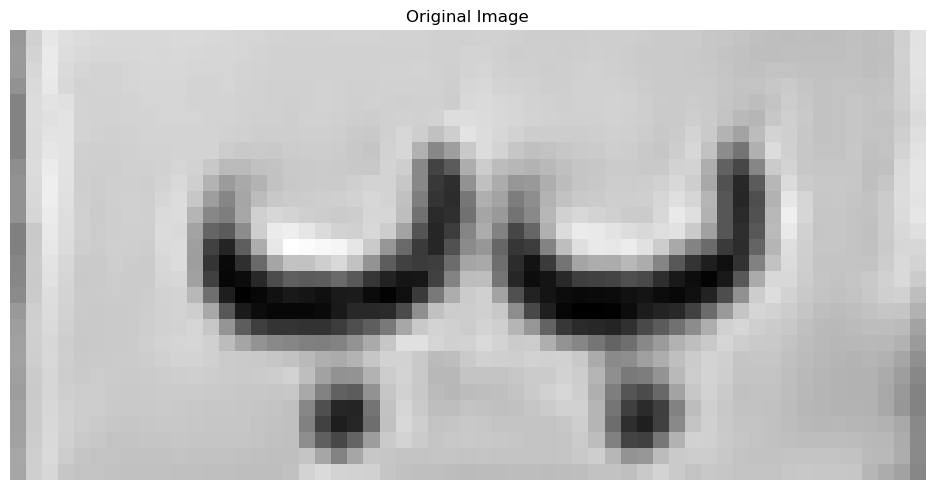

Best match: ب
Full comparison results: {'أ': 0.6160714285714286, 'ب': 4.223162972085386, 'ج': 0.39285714285714285, 'د': 0.3571428571428571, 'ر': 0.8197352216748769, 'س': 0.8973214285714286, 'ص': 2.1610119047619047, 'ط': 0.25, 'ع': 0.03225806451612903, 'ف': 0.6785714285714285, 'ق': 0.7857142857142857, 'ك': 1.4285714285714284, 'ل': 0.06696428571428571, 'م': 0.4910714285714286, 'ن': 0.3839285714285714, 'ه': 0.4375, 'و': 1.283266129032258, 'ي': 1.1014880952380952}
Confidence :  1.0310755336617405
Best match: ب
Full comparison results: {'أ': 0.6160714285714286, 'ب': 5.493908906721754, 'ج': 0.8839285714285714, 'د': 0.5267857142857143, 'ر': 0.9544334975369458, 'س': 0.5089285714285714, 'ص': 1.7636904761904761, 'ط': 0.49999999999999994, 'ع': 0.09375, 'ف': 1.0357142857142858, 'ق': 1.25, 'ك': 0.8571428571428571, 'ل': 0.14047619047619048, 'م': 0.3169642857142857, 'ن': 0.2857142857142857, 'ه': 0.65625, 'و': 1.1741071428571428, 'ي': 0.9723214285714286}
Confidence :  1.865109215265639
[['٦', '٨', '٩'

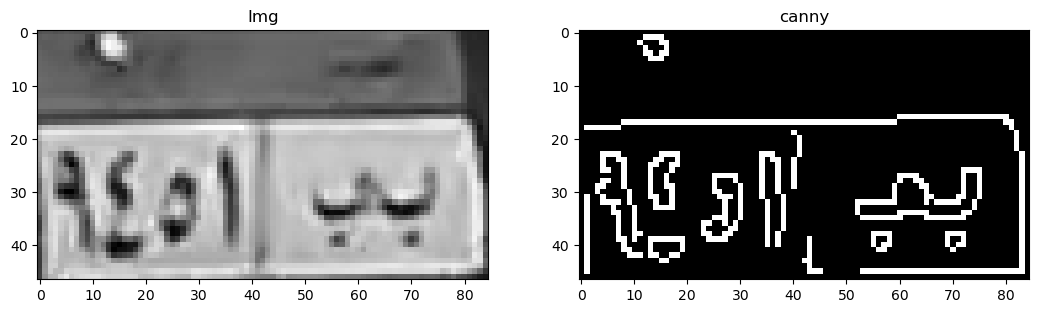

Tilt angle: -1.00 degrees


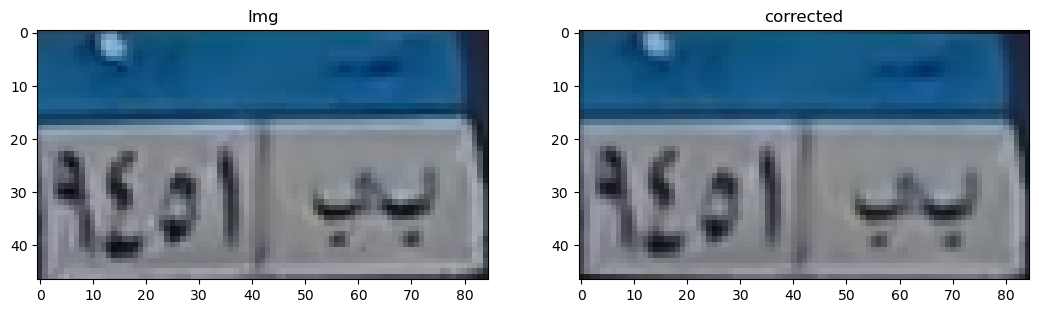

0.0 83.0 18.0 46.0
After
After
After
After
to horizonatal


2 10
11 19
22 29
33 37


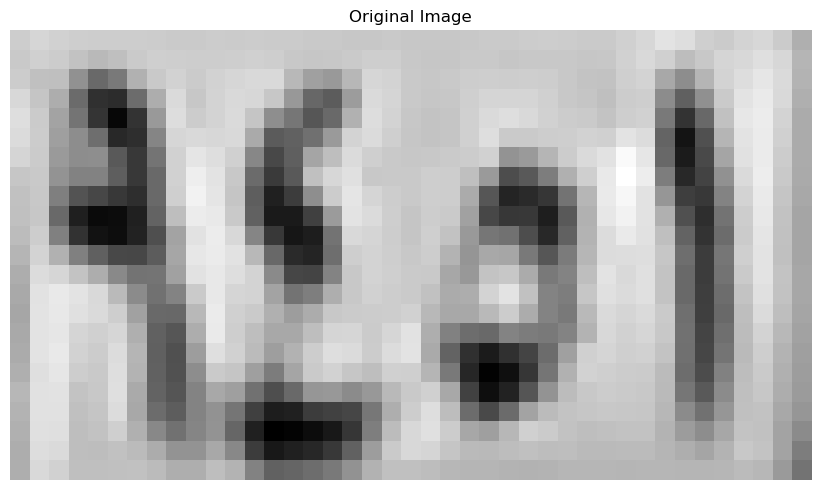

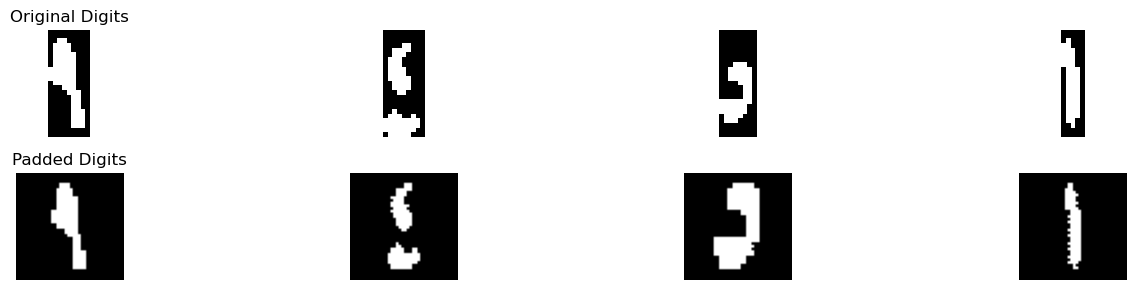

Best match: ٩
Full comparison results: {'١': 3.7884615384615383, '٢': 2.512019230769231, '٣': 1.6308049535603715, '٤': 3.2543956043956044, '٥': 1.3450998820580864, '٦': 0.8398809523809524, '٧': 1.1143382352941176, '٨': 2.7965277777777775, '٩': 4.938631221719456}
Confidence :  0.5750848416289589
Best match: ٤
Full comparison results: {'١': 3.364583333333333, '٢': 1.1514423076923077, '٣': 1.21671826625387, '٤': 5.2466346153846155, '٥': 2.8217741043785938, '٦': 0.07142857142857142, '٧': 0.3775735294117647, '٨': 2.189583333333333, '٩': 1.8385809451985922}
Confidence :  0.9410256410256412
Best match: ٥
Full comparison results: {'١': 0.7647058823529411, '٢': 1.9577205882352944, '٣': 1.676277089783282, '٤': 2.463235294117647, '٥': 6.731590004422822, '٦': 2.15625, '٧': 0.973529411764706, '٨': 1.3297385620915032, '٩': 0.7285539215686274}
Confidence :  2.1341773551525876
Best match: ١
Full comparison results: {'١': 5.735416666666666, '٢': 2.1232517482517483, '٣': 1.0740131578947367, '٤': 1.45682

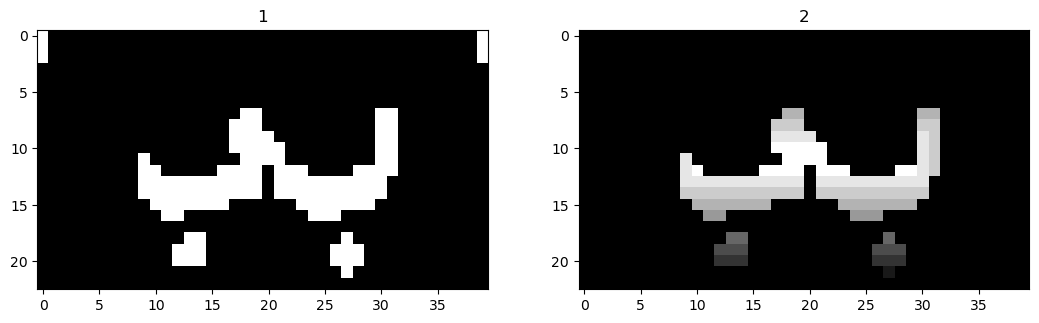

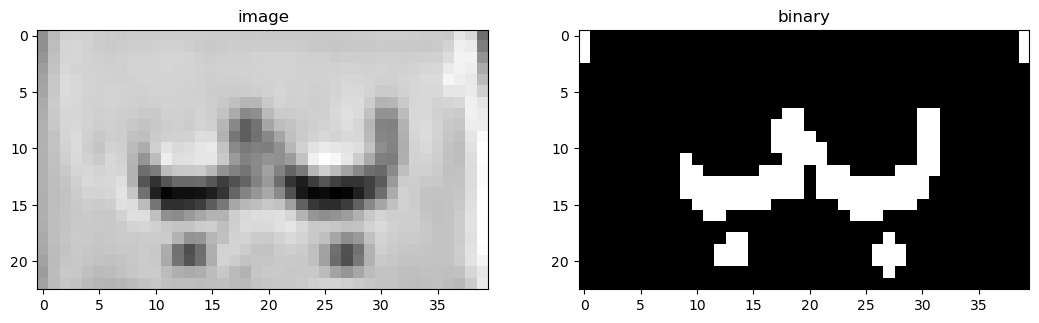

0 1
9 32


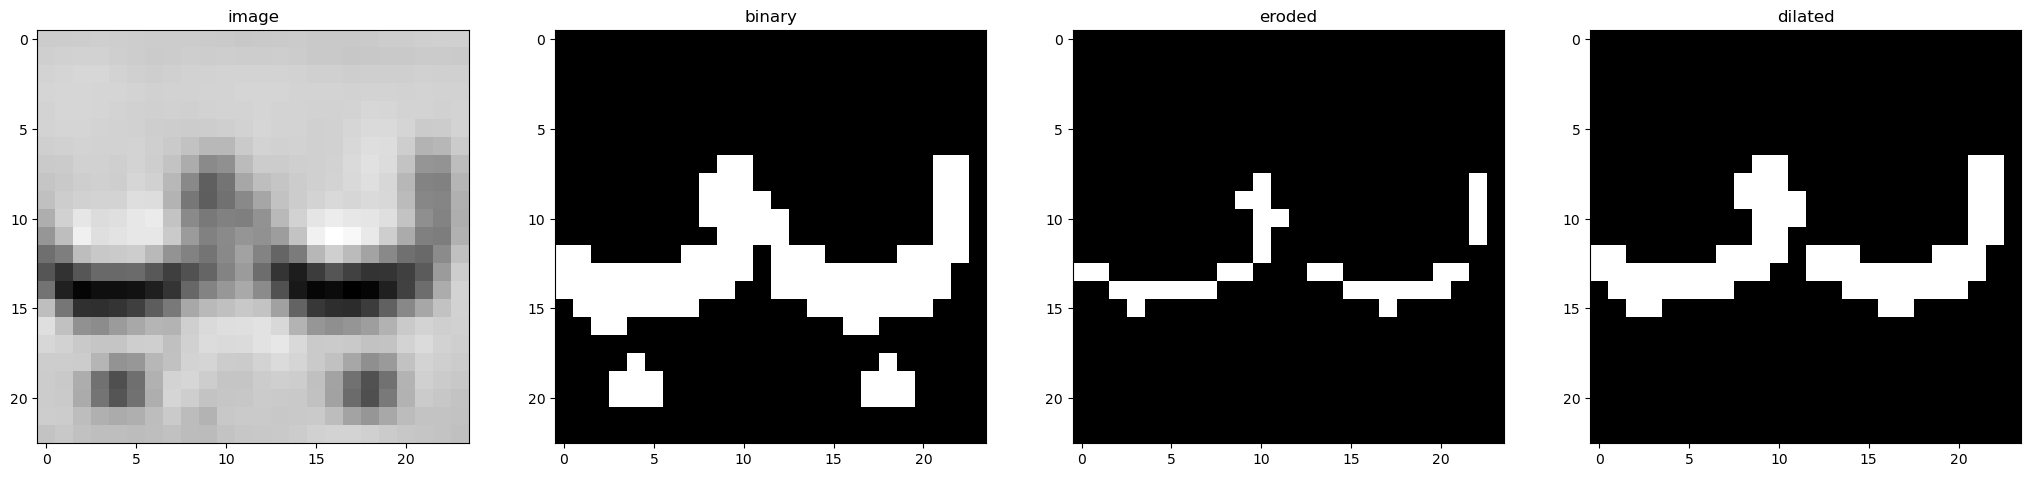

0 23
0.0 23.0 6.0 16.0


TypeError: slice indices must be integers or None or have an __index__ method

In [134]:
def compare_result_with_answer(result, answer):
    # Step 1: Flatten the result and join all characters into a single string
    flattened = [char for sublist in result for char in sublist]
    
    # Separate characters and digits
    characters = [char for char in flattened if not char.isdigit()]
    digits = [char for char in flattened if char.isdigit()]
    
    # Reverse characters and concatenate with digits
    reconstructed_result = ''.join(characters[::-1] + digits)
    
    print(reconstructed_result, answer)
    
    # Step 2: Compare the reconstructed result with the answer
    is_match = reconstructed_result == answer
    
    # Step 3: Calculate percentage match
    length = max(len(reconstructed_result), len(answer))
    matches = sum(1 for a, b in zip(reconstructed_result, answer) if a == b)
    percentage_match = (matches / length) * 100
    print(percentage_match)
    
    return is_match, percentage_match


def load_dataset(path_to_dataset):
    features = []
    labels = []
    img_filenames = os.listdir(path_to_dataset)

    for i, fn in enumerate(img_filenames):
        if fn.split('.')[-1] != 'png':
            continue

        label = fn.split('.')[0]
        labels.append(label)

        path = os.path.join(path_to_dataset, fn)
        result = []
        img = rgba2rgb(io.imread(path)) #if not read try to replace io to cv2
        img = fix_tilt(img)
        show_images([img],["Full_plate"])
        image1,image1_it,image2,image2_it = split_plate(img)
        padded_digits = character_extraction(image1,image1_it,1)
        answer = test_half(1,padded_digits)
        result.append(answer)
        padded_digits = character_extraction(image2,image2_it,2)
        answer = test_half(2,padded_digits)
        result.append(answer)
        print(result)
        features.append(result)
        
    return features, labels
def getaccuracy(features,labels):
    right = 0
    percentage_right = 0
    for i in range(len(labels)):
        x,y = compare_result_with_answer(features[i],labels[i])
        if x:
            right += 1
        percentage_right += y
            
    return 100*right/len(labels), (percentage_right / len(labels))

path_to_dataset = r'./Tests'
features,labels = load_dataset(path_to_dataset)
accuracy,character_accuracy = getaccuracy(features,labels)
print(accuracy)
print(character_accuracy)

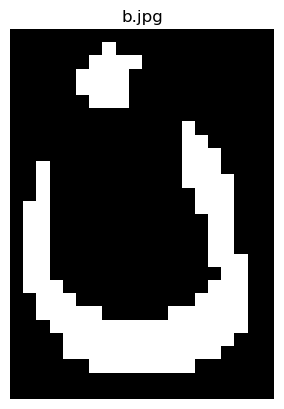

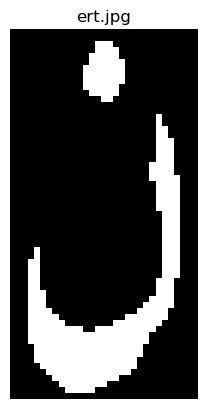

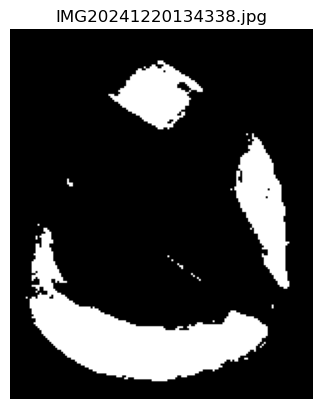

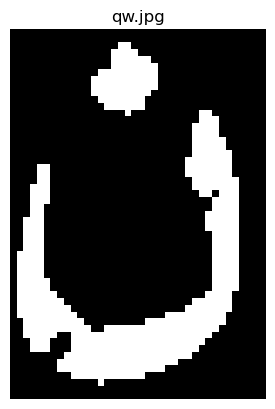

In [37]:
# Path to the folder containing the images
folder_path = "./Reference_Letters/ن"

# Get a list of all files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg'))]

# Loop through each file, read it, and display it
for image_file in image_files:
    # Construct the full file path
    image_path = os.path.join(folder_path, image_file)
    
    # Read the image
    img = io.imread(image_path)
    img_g = rgb2gray(img)
    img_it = iterativeThreshold(img_g)
    
    # Display the image
    plt.imshow(img_it)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

In [128]:
def bounding(img_it):
    # # Find contours
    contours = find_contours(img_it, 0.)
    bounding_boxes = []
    for contour in contours:
        Ymin = np.min(contour[:,0])
        Ymax = np.max(contour[:,0])
        Xmin = np.min(contour[:,1])
        Xmax = np.max(contour[:,1])
        aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)
        print(Xmin, Xmax, Ymin, Ymax)
        if 0.5 <= aspect_ratio <= 3 and (Xmax-Xmin) > 4 and (Ymax-Ymin) > 4:
            bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
    
    
    return bounding_boxes

def rectangular_distance(shape, step=0.1):
    """
    Calculate a rectangular distance matrix where distance is based on layers moving inward.
    
    Args:
        shape (tuple): The shape of the matrix (height, width).
        step (float): The decrement for each inward layer of distance.
        
    Returns:
        numpy.ndarray: Matrix of distances based on rectangular layers.
    """
    height, width = shape
    distance_matrix = np.zeros((height, width), dtype=float)
    
    # Calculate the number of layers
    num_layers = min(height, width) // 2
    
    # Assign distances for each layer
    for layer in range(num_layers):
        distance = 1 - layer * step
        # Stop assigning if distance is less than zero
        if distance < 0:
            break
        # Assign distance to the current layer
        distance_matrix[layer:height-layer, layer:width-layer] = distance 
    
    return distance_matrix

In [132]:
def sub_horizontal_segmentation(image, binary_image_original, min_width=1, max_width=20, min_height=4, offset = 0):
    """
    Segment digits horizontally
    
    Args:
        binary_image (numpy.ndarray): Binary image of the license plate
        min_width (int): Minimum width of a valid digit region
        max_width (int): Maximum width of a valid digit region
        min_height (int): Minimum height of a valid digit region
    
    Returns:
        list: List of segmented digit images
    """
    binary_image_new = iterativeThreshold(image)
    eroded = binary_erosion(binary_image_new,np.ones([3,2]))
    dilated = binary_dilation(eroded,np.ones([2,2]))

    show_images([image,binary_image_new,eroded,dilated],["image","binary","eroded","dilated"])

    binary_image = dilated
    
    # Find horizontal projection
    horizontal_projection = np.sum(binary_image, axis=0)
    
    # Find potential digit regions
    digit_regions = []
    in_digit = False
    start = 0
    
    for x in range(len(horizontal_projection)):
        # Check if we're in a potential digit region
        if not in_digit and horizontal_projection[x] > 0:
            start = x
            in_digit = True
        
        # Check if we've exited a digit region
        elif in_digit and (horizontal_projection[x] == 0 or x == len(horizontal_projection)-1):
            end = x
            print(start,end)

            if (end - start) > max_width:
                boxes = bounding(binary_image)
                if len(boxes) == 1:
                    digit_region = binary_image_original[:,start:((end+start)/2)+1]
                    
                    digit_regions.append((start + offset, ((end+start)/2) + offset, digit_region))
    
                    digit_region = binary_image_original[:,(end+start)/2:end+1]
                    
                    digit_regions.append((((end+start)/2) + offset, end + offset, digit_region))
                else:
                    for box in boxes:
                        digit_region = binary_image_original[:,int(box[0]):int(box[1])+1]
                    
                        digit_regions.append((int(box[0]) + offset, int(box[1]) + offset, digit_region))  
                
            
            #filtering
            if (end - start >= min_width and end - start <= max_width and np.sum(binary_image_new[:,start:end+1]) > min_height * (end - start)):
        
                # Extract potential digit
                #digit_region = image[:, start:end]
                #digit_region = iterativeThreshold(digit_region)
                digit_region = binary_image_original[:,start:end+1]
                
                digit_regions.append((start + offset, end + offset, digit_region))
            
            in_digit = False
    
    return digit_regions


def horizontal_segmentation_1(image, binary_image_original, min_width=1, max_width=20, min_height=4):
    """
    Segment digits horizontally
    
    Args:
        binary_image (numpy.ndarray): Binary image of the license plate
        min_width (int): Minimum width of a valid digit region
        max_width (int): Maximum width of a valid digit region
        min_height (int): Minimum height of a valid digit region
    
    Returns:
        list: List of segmented digit images
    """
    binary_image_new = iterativeThreshold(image)

    show_images([image,binary_image_new],["image","binary"])
    
    # Find horizontal projection
    horizontal_projection = np.sum(binary_image_new, axis=0)
    
    # Find potential digit regions
    digit_regions = []
    in_digit = False
    start = 0
    
    for x in range(len(horizontal_projection)):
        # Check if we're in a potential digit region
        if not in_digit and horizontal_projection[x] > 0:
            start = x
            in_digit = True
        
        # Check if we've exited a digit region
        elif in_digit and (horizontal_projection[x] == 0 or x == len(horizontal_projection)-1):
            end = x
            print(start,end)
            #filtering
            
            while (end - start > max_width):
                sub_regions = sub_horizontal_segmentation(image[:,start:end+1], binary_image_original[:,start:end+1] , min_width, max_width, min_height, start)
                if len(sub_regions) == 0:
                    digit_region = binary_image_original[:,start:end+1]
                
                    digit_regions.append((start, end, digit_region))
                    break
                for x in range(len(sub_regions)):
                    digit_regions.append(sub_regions[x])
                    start = sub_regions[x][1]
                    
            if (end - start >= min_width and end - start <= max_width and np.sum(binary_image_new[:,start:end+1]) > min_height * (end - start) and ((end+start)/2 > len(horizontal_projection)/20 and (end+start)/2 < len(horizontal_projection) - (len(horizontal_projection)/20))):
        
                # Extract potential digit
                #digit_region = image[:, start:end]
                #digit_region = iterativeThreshold(digit_region)
                digit_region = binary_image_original[:,start:end+1]
                
                digit_regions.append((start, end, digit_region))
            
            in_digit = False
    #print(digit_regions)
    return digit_regions

def refine_segmentation_1(digit_regions, max_digits=4, min_separation=1, max_width = 14):
    """
    Refine segmentation by merging or filtering regions
    
    Args:
        digit_regions (list): List of detected digit regions
        max_digits (int): Maximum number of expected digits
        min_separation (int): Minimum separation between digits
    
    Returns:
        list: Refined list of digit regions
    """
    # Sort regions from left to right
    sorted_regions = sorted(digit_regions, key=lambda x: x[0])
    
    # Merge closely connected regions
    refined_regions = []
    i = 0
    while i < len(sorted_regions):
        current = sorted_regions[i]
        
        # Look ahead to see if next region is close
        if i + 1 < len(sorted_regions):
            next_region = sorted_regions[i + 1]
            
            # If regions are close, merge them
            #also check connection????
            if next_region[0] - current[1] < min_separation and next_region[1] - current[0] <= max_width:
                # Merge the two regions
                merged_region = (
                    current[0], 
                    next_region[1], 
                    np.hstack((current[2], next_region[2]))
                )
                refined_regions.append(merged_region)
                i += 2
                continue
        
        refined_regions.append(current)
        i += 1
    refined_regions = sorted(refined_regions, key=lambda x: (x[0] - x[1]))
    refined_regions = refined_regions[:max_digits]
    refined_regions = sorted(refined_regions, key=lambda x: x[0])
    # Limit to max expected digits
    return refined_regions[:max_digits]

def vertical_segmentation(image):
    """
    Segment digits horizontally
    
    Args:
        binary_image (numpy.ndarray): Binary image of the license plate
        min_width (int): Minimum width of a valid digit region
        max_width (int): Maximum width of a valid digit region
        min_height (int): Minimum height of a valid digit region
    
    Returns:
        list: List of segmented digit images
    """

    height, width = image.shape
    
    # Find horizontal projection
    vertical_projection = np.sum(image, axis=1)

    vert_max = max(vertical_projection) 
    print(vert_max)
    
    # Find potential digit regions
    regions = []
    in_digit = False
    prev = -1
    start = 0
    
    for x in range(len(vertical_projection)):

        if not in_digit and (vertical_projection[x] > (0.1 * vert_max)):
            in_digit = True
            start = x
            
        if in_digit and (vertical_projection[x] < (0.4 * prev)):
            end = x
            in_digit = False
            regions.append((start, end))

        prev = vertical_projection[x]

    refined_regions = sorted(regions, key=lambda x: x[0])
    if len(refined_regions) > 1:
        if refined_regions[0][1] >= int(0.25 * height) and refined_regions[0][1] <= int(height - (0.25 * height)):
            if refined_regions[1][0] >= int(0.25 * height) and refined_regions[1][0] <= int(height - (0.25 * height)):
                return [(refined_regions[0][0], refined_regions[1][1])]
    return regions

def character_extraction(image_n,image_n_it,current_half):
    height, width = image_n.shape
    image_it = iterativeThreshold(image_n)
    rectangle = 1 - rectangular_distance(np.shape(image_it),0.1)
    image_it_new = image_it * rectangle
    show_images([image_it,image_it_new],["1","2"])
    #vertical_regions = vertical_segmentation(image_it_new)
    #print(vertical_regions)
    #choosen_region = (sorted(vertical_regions, key=lambda x: x[0]-x[1]))[0]
    #print(choosen_region)
    #image_new = image_n[int(choosen_region[0]):int(choosen_region[1]),:]
    #show_images([image_n,image_new],["3","4"])
    if current_half == 1:
        digit_regions = horizontal_segmentation_1(image_n,image_n_it,3,int(0.35*width),3)
    if current_half == 2:
        digit_regions = horizontal_segmentation_1(image_n,image_n_it,2,int(0.35*width),3)
        
    # Refine segmentation
    if current_half == 1:
        refined_regions = refine_segmentation_1(digit_regions,4,4,int(0.35*width))
    if current_half == 2:
        refined_regions = refine_segmentation_1(digit_regions,4,4,int(0.35*width))
    
    # Pad and center digits
    padded_digits = [
        resize(region[2]) 
        for region in refined_regions
    ]
    
    # Visualize segmentation
    visualize_segmentation(image_n, refined_regions,padded_digits)

    return padded_digits
